# Loading Libraries

In [1]:
import numpy as np


import pandas as pd


import scipy
#from scipy import stats
from spacy import displacy
import scipy.stats as st
import scipy.io
from scipy.io import loadmat



import sys
import os
import xmltodict, json
from collections import Counter
import urllib.request, sys, re


from matplotlib import pyplot as plt
import matplotlib


from pylab import hist, show, xticks, yticks


import seaborn as sns

import cutecharts.charts as ctc

import plotly.express as px

from tqdm.notebook import tqdm_notebook


import pyLDAvis
import pyLDAvis.gensim

import missingno as msno 


import networkx as nx

import igviz as ig
from igraph.drawing.graph import DefaultGraphDrawer 



from sklearn.preprocessing import LabelEncoder


import en_core_web_sm
import tldextract
from dgaintel import get_prob


from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from gensim import corpora

from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob





from urllib.request import urlopen, Request
import urllib.request

#from google.cloud import language_v1
from gensim.models import Phrases
from itertools import chain




/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/google/protobuf/descriptor.py:47: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/keras/layers/recurrent.py:808: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:523: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:523: DeprecationWarning:

tostring() is deprecated. Use tobytes() instead.

/home/qudratealahyratu/anaconda3/envs/co

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

/home/qudratealahyratu/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [3]:
nlp = en_core_web_sm.load()

# Theme

In [4]:
color_bf_9 = "#9933ff99"
color_pf_9 = "#1a8cff99"

color_bf_fk_9 = "#cc00cc99"
color_bf_real_9 = "#00999999"

color_pf_fk_9 = "#bf408099"
color_pf_real_9 = "#99990099"

color_fk_9 = "#e6000099"
color_real_9 = "#00990099"

In [5]:
color_bf_4 = "#9933ff44"
color_pf_4 = "#1a8cff44"

color_bf_fk_4 = "#cc00cc44"
color_bf_real_4 = "#00999944"

color_pf_fk_4 = "#bf408044"
color_pf_real_4 = "#99990044"

color_fk_4 = "#e6000044"
color_real_4 = "#00990044"

In [6]:
color_bf = "#9933ff"
color_pf = "#1a8cff"

color_bf_fk = "#cc00cc"
color_bf_real = "#009999"

color_pf_fk = "#bf4080"
color_pf_real = "#999900"

color_fk = "#e60000"
color_real = "#009900"

# Load Files

## Read json files and convert to dataframe

In [7]:
def get_all_file_from_dir(_dir):
    all_files = []
    for dirname, _, filenames, in os.walk(_dir):
        for filename in filenames:
            all_files.append(os.path.join(dirname, filename))
        return all_files

In [8]:
#dir_buzz_par = "https://github.com/KaiDMML/FakeNewsNet/blob/old-version/Data/BuzzFeed/"
dir_buzz_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/BuzzFeed/"
dir_buzz_fake_cont = dir_buzz_par+"FakeNewsContent/"
dir_buzz_real_cont = dir_buzz_par+"RealNewsContent/"


#dir_politi_par = "https://github.com/KaiDMML/FakeNewsNet/blob/old-version/Data/PolitiFact/"
dir_politi_par = "/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/FakeNewsNet-old-version/Data/PolitiFact/"
dir_politi_fake_cont = dir_politi_par +"FakeNewsContent/"
dir_politi_real_cont = dir_politi_par+"RealNewsContent/"

In [9]:
files_buzz_fake_cont = get_all_file_from_dir(dir_buzz_fake_cont)
files_buzz_real_cont = get_all_file_from_dir(dir_buzz_real_cont)
files_politi_fake_cont = get_all_file_from_dir(dir_politi_fake_cont)
files_politi_real_cont = get_all_file_from_dir(dir_politi_real_cont)

In [10]:
df_buzz_fake_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_fake_cont)
df_buzz_fake_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_fake_cont]
df_buzz_fake_cont.set_index("news_alph_id", inplace = True)
df_buzz_fake_cont["plt"] = "bf"
df_buzz_fake_cont["news_type"] = "fake"



df_buzz_real_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_buzz_real_cont)
df_buzz_real_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_buzz_real_cont]
df_buzz_real_cont.set_index("news_alph_id", inplace = True)
df_buzz_real_cont["plt"] = "bf"
df_buzz_real_cont["news_type"] = "real"


df_politi_fake_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_fake_cont)
df_politi_fake_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_fake_cont]
df_politi_fake_cont.set_index("news_alph_id", inplace = True)
df_politi_fake_cont["plt"] = "pf"
df_politi_fake_cont["news_type"] = "fake"




df_politi_real_cont = pd.concat(pd.read_json(f, orient='index').T for f in files_politi_real_cont)
df_politi_real_cont["news_alph_id"] = [f.split("/")[-1].replace("-Webpage.json", "") for f in files_politi_real_cont]
df_politi_real_cont.set_index("news_alph_id", inplace = True)
df_politi_real_cont["plt"] = "pf"
df_politi_real_cont["news_type"] = "real"

In [11]:
df_bf_news_cont = pd.concat([df_buzz_fake_cont, df_buzz_real_cont])

In [12]:
df_poli_news_cont = pd.concat([df_politi_fake_cont, df_politi_real_cont])

In [13]:
df_bf_news_cont

top_img  \
news_alph_id                                                          
BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_41  http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_46  http://freedomdaily.com/wp-content/uploads/201...   
...                                                             ...   
BuzzFeed_Real_90  http://addictinginfo.addictinginfoent.netdna-c...   
BuzzFeed_Real_6   http://v.politico.com/images/1155968404/201609...   
BuzzFeed_Real_54  http://www.ifyouonlynews.com/wp-content/upload...   
BuzzFeed_Real_84  http://static.politico.com/99/8a/2a935401461e9...   
BuzzFeed_Real_50  http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...   

                                                               text  \
news_alph_id                                                          
BuzzFeed_Fake_28  A Daisy of a Rerun\n\nI am of an age which inc...   
BuzzFeed_Fake_17  I can’t wait for “Weekend at Chelsea’s” to hit...   
BuzzFeed_Fake_45  131.1k SHARES Facebook Twitter\n\nWell tell us...   
BuzzFeed_Fake_41  0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
BuzzFeed_Fake_46  4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
...                                                             ...   
BuzzFeed_Real_90  There may be a few women out there who enjoy a...   
BuzzFeed_Real_6   Obama weighs in on the debate\n\nPresident Bar...   
BuzzFeed_Real_54  \n\n16505 SHARES SHARES FacebookTwitter Google...   
BuzzFeed_Real_84  “He didn’t say the document was legitimate," J...   
BuzzFeed_Real_50  United Nations (CNN) President Barack Obama ma...   

                                                    authors keywords  \
news_alph_id                                                           
BuzzFeed_Fake_28               [View All Posts, Jim Bowman]       []   
BuzzFeed_Fake_17              [View All Posts, Matt Barber]       []   
BuzzFeed_Fake_45                                         []       []   
BuzzFeed_Fake_41                                         []       []   
BuzzFeed_Fake_46                                         []       []   
...                                                     ...      ...   
BuzzFeed_Real_90                                         []       []   
BuzzFeed_Real_6                [Brianna Ehley, Jack Shafer]       []   
BuzzFeed_Real_54             [Latest Posts, Jameson Parker]       []   
BuzzFeed_Real_84  [Nick Gass, Madeline Conway, Jack Shafer]       []   
BuzzFeed_Real_50                              [Laura Koran]       []   

                                                          meta_data  \
news_alph_id                                                          
BuzzFeed_Fake_28  {'description': 'Obama stated of Hillary, “She...   
BuzzFeed_Fake_17  {'description': 'Am I saying there’s no chance...   
BuzzFeed_Fake_45  {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_41  {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_46  {'googlebot': 'noimageindex', 'generator': 'Po...   
...                                                             ...   
BuzzFeed_Real_90  {'publisher': 'Addicting Info | The Knowledge ...   
BuzzFeed_Real_6   {'description': 'Obama touted Clinton’s perfor...   
BuzzFeed_Real_54  {'og': {'site_name': 'If You Only News', 'desc...   
BuzzFeed_Real_84  {'description': '“If he says the president was...   
BuzzFeed_Real_50  {'description': 'President Barack Obama made a...   

                                                     canonical_link  \
news_alph_id                                                          
BuzzFeed_Fake_28  http://eaglerising.com/37040/michelle-obama-at...   
BuzzFeed_Fake_17  http://eaglerising.com/36912/is-it-the-beginni...   
BuzzFeed_Fake_45  http://freedomdaily.com/female-muslim-american...

In [14]:
df_all_news_cont = pd.concat([df_bf_news_cont, df_poli_news_cont])

In [15]:
df_all_news_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, BuzzFeed_Fake_28 to PolitiFact_Real_57
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   top_img         383 non-null    object
 1   text            422 non-null    object
 2   authors         383 non-null    object
 3   keywords        383 non-null    object
 4   meta_data       383 non-null    object
 5   canonical_link  383 non-null    object
 6   images          383 non-null    object
 7   title           422 non-null    object
 8   url             383 non-null    object
 9   summary         383 non-null    object
 10  movies          383 non-null    object
 11  publish_date    297 non-null    object
 12  source          383 non-null    object
 13  plt             422 non-null    object
 14  news_type       422 non-null    object
dtypes: object(15)
memory usage: 52.8+ KB


In [16]:
df_all_news_cont[(df_all_news_cont["news_type"] == "fake") & (df_all_news_cont["plt"] =="bf")]

top_img  \
news_alph_id                                                          
BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_41  http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_46  http://freedomdaily.com/wp-content/uploads/201...   
...                                                             ...   
BuzzFeed_Fake_26  http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_52                                                NaN   
BuzzFeed_Fake_29                                                NaN   
BuzzFeed_Fake_86  http://rightwingnews.com/wp-content/uploads/20...   
BuzzFeed_Fake_74  http://rightwingnews.com/wp-content/uploads/20...   

                                                               text  \
news_alph_id                                                          
BuzzFeed_Fake_28  A Daisy of a Rerun\n\nI am of an age which inc...   
BuzzFeed_Fake_17  I can’t wait for “Weekend at Chelsea’s” to hit...   
BuzzFeed_Fake_45  131.1k SHARES Facebook Twitter\n\nWell tell us...   
BuzzFeed_Fake_41  0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
BuzzFeed_Fake_46  4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
...                                                             ...   
BuzzFeed_Fake_26  Clemson University freshmen may no longer publ...   
BuzzFeed_Fake_52  We need a border wall. It is not just a matter...   
BuzzFeed_Fake_29  We’re shocked — SHOCKED — to learn that CNN’s ...   
BuzzFeed_Fake_86  BOOM! Charlotte Officials FINALLY Silence Riot...   
BuzzFeed_Fake_74  New Clinton Foundation SCANDAL Just Broke – Th...   

                                          authors keywords  \
news_alph_id                                                 
BuzzFeed_Fake_28     [View All Posts, Jim Bowman]       []   
BuzzFeed_Fake_17    [View All Posts, Matt Barber]       []   
BuzzFeed_Fake_45                               []       []   
BuzzFeed_Fake_41                               []       []   
BuzzFeed_Fake_46                               []       []   
...                                           ...      ...   
BuzzFeed_Fake_26  [Campus Reform, View All Posts]       []   
BuzzFeed_Fake_52                              NaN      NaN   
BuzzFeed_Fake_29                              NaN      NaN   
BuzzFeed_Fake_86                    [Cassy Fiano]       []   
BuzzFeed_Fake_74        [Terresa Monroe-hamilton]       []   

                                                          meta_data  \
news_alph_id                                                          
BuzzFeed_Fake_28  {'description': 'Obama stated of Hillary, “She...   
BuzzFeed_Fake_17  {'description': 'Am I saying there’s no chance...   
BuzzFeed_Fake_45  {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_41  {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_46  {'googlebot': 'noimageindex', 'generator': 'Po...   
...                                                             ...   
BuzzFeed_Fake_26  {'description': 'The administrator claimed Har...   
BuzzFeed_Fake_52                                                NaN   
BuzzFeed_Fake_29                                                NaN   
BuzzFeed_Fake_86  {'googlebot': 'noimageindex', 'og': {'site_nam...   
BuzzFeed_Fake_74  {'googlebot': 'noimageindex', 'og': {'site_nam...   

                                                     canonical_link  \
news_alph_id                                                          
BuzzFeed_Fake_28  http://eaglerising.com/37040/michelle-obama-at...   
BuzzFeed_Fake_17  http://eaglerising.com/36912/is-it-the-beginni...   
BuzzFeed_Fake_45  http://freedomdaily.com/female-muslim-american...   
BuzzFeed_Fake_41  http://freedomdaily.com/former-haitian-senate-...   
BuzzFeed_Fake_46  http://freedomdaily.com/charlotte-thu

## Comparing missing values across dataset

In [17]:
df_all_news_cont

top_img  \
news_alph_id                                                            
BuzzFeed_Fake_28    http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_17    http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_45    http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_41    http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_46    http://freedomdaily.com/wp-content/uploads/201...   
...                                                               ...   
PolitiFact_Real_39  http://eaglerising.com/wp-content/uploads/2016...   
PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                                 text  \
news_alph_id                                                            
BuzzFeed_Fake_28    A Daisy of a Rerun\n\nI am of an age which inc...   
BuzzFeed_Fake_17    I can’t wait for “Weekend at Chelsea’s” to hit...   
BuzzFeed_Fake_45    131.1k SHARES Facebook Twitter\n\nWell tell us...   
BuzzFeed_Fake_41    0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
BuzzFeed_Fake_46    4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
...                                                               ...   
PolitiFact_Real_39  Never has the “rights for me, but not for thee...   
PolitiFact_Real_20  Gov. Chris Christie greets residents at a gath...   
PolitiFact_Real_99  Donald Trump Jr., a son of the Republican pres...   
PolitiFact_Real_30  As Donald Trump courted African-American voter...   
PolitiFact_Real_57  McCain Criticized Trump for Arpaio’s Pardon… S...   

                                            authors keywords  \
news_alph_id                                                   
BuzzFeed_Fake_28       [View All Posts, Jim Bowman]       []   
BuzzFeed_Fake_17      [View All Posts, Matt Barber]       []   
BuzzFeed_Fake_45                                 []       []   
BuzzFeed_Fake_41                                 []       []   
BuzzFeed_Fake_46                                 []       []   
...                                             ...      ...   
PolitiFact_Real_39  [Philip Hodges, View All Posts]       []   
PolitiFact_Real_20                  [Matt Friedman]       []   
PolitiFact_Real_99                       [Abc News]       []   
PolitiFact_Real_30         [More Candace, Abc News]       []   
PolitiFact_Real_57                               []       []   

                                                            meta_data  \
news_alph_id                                                            
BuzzFeed_Fake_28    {'description': 'Obama stated of Hillary, “She...   
BuzzFeed_Fake_17    {'description': 'Am I saying there’s no chance...   
BuzzFeed_Fake_45    {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_41    {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_46    {'googlebot': 'noimageindex', 'generator': 'Po...   
...                                                               ...   
PolitiFact_Real_39  {'description': '"I think they should disarm i...   
PolitiFact_Real_20  {'description': '<p>Gov. Chris Christie has th...   
PolitiFact_Real_99  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
PolitiFact_Real_30  {'fb_title': 'Trump Calls for Nationwide Stop-...   
PolitiFact_Real_57  {'viewport': 'width=device-width, initial-scal...   

                                                       canonical_link  \
news_alph_id                                                            
BuzzFeed_Fake_28    http://eaglerising.com/37040/michelle-obama-at...   
BuzzFeed_Fake_17    http://eaglerising.com/36912/is-it-the-beginni...   
BuzzFeed_Fake_45    http://freedomdaily.com/female-muslim-american...   
BuzzFeed_Fake_

In [18]:
df_nan_count_all = pd.DataFrame()

In [19]:
df_nan_count_all = pd.DataFrame()


df_nan_count_all = df_all_news_cont[df_all_news_cont["plt"] == "bf"].isna().groupby((df_all_news_cont["news_type"])).sum().drop(columns = ["news_type", "plt"]).reset_index() 
df_nan_count_all["plt"] = "bf"
#df_nan_count_all.iloc[0:2,1] = "df"


df_nan_count_all = pd.concat([df_nan_count_all, df_all_news_cont[df_all_news_cont["plt"] == "pf"].isna().
                             groupby((df_all_news_cont["news_type"])).sum().
                             drop(columns = ["news_type", "plt"]).reset_index()])
df_nan_count_all["plt"].iloc[2:4,] = "pf"

In [20]:
df_nan_count_all

news_type  top_img  text  authors  keywords  meta_data  canonical_link  \
0      fake      8.0   0.0      8.0       8.0        8.0             8.0   
1      real      0.0   0.0      0.0       0.0        0.0             0.0   
0      fake     29.0   0.0     29.0      29.0       29.0            29.0   
1      real      2.0   0.0      2.0       2.0        2.0             2.0   

   images  title   url  summary  movies  publish_date  source plt  
0     8.0    0.0   8.0      8.0     8.0          14.0     8.0  bf  
1     0.0    0.0   0.0      0.0     0.0          35.0     0.0  bf  
0    29.0    0.0  29.0     29.0    29.0          37.0    29.0  pf  
1     2.0    0.0   2.0      2.0     2.0          39.0     2.0  pf

In [21]:
df_nan_count_all.iloc[0:2, 1:14] = (df_nan_count_all.iloc[0:2, 1:14]/ df_bf_news_cont.shape[0])*100

In [22]:
df_nan_count_all.iloc[2:4, 1:14] = (df_nan_count_all.iloc[2:4, 1:14]/df_poli_news_cont.shape[0])*100

In [23]:
width = 0.33

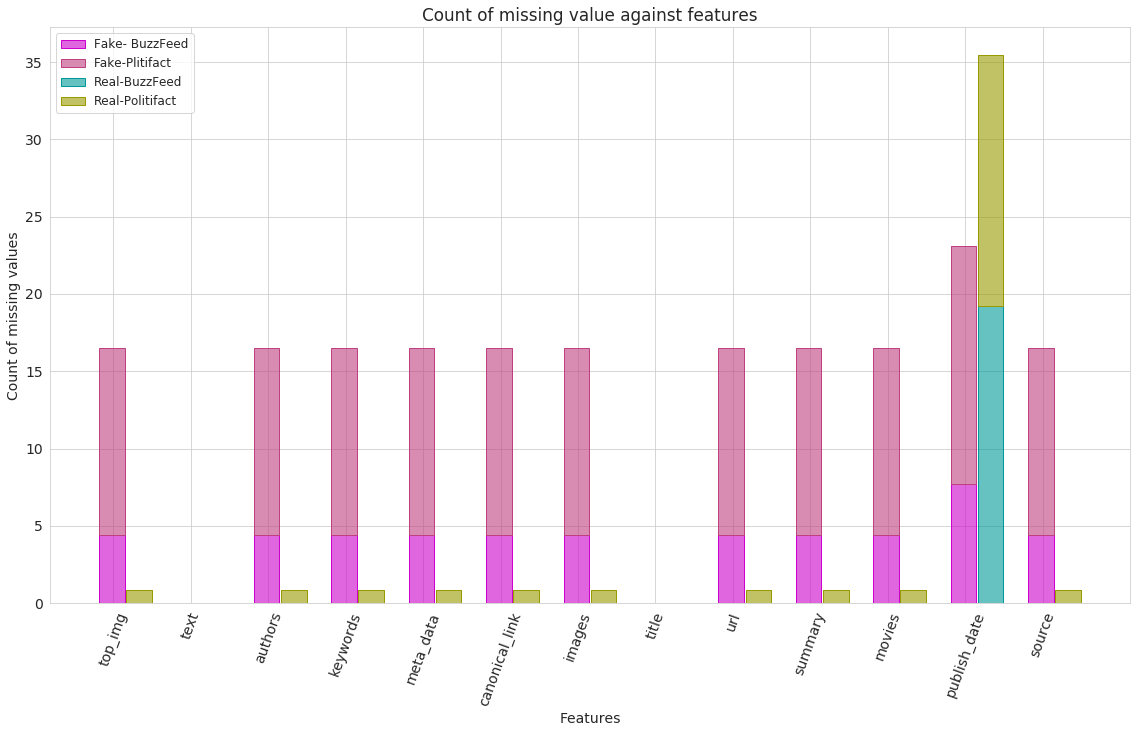

In [24]:
plt.rcParams.update({'font.size': 14})
with sns.axes_style("whitegrid"):
    _cols = ['top_img', 'text', 'authors', 'keywords', 'meta_data',
       'canonical_link', 'images', 'title', 'url', 'summary', 'movies',
       'publish_date', 'source']
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_axes([0,0,1,1])

    _p1 = ax.bar(np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("fake")]["bf"], width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax.bar(np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("fake")]["pf"], width, bottom=df_nan_count_all.set_index(["news_type", "plt"]).T[("fake")]["bf"], color=color_pf_fk_9, edgecolor = color_pf_fk)

    _p3 = ax.bar(0.35 + np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("real")]["bf"], width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax.bar(0.35 + np.arange(0,13), df_nan_count_all.set_index(["news_type", "plt"]).T[("real")]["pf"], width, bottom=df_nan_count_all.set_index(["news_type", "plt"]).T[("real")]["bf"], color=color_pf_real_9, edgecolor = color_pf_real)
    
    xticks(0.02+np.arange(13), _cols, rotation=70)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend([_p1, _p2, _p3, _p4], ["Fake- BuzzFeed", "Fake-Plitifact", "Real-BuzzFeed", "Real-Politifact"], loc='upper left', prop={'size':12})
    ax.set_xlabel("Features")
    ax.set_ylabel("Count of missing values")
    ax.set_title ("Count of missing value against features")
    #fig.legend(handles=[_p1,_p2,_p3, _p4])

In [25]:
df_nan_count_all

news_type    top_img  text    authors   keywords  meta_data  canonical_link  \
0      fake   4.395604   0.0   4.395604   4.395604   4.395604        4.395604   
1      real   0.000000   0.0   0.000000   0.000000   0.000000        0.000000   
0      fake  12.083333   0.0  12.083333  12.083333  12.083333       12.083333   
1      real   0.833333   0.0   0.833333   0.833333   0.833333        0.833333   

      images  title        url    summary     movies  publish_date     source  \
0   4.395604    0.0   4.395604   4.395604   4.395604      7.692308   4.395604   
1   0.000000    0.0   0.000000   0.000000   0.000000     19.230769   0.000000   
0  12.083333    0.0  12.083333  12.083333  12.083333     15.416667  12.083333   
1   0.833333    0.0   0.833333   0.833333   0.833333     16.250000   0.833333   

  plt  
0  bf  
1  bf  
0  pf  
1  pf

>  🖊️ Fake news have more missing information of [ top image, authors, keywords, meta_data, cannonical link, images, url, summary, published date and summary]

# Load text meta data

## BuzzFeed

In [26]:
dir_bf_news = dir_buzz_par + "News.txt"
dir_bf_user = dir_buzz_par + "User.txt"
dir_bf_news_user = dir_buzz_par + "BuzzFeedNewsUser.txt"
dir_bf_user_user = dir_buzz_par + "BuzzFeedUserUser.txt"

In [27]:
with open(dir_bf_news, encoding="utf-8") as file:
    #bf_news = [(_indx+1, l.rstrip("\n")) for _indx, l in enumerate(file)]
    bf_news = [(_indx+1, l.rstrip("\n"), l.rstrip("\n").split("_")[0]+"_"+ 
                l.rstrip("\n").split("_")[1]+ "_"+ str(_indx+1)) for _indx, l in enumerate(file)]
    
    
#df_bf_news = pd.DataFrame.from_records(bf_news, columns =['news_num_id', 'news_alph_id'])     
df_bf_news = pd.DataFrame.from_records(bf_news, columns =['news_num_id', 'news_alph_id', 'news_id_real'])     

In [28]:
df_bf_news["news_num_id"] = "bf_n_" + df_bf_news["news_num_id"].astype(str)

In [29]:
df_bf_news.head()

news_num_id     news_alph_id     news_id_real
0      bf_n_1  BuzzFeed_Real_1  BuzzFeed_Real_1
1      bf_n_2  BuzzFeed_Real_2  BuzzFeed_Real_2
2      bf_n_3  BuzzFeed_Real_3  BuzzFeed_Real_3
3      bf_n_4  BuzzFeed_Real_4  BuzzFeed_Real_4
4      bf_n_5  BuzzFeed_Real_5  BuzzFeed_Real_5

User

In [30]:
with open(dir_bf_user, encoding="utf-8") as file:
    bf_user = [(_indx, l.rstrip("\n")) for _indx, l in enumerate(file)]

df_bf_user = pd.DataFrame.from_records(bf_user, columns=["user_num_id", "user_alph_id"])    

In [31]:
df_bf_user["user_num_id"] = "bf_u_" + df_bf_user["user_num_id"].astype(str)

In [32]:
df_bf_user

user_num_id                      user_alph_id
0          bf_u_0  98d2b98ce305174e2f6c10b8f8a1a9d5
1          bf_u_1  a273d0fd07c18a884ce2aa425813eb06
2          bf_u_2  ac091e92df9e854a07563ffb397925d4
3          bf_u_3  d2ded2de054f2ceb43dff7f80fc46774
4          bf_u_4  3f2b23abf0e842f6bc97eed85596ff50
...           ...                               ...
15252  bf_u_15252  181082a5374a323a17c208a87c5e0418
15253  bf_u_15253  84170990ec4dfd4a29df1fc6e4ba6b97
15254  bf_u_15254  5d47a2477f7963484463d0020e7d6d21
15255  bf_u_15255  fd2441ac470068419ce32248b2f478f0
15256  bf_u_15256  9921758193ce395704be8b3d73eef8b8

[15257 rows x 2 columns]

In [33]:
df_bf_news_user = pd.read_csv(dir_bf_news_user, header = None, sep="\t", names = ["news_num_id", "user_num_id", "times"])

In [34]:
df_bf_news_user["news_num_id"] = "bf_n_" + df_bf_news_user["news_num_id"].astype(str)
df_bf_news_user["user_num_id"] = "bf_u_" + df_bf_news_user["user_num_id"].astype(str)

df_bf_news_user

news_num_id user_num_id  times
0         bf_n_45      bf_u_1      1
1        bf_n_127      bf_u_2      1
2        bf_n_115      bf_u_3      1
3        bf_n_180      bf_u_3      1
4        bf_n_140      bf_u_4      1
...           ...         ...    ...
22774    bf_n_150  bf_u_15257      1
22775    bf_n_151  bf_u_15257      1
22776    bf_n_152  bf_u_15257      1
22777    bf_n_155  bf_u_15257      1
22778    bf_n_157  bf_u_15257      1

[22779 rows x 3 columns]

In [35]:
df_bf_user_user = pd.read_csv(dir_bf_user_user, header = None, sep="\t", names = ["follower_num_id", "user_num_id"])

In [36]:
df_bf_user_user["follower_num_id"] = "bf_u_" + df_bf_user_user["follower_num_id"].astype(str)
df_bf_user_user["user_num_id"] = "bf_u_" + df_bf_user_user["user_num_id"].astype(str)

In [37]:
df_bf_user_user

follower_num_id user_num_id
0              bf_u_48      bf_u_1
1             bf_u_899      bf_u_1
2            bf_u_6781      bf_u_1
3           bf_u_10097      bf_u_1
4             bf_u_100      bf_u_2
...                ...         ...
634745       bf_u_6636  bf_u_15257
634746       bf_u_8135  bf_u_15257
634747       bf_u_9125  bf_u_15257
634748      bf_u_10714  bf_u_15257
634749      bf_u_13290  bf_u_15257

[634750 rows x 2 columns]

### Counting number of followers

In [38]:
print(df_bf_user_user["user_num_id"].value_counts())

bf_u_14332    2004
bf_u_13369    1653
bf_u_12713    1269
bf_u_10828    1253
bf_u_5385     1229
              ... 
bf_u_11809       1
bf_u_10715       1
bf_u_3884        1
bf_u_384         1
bf_u_5212        1
Name: user_num_id, Length: 14806, dtype: int64


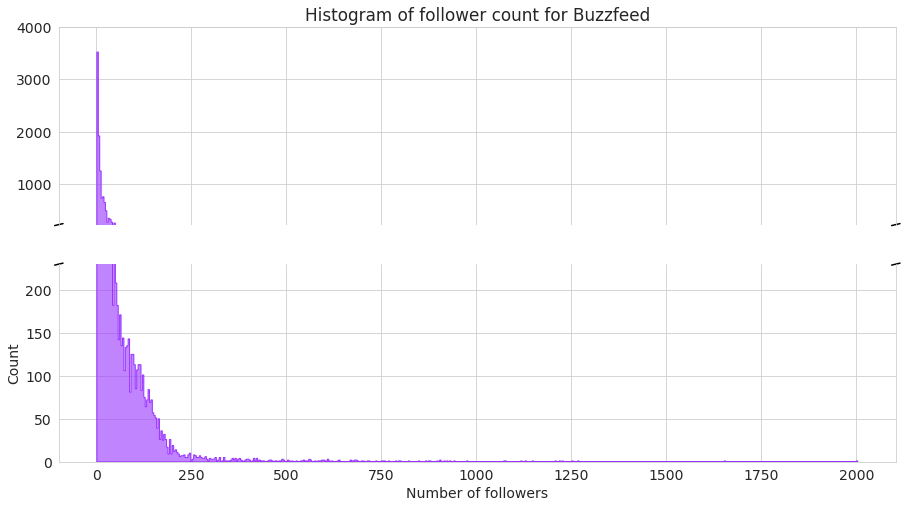

In [39]:
with sns.axes_style("whitegrid"):
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))
    
    
    _p1 = ax1.hist(df_bf_user_user["user_num_id"].value_counts().values, bins='auto', histtype='stepfilled',color = color_bf_9, edgecolor = color_bf)
    _p2 = ax2.hist(df_bf_user_user["user_num_id"].value_counts().values, bins='auto', histtype='stepfilled',color = color_bf_9, edgecolor = color_bf)
    _x = np.arange(0, max(df_bf_user_user["follower_num_id"].value_counts().values), 200)
    
    ax1.set_ylim(0,230) # most of the data
    ax2.set_ylim(230, 4000) # outliers only
    
    ax2.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    
    ax1.set_xlabel("Number of followers")
    ax1.set_ylabel("Count")
    ax2.set_title("Histogram of follower count for Buzzfeed")
    
        
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal   

In [40]:
max(df_bf_user_user["user_num_id"].value_counts().values)

2004

>  🖊️ So some people has really large number of followers (Max 2004, but rest of them don't)

### Count number of followee [Who is following how many people]

In [41]:
df_bf_user_user["follower_num_id"].value_counts().values

array([4021, 3898, 3814, ...,    1,    1,    1])

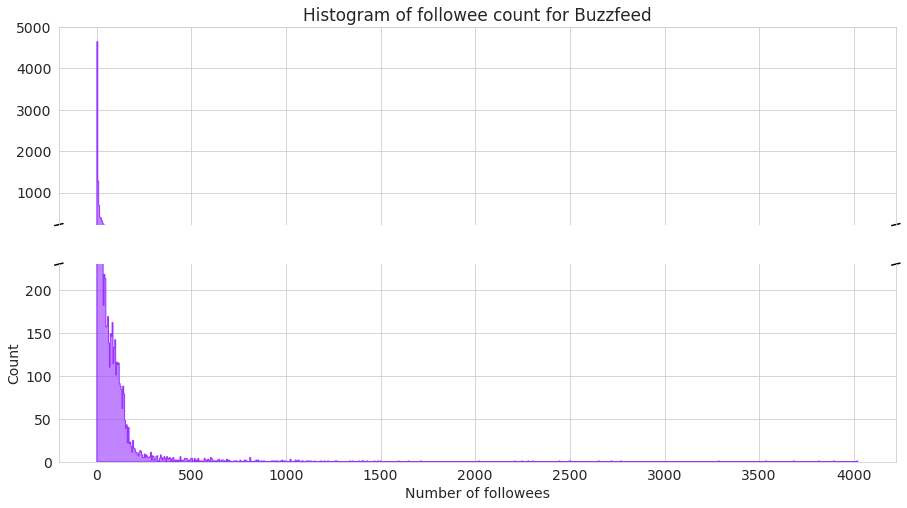

In [42]:
with sns.axes_style("whitegrid"):
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))
    
    
    ax1.hist(df_bf_user_user["follower_num_id"].value_counts().values, bins='auto', histtype='stepfilled', color = color_bf_9, edgecolor = color_bf)
    ax2.hist(df_bf_user_user["follower_num_id"].value_counts().values, bins='auto', histtype='stepfilled', color = color_bf_9, edgecolor = color_bf)
    _x = np.arange(0, max(df_bf_user_user["follower_num_id"].value_counts().values), 200)
    
    ax1.set_ylim(0,230) # most of the data
    ax2.set_ylim(230, 5000) # outliers only
    
    ax2.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    ax1.set_xlabel("Number of followees")
    ax1.set_ylabel("Count")
    ax2.set_title("Histogram of followee count for Buzzfeed")

    
        
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal   

In [43]:
df_bf_user_user["follower_num_id"].value_counts()

bf_u_6756     4021
bf_u_7096     3898
bf_u_1813     3814
bf_u_10097    3681
bf_u_6636     3537
              ... 
bf_u_11352       1
bf_u_8665        1
bf_u_11061       1
bf_u_6114        1
bf_u_714         1
Name: follower_num_id, Length: 11923, dtype: int64

>  🖊️ Some user are following other 4021 user!

### Counting number news-user

In [44]:
df_bf_news_user.head()

news_num_id user_num_id  times
0     bf_n_45      bf_u_1      1
1    bf_n_127      bf_u_2      1
2    bf_n_115      bf_u_3      1
3    bf_n_180      bf_u_3      1
4    bf_n_140      bf_u_4      1

In [45]:
df_bf_news_user.describe()

times
count  22779.000000
mean       1.108038
std        0.546427
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       43.000000

### Count news

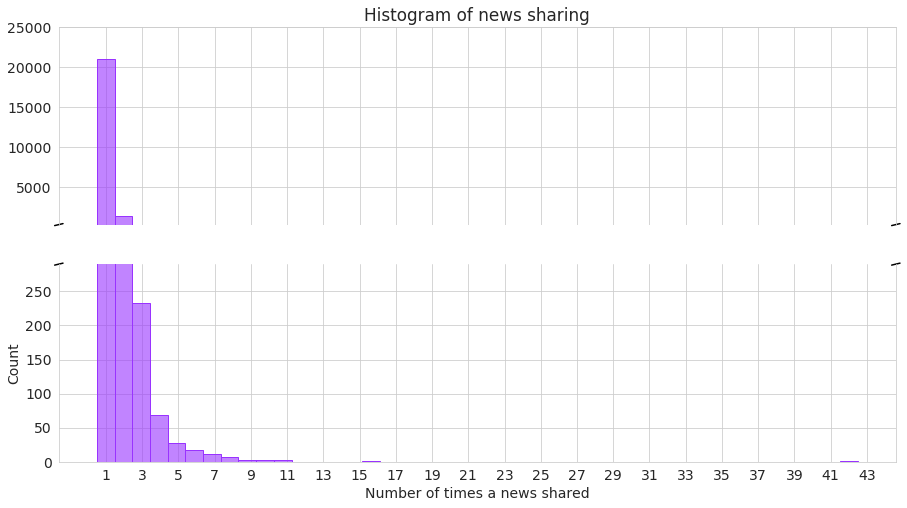

In [46]:
with sns.axes_style("whitegrid"):
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))
    
    #plt.title("Count of Share distribution")
    _p1 = ax1.hist(df_bf_news_user["times"], bins=max(df_bf_news_user["times"]), color = color_bf_9, edgecolor = color_bf)
    _p2 = ax2.hist(df_bf_news_user["times"], bins=max(df_bf_news_user["times"]), color = color_bf_9, edgecolor = color_bf)
    
    
    ax1.set_ylim(0,290) # most of the data
    ax2.set_ylim(290, 25000) # outliers only
    
    _x = np.arange(1, max(df_bf_news_user["times"])+1, 2)
    ax2.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)


    
    plt.subplots_adjust(wspace=0.15)    
    
    xticks(0.5+_x, _x)

    ax1.set_xlabel("Number of times a news shared")
    ax1.set_ylabel("Count")
    ax2.set_title("Histogram of news sharing")

    
        
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal   

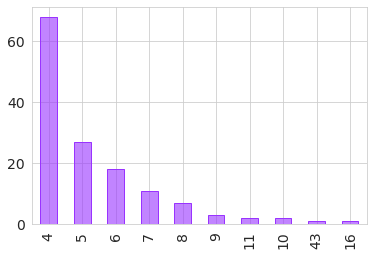

In [47]:
# No need to include
with sns.axes_style("whitegrid"):
    df_bf_news_user["times"].value_counts()[3:].plot.bar(color = color_bf_9, edgecolor = color_bf)

### How many times any specific user has shared

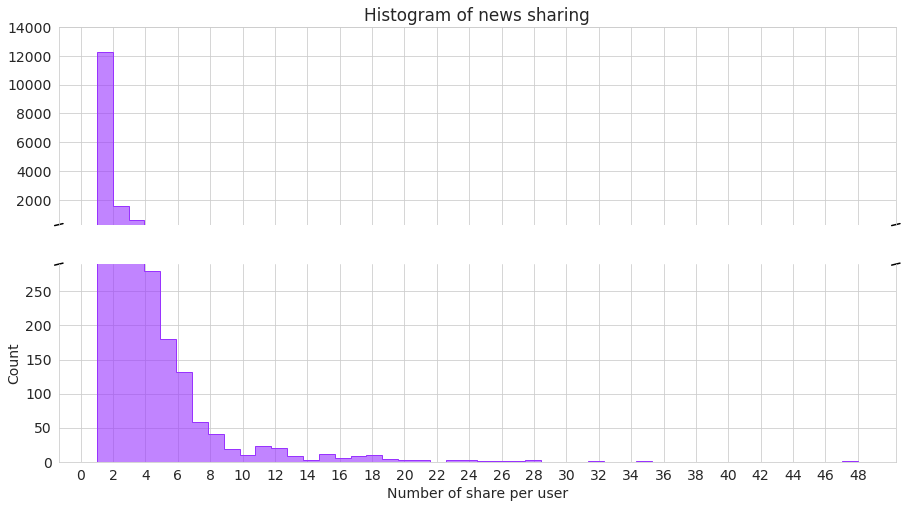

In [48]:
with sns.axes_style("whitegrid"):
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))
    
    _p1 = ax1.hist(df_bf_news_user["user_num_id"].value_counts().values, bins= max(df_bf_news_user["user_num_id"].value_counts().values), 
             histtype='stepfilled', color= color_bf_9, edgecolor = color_bf)
    _p2 = ax2.hist(df_bf_news_user["user_num_id"].value_counts().values, bins= max(df_bf_news_user["user_num_id"].value_counts().values), 
             histtype='stepfilled', color= color_bf_9, edgecolor = color_bf)    

    ax1.set_ylim(0, 290) # most of the data
    ax2.set_ylim(290, 14000) # outliers only
    
    _x = np.arange(0, max(df_bf_news_user["user_num_id"].value_counts().values)+2, 2)
    ax2.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)

    plt.subplots_adjust(wspace=0.15)    
    
    xticks(0.0+_x, _x)

    ax1.set_xlabel("Number of share per user")
    ax1.set_ylabel("Count")
    ax2.set_title("Histogram of news sharing")    
    
    
        
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal   

>  🖊️ So some people has really large number of followers (Max 48, but rest of them don't)

In [49]:
df_bf_news_user["user_num_id"].value_counts().values

array([48, 35, 32, ...,  1,  1,  1])

### Count number of share got by any news

In [50]:
df_bf_news_user["news_num_id"].value_counts().values

array([1197, 1134, 1060, 1020,  935,  754,  708,  678,  673,  589,  570,
        511,  477,  439,  390,  382,  366,  338,  333,  322,  285,  278,
        274,  265,  260,  246,  235,  232,  228,  224,  217,  216,  212,
        205,  200,  192,  167,  156,  155,  145,  142,  142,  142,  129,
        128,  128,  118,  116,  112,  111,  105,  105,   99,   99,   94,
         93,   89,   84,   84,   84,   83,   83,   82,   78,   73,   72,
         70,   68,   67,   63,   62,   61,   61,   60,   56,   53,   52,
         52,   49,   49,   48,   47,   46,   46,   46,   46,   45,   45,
         45,   44,   43,   42,   42,   41,   41,   39,   38,   38,   37,
         36,   34,   33,   32,   32,   31,   30,   29,   26,   26,   26,
         22,   22,   21,   20,   20,   20,   20,   20,   20,   19,   19,
         19,   19,   19,   19,   18,   18,   18,   17,   17,   15,   14,
         14,   14,   14,   13,   13,   13,   13,   13,   13,   13,   13,
         13,   12,   12,   12,   12,   11,   11,   

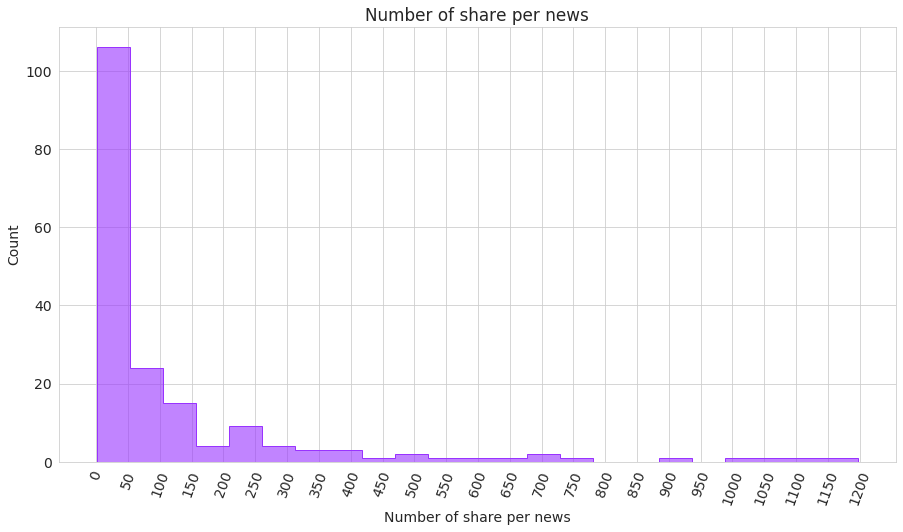

In [51]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,8))
    plt.title("Number of share per news")
    _x = np.arange(0, max(df_bf_news_user["news_num_id"].value_counts().values)+50, 50)

    plt.hist(df_bf_news_user["news_num_id"].value_counts().values, bins= max(df_bf_news_user["news_num_id"].value_counts().values)//50, 
             histtype='stepfilled', color= color_bf_9, edgecolor = color_bf)
    plt.xticks(_x, rotation = 70)
    #plt.xticks(rotation=degrees)
    plt.xlabel("Number of share per news")
    plt.ylabel("Count")


>  🖊️ Some news are shared 1200 times!

In [52]:
df_bf_news_cont

top_img  \
news_alph_id                                                          
BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_41  http://freedomdaily.com/wp-content/uploads/201...   
BuzzFeed_Fake_46  http://freedomdaily.com/wp-content/uploads/201...   
...                                                             ...   
BuzzFeed_Real_90  http://addictinginfo.addictinginfoent.netdna-c...   
BuzzFeed_Real_6   http://v.politico.com/images/1155968404/201609...   
BuzzFeed_Real_54  http://www.ifyouonlynews.com/wp-content/upload...   
BuzzFeed_Real_84  http://static.politico.com/99/8a/2a935401461e9...   
BuzzFeed_Real_50  http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...   

                                                               text  \
news_alph_id                                                          
BuzzFeed_Fake_28  A Daisy of a Rerun\n\nI am of an age which inc...   
BuzzFeed_Fake_17  I can’t wait for “Weekend at Chelsea’s” to hit...   
BuzzFeed_Fake_45  131.1k SHARES Facebook Twitter\n\nWell tell us...   
BuzzFeed_Fake_41  0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
BuzzFeed_Fake_46  4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
...                                                             ...   
BuzzFeed_Real_90  There may be a few women out there who enjoy a...   
BuzzFeed_Real_6   Obama weighs in on the debate\n\nPresident Bar...   
BuzzFeed_Real_54  \n\n16505 SHARES SHARES FacebookTwitter Google...   
BuzzFeed_Real_84  “He didn’t say the document was legitimate," J...   
BuzzFeed_Real_50  United Nations (CNN) President Barack Obama ma...   

                                                    authors keywords  \
news_alph_id                                                           
BuzzFeed_Fake_28               [View All Posts, Jim Bowman]       []   
BuzzFeed_Fake_17              [View All Posts, Matt Barber]       []   
BuzzFeed_Fake_45                                         []       []   
BuzzFeed_Fake_41                                         []       []   
BuzzFeed_Fake_46                                         []       []   
...                                                     ...      ...   
BuzzFeed_Real_90                                         []       []   
BuzzFeed_Real_6                [Brianna Ehley, Jack Shafer]       []   
BuzzFeed_Real_54             [Latest Posts, Jameson Parker]       []   
BuzzFeed_Real_84  [Nick Gass, Madeline Conway, Jack Shafer]       []   
BuzzFeed_Real_50                              [Laura Koran]       []   

                                                          meta_data  \
news_alph_id                                                          
BuzzFeed_Fake_28  {'description': 'Obama stated of Hillary, “She...   
BuzzFeed_Fake_17  {'description': 'Am I saying there’s no chance...   
BuzzFeed_Fake_45  {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_41  {'googlebot': 'noimageindex', 'generator': 'Po...   
BuzzFeed_Fake_46  {'googlebot': 'noimageindex', 'generator': 'Po...   
...                                                             ...   
BuzzFeed_Real_90  {'publisher': 'Addicting Info | The Knowledge ...   
BuzzFeed_Real_6   {'description': 'Obama touted Clinton’s perfor...   
BuzzFeed_Real_54  {'og': {'site_name': 'If You Only News', 'desc...   
BuzzFeed_Real_84  {'description': '“If he says the president was...   
BuzzFeed_Real_50  {'description': 'President Barack Obama made a...   

                                                     canonical_link  \
news_alph_id                                                          
BuzzFeed_Fake_28  http://eaglerising.com/37040/michelle-obama-at...   
BuzzFeed_Fake_17  http://eaglerising.com/36912/is-it-the-beginni...   
BuzzFeed_Fake_45  http://freedomdaily.com/female-muslim-american...

### Merge News content with news id

In [53]:
df_bf_news = pd.merge(df_bf_news_cont, df_bf_news, on=["news_alph_id"])

## Politifact

In [54]:
dir_poli_news = dir_politi_par + "News.txt"
dir_poli_user = dir_politi_par + "User.txt"
dir_poli_news_user = dir_politi_par + "PolitiFactNewsUser.txt"
dir_poli_user_user = dir_politi_par + "PolitiFactUserUser.txt"

In [55]:
with open(dir_poli_news, encoding="utf-8") as file:
    poli_news = [(_indx+1, l.rstrip("\n"), l.rstrip("\n").split("_")[0]+"_"+ 
                l.rstrip("\n").split("_")[1]+ "_"+ str(_indx+1)) for _indx, l in enumerate(file)]
    
    df_poli_news = pd.DataFrame.from_records(poli_news, columns=["news_num_id", "news_alph_id", "news_id_real"])    

In [56]:
df_poli_news["news_num_id"] = "pf_n_" + df_poli_news["news_num_id"].astype(str)
df_poli_news

news_num_id         news_alph_id         news_id_real
0        pf_n_1    PolitiFact_Real_1    PolitiFact_Real_1
1        pf_n_2    PolitiFact_Real_2    PolitiFact_Real_2
2        pf_n_3    PolitiFact_Real_3    PolitiFact_Real_3
3        pf_n_4    PolitiFact_Real_4    PolitiFact_Real_4
4        pf_n_5    PolitiFact_Real_5    PolitiFact_Real_5
..          ...                  ...                  ...
235    pf_n_236  PolitiFact_Fake_116  PolitiFact_Fake_236
236    pf_n_237  PolitiFact_Fake_117  PolitiFact_Fake_237
237    pf_n_238  PolitiFact_Fake_118  PolitiFact_Fake_238
238    pf_n_239  PolitiFact_Fake_119  PolitiFact_Fake_239
239    pf_n_240  PolitiFact_Fake_120  PolitiFact_Fake_240

[240 rows x 3 columns]

In [57]:
with open(dir_poli_user, encoding="utf-8") as file:
    poli_user = [(_indx+1, l.rstrip("\n")) for _indx, l in enumerate(file)]
df_poli_user = pd.DataFrame.from_records(poli_user, columns=["user_num_id", "user_alph_id"])    


In [58]:
df_poli_user["user_num_id"] = "pf_u_" + df_poli_user["user_num_id"].astype(str)

In [59]:
df_poli_user

user_num_id                      user_alph_id
0          pf_u_1  f4b46be21c2f553811cc8a73c4f0ff05
1          pf_u_2  2ced3734cc9c164edd9a8f5fbebe976f
2          pf_u_3  c84c4ea8ba67211f84781bdd64cafe43
3          pf_u_4  1776d1765f5e82cd660d8d502f227402
4          pf_u_5  4e8c2c300d96929895ce0edba915af16
...           ...                               ...
23860  pf_u_23861  b305de06bbde74882617c7371a016902
23861  pf_u_23862  349724def708557e00d02f4e22a72cfa
23862  pf_u_23863  d98ce466aaf87b257c17e7e94baafac3
23863  pf_u_23864  814cf5bbe8eb8e9fed59c2f423b0201a
23864  pf_u_23865  260f0769a03173b7111b8139522b7845

[23865 rows x 2 columns]

In [60]:
df_poli_news_user = pd.read_csv(dir_poli_news_user, header = None, sep="\t", names = ["news_num_id", "user_num_id", "times"])

In [61]:
df_poli_news_user["news_num_id"] = "pf_n_" + df_poli_news_user["news_num_id"].astype(str)
df_poli_news_user["user_num_id"] = "pf_u_" + df_poli_news_user["user_num_id"].astype(str)

df_poli_news_user

news_num_id user_num_id  times
0        pf_n_240      pf_u_1      1
1        pf_n_124      pf_u_2      1
2        pf_n_162      pf_u_3      1
3        pf_n_233      pf_u_4      1
4         pf_n_50      pf_u_5      1
...           ...         ...    ...
32786    pf_n_227  pf_u_23861      1
32787    pf_n_155  pf_u_23862      1
32788    pf_n_227  pf_u_23863      2
32789    pf_n_147  pf_u_23864      1
32790    pf_n_204  pf_u_23865      1

[32791 rows x 3 columns]

In [62]:
df_poli_user_user = pd.read_csv(dir_poli_user_user, header = None, sep="\t", names = ["follower_num_id", "user_num_id"])

In [63]:
df_poli_user_user["follower_num_id"] = "pf_u_" + df_poli_user_user["follower_num_id"].astype(str)
df_poli_user_user["user_num_id"] = "pf_u_" + df_poli_user_user["user_num_id"].astype(str)

df_poli_user_user

follower_num_id user_num_id
0             pf_u_507      pf_u_1
1            pf_u_1589      pf_u_1
2            pf_u_5307      pf_u_1
3           pf_u_11421      pf_u_1
4           pf_u_13267      pf_u_1
...                ...         ...
574739      pf_u_22113  pf_u_23864
574740       pf_u_6324  pf_u_23865
574741      pf_u_10715  pf_u_23865
574742      pf_u_11222  pf_u_23865
574743      pf_u_19991  pf_u_23865

[574744 rows x 2 columns]

In [64]:
df_poli_news

news_num_id         news_alph_id         news_id_real
0        pf_n_1    PolitiFact_Real_1    PolitiFact_Real_1
1        pf_n_2    PolitiFact_Real_2    PolitiFact_Real_2
2        pf_n_3    PolitiFact_Real_3    PolitiFact_Real_3
3        pf_n_4    PolitiFact_Real_4    PolitiFact_Real_4
4        pf_n_5    PolitiFact_Real_5    PolitiFact_Real_5
..          ...                  ...                  ...
235    pf_n_236  PolitiFact_Fake_116  PolitiFact_Fake_236
236    pf_n_237  PolitiFact_Fake_117  PolitiFact_Fake_237
237    pf_n_238  PolitiFact_Fake_118  PolitiFact_Fake_238
238    pf_n_239  PolitiFact_Fake_119  PolitiFact_Fake_239
239    pf_n_240  PolitiFact_Fake_120  PolitiFact_Fake_240

[240 rows x 3 columns]

In [65]:
####################################################################

#### Counting number of followers

In [ ]:
df_poli_user_user["user_num_id"].value_counts().values

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,8))
    plt.title("Count of follower distribution")
    plt.hist(df_poli_user_user["user_num_id"].value_counts(), bins=np.arange(max(df_poli_user_user["user_num_id"].value_counts())/3), 
             histtype='stepfilled', color = color_pf_9, edgecolor = color_pf)

So some people has really large number of followers (Max 2004, but rest of them don't)

In [ ]:
max(df_poli_user_user["user_num_id"].value_counts())

#### Count number of followee [Who is following how many people]

In [ ]:
df_poli_user_user["follower_num_id"].value_counts().values

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,8))
    plt.title("Count of followee distribution")
    plt.hist(df_poli_user_user["follower_num_id"].value_counts(), bins="auto", 
             histtype='stepfilled', color = color_pf_9, edgecolor = color_pf)

In [ ]:
print("Some user are following other",  max(df_poli_user_user["follower_num_id"].value_counts()),  "user! ")

#### Counting number news-user

In [ ]:
df_poli_news_user.head()

In [ ]:
df_poli_news_user.describe()

#### Count news

In [ ]:
with sns.axes_style("whitegrid"):
    #xticks(range(1, 50, 1))
    plt.figure(figsize=(15,8))
    plt.title("Number of news share distribution")
    df_poli_news_user["times"].value_counts().plot()

In [ ]:
df_poli_news_user["times"].value_counts()

#### How many times any specific user has shared

In [ ]:

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,8))
    plt.title("Number of news share distribution")
    yticks(range(0, 24000, 1000))
    xticks(range(1, max(df_bf_news_user["user_num_id"].value_counts()), 1))
    plt.hist(df_poli_news_user["user_num_id"].value_counts(), bins="auto", 
             histtype='stepfilled',color = color_pf_9, edgecolor = color_pf)

So some people has really large number of followers (Max 2004, but rest of them don't)

In [ ]:
max(df_poli_user_user["user_num_id"].value_counts())

#### Count number of followee [Who is following how many people]

In [66]:
df_poli_user_user["follower_num_id"].value_counts().values

array([5850, 5156, 4846, ...,    1,    1,    1])

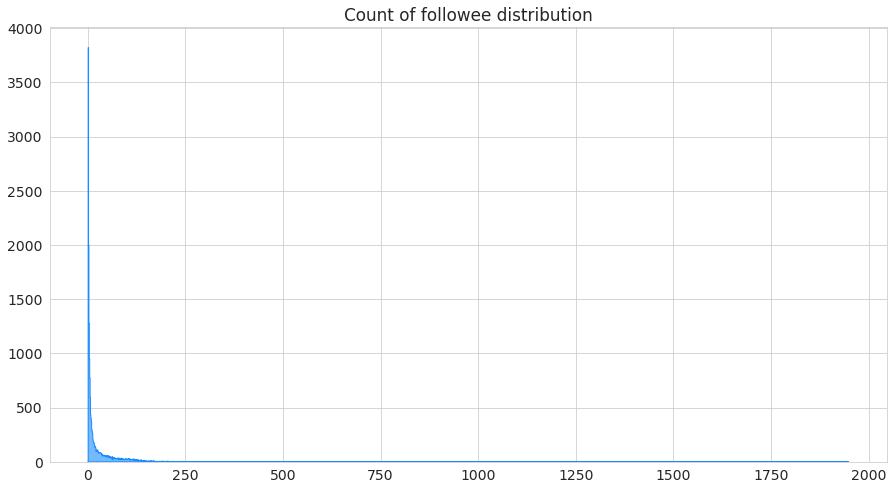

In [67]:
with sns.axes_style("whitegrid"):
        plt.figure(figsize=(15,8))
        plt.title("Count of followee distribution")
        plt.hist(df_poli_user_user["follower_num_id"].value_counts(), bins=np.arange(max(df_poli_user_user["follower_num_id"].value_counts())/3), 
                 histtype='stepfilled',color = color_pf_9, edgecolor = color_pf)

#### Merge News content with news id

In [66]:
df_poli_news = pd.merge(df_poli_news_cont, df_poli_news, on=["news_alph_id"])

In [67]:
df_poli_news

news_alph_id                                            top_img  \
0    PolitiFact_Fake_86  https://www.breakingbelizenews.com/wp-content/...   
1    PolitiFact_Fake_56                                                NaN   
2    PolitiFact_Fake_36                                                NaN   
3    PolitiFact_Fake_81  https://www.tdtalliance.com/wp-content/uploads...   
4    PolitiFact_Fake_31                                                NaN   
..                  ...                                                ...   
235  PolitiFact_Real_39  http://eaglerising.com/wp-content/uploads/2016...   
236  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
237  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
238  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
239  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text  \
0    According to guerilla:\n\nObama Canceled It, T...   
1    Early this morning, Ken Starr, the lead prosec...   
2    The White House has approved the redesign of U...   
3    Workers in New Orleans dismantled the city’s J...   
4    Official records filed late yesterday in Westc...   
..                                                 ...   
235  Never has the “rights for me, but not for thee...   
236  Gov. Chris Christie greets residents at a gath...   
237  Donald Trump Jr., a son of the Republican pres...   
238  As Donald Trump courted African-American voter...   
239  McCain Criticized Trump for Arpaio’s Pardon… S...   

                             authors keywords  \
0                                 []       []   
1                                NaN      NaN   
2                                NaN      NaN   
3                                 []       []   
4                                NaN      NaN   
..                               ...      ...   
235  [Philip Hodges, View All Posts]       []   
236                  [Matt Friedman]       []   
237                       [Abc News]       []   
238         [More Candace, Abc News]       []   
239                               []       []   

                                             meta_data  \
0    {'description': 'President Trump made Barack O...   
1                                                  NaN   
2                                                  NaN   
3    {'description': 'Workers in New Orleans disman...   
4                                                  NaN   
..                                                 ...   
235  {'description': '"I think they should disarm i...   
236  {'description': '<p>Gov. Chris Christie has th...   
237  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
238  {'fb_title': 'Trump Calls for Nationwide Stop-...   
239  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://theexaminer.site/2017/05/08/obama-cance...   
1                                                  NaN   
2                                                  NaN   
3    https://www.tdtalliance.com/jefferson-davis-st...   
4                                                  NaN   
..                                                 ...   
235  http://eaglerising.com/36873/trump-challenges-...   
236  http://www.politico.com/states/new-jersey/stor...   
237  http://abcnews.go.com/Politics/donald-trump-jr...   
238  http://abcnews.go.com/Politics/donald-trump-ca...   
239                                                      

                                                images  \
0    [http://0.gravatar.com/avatar/0c26b097540beb3b...   
1                                                  NaN   
2                                                  NaN   
3    [https://secure.gravatar.com/avatar/c9a4c1f01b...   
4                                                  NaN   
..                                            

# Merge Buzzfeed and Politifact and news content

In [68]:
df_all_news = pd.concat([df_bf_news, df_poli_news])

In [69]:
df_all_news.reset_index(drop=True, inplace=True)

In [70]:
df_all_news

news_alph_id                                            top_img  \
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
2      BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
3      BuzzFeed_Fake_41  http://freedomdaily.com/wp-content/uploads/201...   
4      BuzzFeed_Fake_46  http://freedomdaily.com/wp-content/uploads/201...   
..                  ...                                                ...   
417  PolitiFact_Real_39  http://eaglerising.com/wp-content/uploads/2016...   
418  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
419  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
421  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text  \
0    A Daisy of a Rerun\n\nI am of an age which inc...   
1    I can’t wait for “Weekend at Chelsea’s” to hit...   
2    131.1k SHARES Facebook Twitter\n\nWell tell us...   
3    0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
4    4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
..                                                 ...   
417  Never has the “rights for me, but not for thee...   
418  Gov. Chris Christie greets residents at a gath...   
419  Donald Trump Jr., a son of the Republican pres...   
420  As Donald Trump courted African-American voter...   
421  McCain Criticized Trump for Arpaio’s Pardon… S...   

                             authors keywords  \
0       [View All Posts, Jim Bowman]       []   
1      [View All Posts, Matt Barber]       []   
2                                 []       []   
3                                 []       []   
4                                 []       []   
..                               ...      ...   
417  [Philip Hodges, View All Posts]       []   
418                  [Matt Friedman]       []   
419                       [Abc News]       []   
420         [More Candace, Abc News]       []   
421                               []       []   

                                             meta_data  \
0    {'description': 'Obama stated of Hillary, “She...   
1    {'description': 'Am I saying there’s no chance...   
2    {'googlebot': 'noimageindex', 'generator': 'Po...   
3    {'googlebot': 'noimageindex', 'generator': 'Po...   
4    {'googlebot': 'noimageindex', 'generator': 'Po...   
..                                                 ...   
417  {'description': '"I think they should disarm i...   
418  {'description': '<p>Gov. Chris Christie has th...   
419  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
420  {'fb_title': 'Trump Calls for Nationwide Stop-...   
421  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://eaglerising.com/37040/michelle-obama-at...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
2    http://freedomdaily.com/female-muslim-american...   
3    http://freedomdaily.com/former-haitian-senate-...   
4    http://freedomdaily.com/charlotte-thugs-leaves...   
..                                                 ...   
417  http://eaglerising.com/36873/trump-challenges-...   
418  http://www.politico.com/states/new-jersey/stor...   
419  http://abcnews.go.com/Politics/donald-trump-jr...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
421                                                      

                                                images  \
0    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
2    [https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...   
3    [http://constitution.com/wp-content/uploads/20...   
4    [http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...   
..                                            

### Do we really need to analyze mat files?

In [ ]:

annots = loadmat(dir_buzz_par+"UserFeature.mat")

In [ ]:
annots.keys()

In [ ]:
type(annots['X']),annots['X'].shape

In [ ]:
annots['X'].indices

In [ ]:
annots['X'].indptr

:| it seems its the sparse matrix of user connectivity

# Data Analysis and Feature extraction

## Authors

### melt list of authr name into different rows

In [73]:
np.set_printoptions(suppress=True)

In [74]:
df_all_news_auth = df_all_news.explode("authors")
#df_all_news_auth = df_all_news.copy()

In [75]:
df_all_news_auth['authors'].replace("View All Posts", np.NaN, inplace=True)

In [76]:
df_all_news_auth['authors'].fillna("**NoName", inplace = True)

In [77]:
df_all_news_auth.iloc[115:120,]

news_alph_id                                            top_img  \
78   BuzzFeed_Fake_9  http://clashdaily.com/wp-content/uploads/2016/...   
78   BuzzFeed_Fake_9  http://clashdaily.com/wp-content/uploads/2016/...   
79  BuzzFeed_Fake_43  http://freedomdaily.com/wp-content/uploads/201...   
80  BuzzFeed_Fake_54  http://freedomdaily.com/wp-content/uploads/201...   
81  BuzzFeed_Fake_82  http://assets.thepoliticalinsider.com.s3.amazo...   

                                                 text               authors  \
78  Well THAT’S Weird. If the Birther movement is ...           Rich Witmer   
78  Well THAT’S Weird. If the Birther movement is ...            Doug Giles   
79  1.6k SHARES Facebook Twitter\n\nMuslim Somali ...              **NoName   
80  2.1k SHARES Facebook Twitter\n\nSeahawks Quart...              **NoName   
81  Hillary Clinton’s health is the top issue in t...  Featured Commentator   

   keywords                                          meta_data  \
78       []  {'googlebot': 'noimageindex', 'og': {'site_nam...   
78       []  {'googlebot': 'noimageindex', 'og': {'site_nam...   
79       []  {'googlebot': 'noimageindex', 'generator': 'Po...   
80       []  {'googlebot': 'noimageindex', 'generator': 'Po...   
81       []  {'description': 'dead!', 'og': {'site_name': '...   

                                       canonical_link  \
78  http://clashdaily.com/2016/09/dear-cnn-ap-2004...   
78  http://clashdaily.com/2016/09/dear-cnn-ap-2004...   
79  http://freedomdaily.com/sick-muslim-refugee-be...   
80  http://freedomdaily.com/nfl-told-russell-wilso...   
81  http://thepoliticalinsider.com/hillary-health-...   

                                               images  \
78  [http://clashdaily.wpengine.netdna-cdn.com/wp-...   
78  [http://clashdaily.wpengine.netdna-cdn.com/wp-...   
79  [http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...   
80  [http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...   
81  [https://graph.facebook.com/841703269216019/pi...   

                                                title  \
78  The AP, In 2004, Said Your Boy Obama Was BORN ...   
78  The AP, In 2004, Said Your Boy Obama Was BORN ...   
79  SICK! Muslim Refugee Beats, Urinates On Pregna...   
80  The NFL Told Russell Wilson Not To Speak About...   
81  Hillary's DEAD!?!? Brand New Theory Has Seriou...   

                                                  url summary  \
78  http://clashdaily.com/2016/09/dear-cnn-ap-2004...           
78  http://clashdaily.com/2016/09/dear-cnn-ap-2004...           
79  http://freedomdaily.com/sick-muslim-refugee-be...           
80  http://freedomdaily.com/nfl-told-russell-wilso...           
81  http://www.thepoliticalinsider.com/hillary-hea...           

                                               movies  \
78                                                 []   
78                                                 []   
79                                                 []   
80  [http://www.youtube.com/embed/XcBbguk05D0?vers...   
81        [https://www.youtube.com/embed/sdRwikCXZ0s]   

                publish_date                              source plt  \
78  {'$date': 1474207108000}               http://clashdaily.com  bf   
78  {'$date': 1474207108000}               http://clashdaily.com  bf   
79  {'$date': 1474489591000}             http://freedomdaily.com  bf   
80  {'$date': 1474918718000}             http://freedomdaily.com  bf   
81  {'$date': 1474575278000}  http://www.thepoliticalinsider.com  bf   

   news_type news_num_id       news_id_real  
78      fake    bf_n_100  BuzzFeed_Fake_100  
78      fake    bf_n_100  BuzzFeed_Fake_100  
79      fake    bf_n_134  BuzzFeed_Fake_134  
80      fake    bf_n_145  BuzzFeed_Fake_145  
81      fake    bf_n_173  BuzzFeed_Fake_173

In [78]:
df_all_news_auth[df_all_news_auth["authors"] == "**NoName"]["news_alph_id"]

0        BuzzFeed_Fake_28
1        BuzzFeed_Fake_17
2        BuzzFeed_Fake_45
3        BuzzFeed_Fake_41
4        BuzzFeed_Fake_46
              ...        
410    PolitiFact_Real_53
411    PolitiFact_Real_34
413    PolitiFact_Real_27
417    PolitiFact_Real_39
421    PolitiFact_Real_57
Name: news_alph_id, Length: 163, dtype: object

### Author compare

In [79]:
df_all_news_auth[df_all_news_auth["news_type"] == "real"]["authors"].value_counts().describe()

count    170.000000
mean       2.623529
std        5.795278
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       65.000000
Name: authors, dtype: float64

In [80]:
df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["authors"].value_counts().describe()

count     86.00000
mean       3.22093
std       13.89236
min        1.00000
25%        1.00000
50%        1.00000
75%        2.00000
max      130.00000
Name: authors, dtype: float64

In [81]:
df_all_news_auth[df_all_news_auth["news_type"] == "real"].fillna("**NoName").authors.value_counts()


Jack Shafer          65
**NoName             33
Abc News             18
Louis Nelson         11
Natalie Dickinson    10
                     ..
Rebecca Morin         1
Julian Reichelt       1
Joyce Tseng           1
Visit Website         1
Maggie Severns        1
Name: authors, Length: 170, dtype: int64

In [89]:
vc_auth_real = df_all_news_auth[(df_all_news_auth["news_type"] == "real")].authors.value_counts()

In [90]:
valc_auth_real_bf = df_all_news_auth[(df_all_news_auth["news_type"] == "real") & (df_all_news_auth["plt"] == "bf") & (df_all_news_auth["authors"].isin(vc_auth_real.keys()))]["authors"].value_counts()

In [91]:
valc_auth_real_pf = df_all_news_auth[(df_all_news_auth["news_type"] == "real") & (df_all_news_auth["plt"] == "pf") & (df_all_news_auth["authors"].isin(vc_auth_real.keys()))]["authors"].value_counts()

In [92]:
top_real_authors = [_x[:20]+"..." if len(_x) > 20 else _x for _x in (list(vc_auth_real.keys()))]

In [93]:
valc_auth_real_bf

Jack Shafer                   27
**NoName                      14
Abc News                       9
Louis Nelson                   6
Nolan D                        5
                              ..
Cnn Pentagon Correspondent     1
Tal Kopan                      1
Jameson Parker                 1
Deirdre Walsh                  1
Katie Glueck                   1
Name: authors, Length: 100, dtype: int64

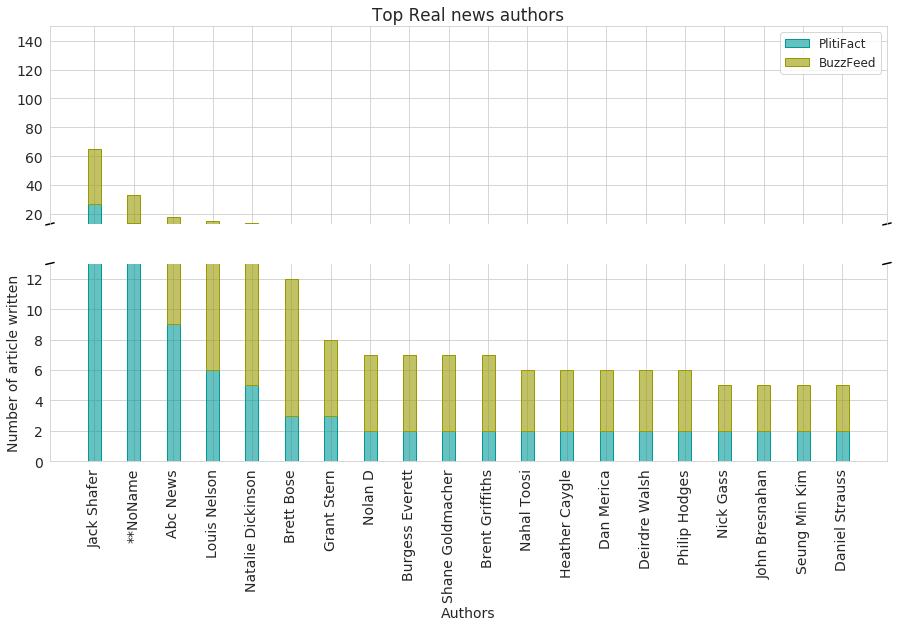

In [142]:
with sns.axes_style("whitegrid"):    
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))
    _p1 = ax1.bar(np.arange(0,20),list(valc_auth_real_bf.values)[:20] , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p2 = ax1.bar(np.arange(0,20), list(valc_auth_real_pf.values)[:20], width, bottom=list(valc_auth_real_bf.values)[:20], color=color_pf_real_9, edgecolor = color_pf_real)
    
    _p3 = ax2.bar(np.arange(0,20),list(valc_auth_real_bf.values)[:20] , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax2.bar(np.arange(0,20), list(valc_auth_real_pf.values)[:20], width, bottom=list(valc_auth_real_bf.values)[:20], color=color_pf_real_9, edgecolor = color_pf_real)
    
  
    ax1.set_ylim(0,13) # most of the data
    ax2.set_ylim(13, 150) # outliers only
    
    
    # hide the spines between ax and ax2
    ax1.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    
    plt.subplots_adjust(wspace=0.15)    
    
    xticks(-0.0+np.arange(20), top_real_authors[:20], rotation=90)

    ax2.legend([_p1, _p2], ["PlitiFact", "BuzzFeed"], loc='upper right', prop={'size':12})
    
    
    ax1.set_xlabel("Authors")
    ax1.set_ylabel("Number of article written")
    ax2.set_title("Top Real news authors")
    
    
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



In [83]:
vc_auth_fake = df_all_news_auth[(df_all_news_auth["news_type"] == "fake")].authors.value_counts()

In [84]:
valc_auth_fake_bf = df_all_news_auth[(df_all_news_auth["news_type"] == "fake") & (df_all_news_auth["plt"] == "bf") & (df_all_news_auth["authors"].isin(vc_auth_fake.keys()))]["authors"].value_counts()

In [85]:
valc_auth_fake_pf = df_all_news_auth[(df_all_news_auth["news_type"] == "fake") & (df_all_news_auth["plt"] == "pf") & (df_all_news_auth["authors"].isin(vc_auth_fake.keys()))]["authors"].value_counts()

In [86]:
top_fake_authors = [_x[:20]+"..." if len(_x) > 20 else _x for _x in (list(vc_auth_fake.keys()))]

In [87]:
valc_auth_fake_bf

**NoName                   45
Terresa Monroe-hamilton     7
Grant Stern                 6
Brett Bose                  6
Natalie Dickinson           6
Cassy Fiano                 4
Tiffiny Ruegner             3
Sierra Marlee               3
Philip Hodges               2
Ben Marquis                 2
Colin Taylor                2
Benjamin Arie               2
Doug Giles                  2
Martin Lioll                2
Tony Elliott                2
Fed Up                      2
Kevin Jackson               2
Kimberly J Smith            2
Blair Patterson             2
Martin Walsh                2
Mr Wendal                   2
Scott Osborn                2
Wendy Gittleson             2
Bob Amoroso                 2
Rich Witmer                 2
John Falkenberg             2
V Saxena                    2
Stephen D Foster Jr         1
Mockarena Cotr              1
Lisa Smith                  1
Ryan Denson                 1
Matt Barber                 1
Campus Reform               1
Featured C

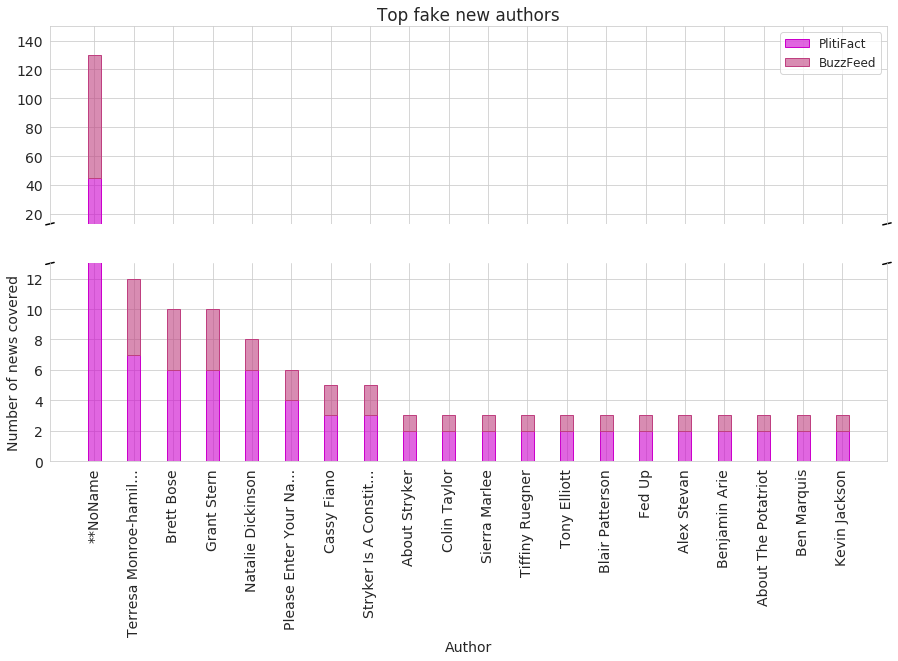

In [143]:
with sns.axes_style("whitegrid"):    
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))
    _p1 = ax1.bar(np.arange(0,20),list(valc_auth_fake_bf.values)[:20] , width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax1.bar(np.arange(0,20), list(valc_auth_fake_pf.values)[:20], width, bottom=list(valc_auth_fake_bf.values)[:20], color=color_pf_fk_9, edgecolor = color_pf_fk)
    
    _p3 = ax2.bar(np.arange(0,20),list(valc_auth_fake_bf.values)[:20] , width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p4 = ax2.bar(np.arange(0,20), list(valc_auth_fake_pf.values)[:20], width, bottom=list(valc_auth_fake_bf.values)[:20], color=color_pf_fk_9, edgecolor = color_pf_fk)
    
  
    ax1.set_ylim(0,13) # most of the data
    ax2.set_ylim(13, 150) # outliers only
    
    
    # hide the spines between ax and ax2
    ax1.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    
    plt.subplots_adjust(wspace=0.15)    
    
    xticks(-0.0+np.arange(20), top_fake_authors[:20], rotation=90)

    ax2.legend([_p1, _p2], ["PlitiFact", "BuzzFeed"], loc='upper right', prop={'size':12})
    
    ax1.set_xlabel("Author")
    ax1.set_ylabel("Number of news covered")
    ax2.set_title("Top fake new authors")
    
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



### Length of author's name

In [104]:
authors_fake_bf = list(df_all_news_auth[(df_all_news_auth["news_type"] == "fake") & (df_all_news_auth["plt"] == "bf")]["authors"].replace("**NoName", "").replace("View All Posts", ""))
len_authors_fake_bf = [len(_x) for _x in authors_fake_bf]

authors_fake_pf = list(df_all_news_auth[(df_all_news_auth["news_type"] == "fake") & (df_all_news_auth["plt"] == "pf")]["authors"].replace("**NoName", "").replace("View All Posts", ""))
len_authors_fake_pf = [len(_x) for _x in authors_fake_pf]

authors_real_bf = list(df_all_news_auth[(df_all_news_auth["news_type"] == "real") & (df_all_news_auth["plt"] == "bf")]["authors"].replace("**NoName", "").replace("View All Posts", ""))
len_authors_real_bf = [len(_x) for _x in authors_real_bf]

authors_real_pf = list(df_all_news_auth[(df_all_news_auth["news_type"] == "real") & (df_all_news_auth["plt"] == "pf")]["authors"].replace("**NoName", "").replace("View All Posts", ""))
len_authors_real_pf = [len(_x) for _x in authors_real_pf]

(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 69.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

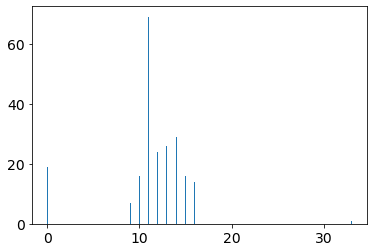

In [105]:
plt.hist(len_authors_real_pf, bins = 500)

In [106]:
len_authors_fake_pf.count(0)

85

In [107]:
len(len_authors_real_bf)

184

In [108]:
len_authors_real_pf.count(0)

19

In [109]:
max_len_author = max(len(len_authors_fake_bf), len(len_authors_fake_pf), len(len_authors_real_bf), len(len_authors_real_pf))

In [110]:
len_authors_fake_bf = np.pad(np.array(len_authors_fake_bf).astype(float), (0,max_len_author-len(len_authors_fake_bf)), 'constant', constant_values=np.nan).T.reshape(max_len_author,1)

len_authors_fake_pf = np.pad(np.array(len_authors_fake_pf).astype(float), (0,max_len_author-len(len_authors_fake_pf)), 'constant', constant_values=np.nan).T.reshape(max_len_author,1)

len_authors_real_bf = np.pad(np.array(len_authors_real_bf).astype(float), (0,max_len_author-len(len_authors_real_bf)), 'constant', constant_values=np.nan).T.reshape(max_len_author,1)

len_authors_real_pf = np.pad(np.array(len_authors_real_pf).astype(float), (0,max_len_author-len(len_authors_real_pf)), 'constant', constant_values=np.nan).T.reshape(max_len_author,1)

In [111]:
len_authors_real_bf

array([[ 9.],
       [ 8.],
       [13.],
       [11.],
       [13.],
       [13.],
       [11.],
       [13.],
       [13.],
       [12.],
       [24.],
       [13.],
       [12.],
       [13.],
       [ 0.],
       [11.],
       [10.],
       [17.],
       [11.],
       [ 7.],
       [14.],
       [13.],
       [12.],
       [14.],
       [21.],
       [11.],
       [11.],
       [10.],
       [12.],
       [ 8.],
       [11.],
       [12.],
       [12.],
       [ 8.],
       [15.],
       [ 9.],
       [ 0.],
       [10.],
       [12.],
       [11.],
       [12.],
       [13.],
       [11.],
       [ 8.],
       [12.],
       [11.],
       [ 8.],
       [ 9.],
       [11.],
       [12.],
       [11.],
       [ 0.],
       [ 0.],
       [11.],
       [12.],
       [ 0.],
       [11.],
       [13.],
       [11.],
       [15.],
       [12.],
       [24.],
       [10.],
       [11.],
       [12.],
       [13.],
       [13.],
       [11.],
       [ 9.],
       [15.],
       [15.],
      

([array([45.,  0.,  0.,  0.,  0.,  2.,  0.,  4., 10., 20., 11., 12.,  1.,
          9.,  8.,  0.,  1.,  1.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,

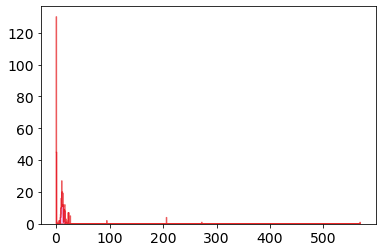

In [112]:
plt.hist(np.concatenate((len_authors_fake_bf,len_authors_fake_pf), axis= 1), bins=500, 
             histtype='stepfilled', color = [color_bf_fk_4, color_pf_fk_4], edgecolor = color_fk_9, stacked = True)

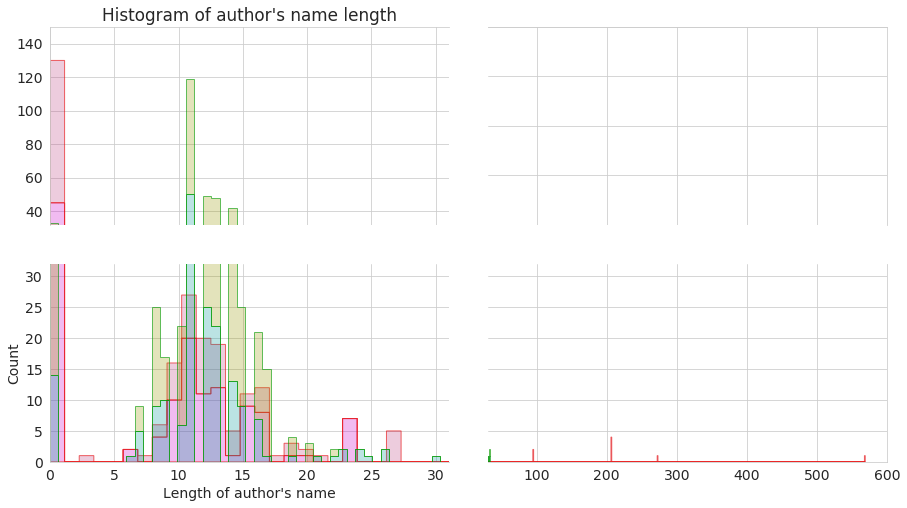

In [140]:
with sns.axes_style("whitegrid"):    
    fig, axs = plt.subplots(2, 2, sharex=False, sharey = False, figsize=(15,8))

    _p1 = axs[0,0].hist(np.concatenate((len_authors_fake_bf,len_authors_fake_pf), axis= 1), bins=500, 
             histtype='stepfilled', color = [color_bf_fk_4, color_pf_fk_4], edgecolor = color_fk_9, stacked = True)
    
    _p1 = axs[0,0].hist(np.concatenate((len_authors_real_bf,len_authors_real_pf), axis= 1), bins=50, 
             histtype='stepfilled', color = [color_bf_real_4, color_pf_real_4], edgecolor = color_real_9, stacked = True)    
    
    
    _p2 = axs[1,0].hist(np.concatenate((len_authors_fake_bf,len_authors_fake_pf), axis= 1), bins=500, 
             histtype='stepfilled', color = [color_bf_fk_4, color_pf_fk_4], edgecolor = color_fk_9, stacked = True)
    _p2 = axs[1,0].hist(np.concatenate((len_authors_real_bf,len_authors_real_pf), axis= 1), bins=50, 
             histtype='stepfilled', color = [color_bf_real_4, color_pf_real_4], edgecolor = color_real_9, stacked = True)    
    
    _p3 = axs[0,1].hist(np.concatenate((len_authors_fake_bf,len_authors_fake_pf), axis= 1), bins=500, 
             histtype='stepfilled', color = [color_bf_fk_4, color_pf_fk_4], edgecolor = color_fk_9, stacked = True)
    
    _p3 = axs[0,1].hist(np.concatenate((len_authors_real_bf,len_authors_real_pf), axis= 1), bins=50, 
             histtype='stepfilled', color = [color_bf_real_4, color_pf_real_4], edgecolor = color_real_9, stacked = True)        
    
    _p4 = axs[1,1].hist(np.concatenate((len_authors_fake_bf,len_authors_fake_pf), axis= 1), bins=500, 
             histtype='stepfilled', color = [color_bf_fk_4, color_pf_fk_4], edgecolor = color_fk_9, stacked = True) 
    _p4 = axs[1,1].hist(np.concatenate((len_authors_real_bf,len_authors_real_pf), axis= 1), bins=50, 
             histtype='stepfilled', color = [color_bf_real_4, color_pf_real_4], edgecolor = color_real_9, stacked = True)        
    mn, mx = plt.xlim()
    
    
    
    axs[0,0].set_xlim(0, 31) # outliers only
    axs[0,0].set_ylim(32, 150) # outliers only    
  
    axs[1,0].set_xlim(0,31) # most of the data
    axs[1,0].set_ylim(0,32) # most of the data

    axs[0,1].set_xlim(31, 600) # outliers only
    axs[0,1].set_ylim(110, 150) # outliers only

    axs[1,1].set_xlim(31, 600) # most of the data
    axs[1,1].set_ylim(0,32) # most of the data    
    
    
    # hide the spines between ax and ax2
    axs[0,0].spines['bottom'].set_visible(False)
    axs[0,0].spines['right'].set_visible(False)    
        
    axs[1,0].spines['top'].set_visible(False)
    axs[1,0].spines['right'].set_visible(False)    
    

    # hide the spines between ax and ax2
    axs[0,1].spines['bottom'].set_visible(False)
    axs[0,1].spines['left'].set_visible(False)         


    axs[1,1].spines['top'].set_visible(False)
    axs[1,1].spines['left'].set_visible(False)    
    
 
   
    axs[0,0].tick_params(labelbottom=False)
    
    axs[0,1].tick_params(labelbottom=False)
    axs[0,1].tick_params(labelleft=False)
    
    axs[1,1].tick_params(labelleft=False)
    
    axs[1,0].set_xlabel("Length of author's name")
    axs[1,0].set_ylabel("Count")
    axs[0,0].set_title("Histogram of author's name length")    
    
    plt.subplots_adjust(wspace=0.10)    
    
    #xticks(-0.0+np.arange(20), top_fake_authors[:20], rotation=90)


In [114]:
mx

597.45

In [115]:
df_all_news_auth

news_alph_id                                            top_img  \
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
2      BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
..                  ...                                                ...   
418  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
419  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
421  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text        authors  \
0    A Daisy of a Rerun\n\nI am of an age which inc...       **NoName   
0    A Daisy of a Rerun\n\nI am of an age which inc...     Jim Bowman   
1    I can’t wait for “Weekend at Chelsea’s” to hit...       **NoName   
1    I can’t wait for “Weekend at Chelsea’s” to hit...    Matt Barber   
2    131.1k SHARES Facebook Twitter\n\nWell tell us...       **NoName   
..                                                 ...            ...   
418  Gov. Chris Christie greets residents at a gath...  Matt Friedman   
419  Donald Trump Jr., a son of the Republican pres...       Abc News   
420  As Donald Trump courted African-American voter...   More Candace   
420  As Donald Trump courted African-American voter...       Abc News   
421  McCain Criticized Trump for Arpaio’s Pardon… S...       **NoName   

    keywords                                          meta_data  \
0         []  {'description': 'Obama stated of Hillary, “She...   
0         []  {'description': 'Obama stated of Hillary, “She...   
1         []  {'description': 'Am I saying there’s no chance...   
1         []  {'description': 'Am I saying there’s no chance...   
2         []  {'googlebot': 'noimageindex', 'generator': 'Po...   
..       ...                                                ...   
418       []  {'description': '<p>Gov. Chris Christie has th...   
419       []  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
421       []  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://eaglerising.com/37040/michelle-obama-at...   
0    http://eaglerising.com/37040/michelle-obama-at...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
2    http://freedomdaily.com/female-muslim-american...   
..                                                 ...   
418  http://www.politico.com/states/new-jersey/stor...   
419  http://abcnews.go.com/Politics/donald-trump-jr...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
421                                                      

                                                images  \
0    [http://constitution.com/wp-content/uploads/20...   
0    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
2    [https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...   
..                                                 ...   
418  [https://static.politico.com/dims4/default/d09...   
419  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
421  [http://static.westernjournalism.com/wp-conten...   

### NER analysis

In [120]:
df_all_news_auth

news_alph_id                                            top_img  \
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
2      BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
..                  ...                                                ...   
418  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
419  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
421  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text        authors  \
0    A Daisy of a Rerun\n\nI am of an age which inc...       **NoName   
0    A Daisy of a Rerun\n\nI am of an age which inc...     Jim Bowman   
1    I can’t wait for “Weekend at Chelsea’s” to hit...       **NoName   
1    I can’t wait for “Weekend at Chelsea’s” to hit...    Matt Barber   
2    131.1k SHARES Facebook Twitter\n\nWell tell us...       **NoName   
..                                                 ...            ...   
418  Gov. Chris Christie greets residents at a gath...  Matt Friedman   
419  Donald Trump Jr., a son of the Republican pres...       Abc News   
420  As Donald Trump courted African-American voter...   More Candace   
420  As Donald Trump courted African-American voter...       Abc News   
421  McCain Criticized Trump for Arpaio’s Pardon… S...       **NoName   

    keywords                                          meta_data  \
0         []  {'description': 'Obama stated of Hillary, “She...   
0         []  {'description': 'Obama stated of Hillary, “She...   
1         []  {'description': 'Am I saying there’s no chance...   
1         []  {'description': 'Am I saying there’s no chance...   
2         []  {'googlebot': 'noimageindex', 'generator': 'Po...   
..       ...                                                ...   
418       []  {'description': '<p>Gov. Chris Christie has th...   
419       []  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
421       []  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://eaglerising.com/37040/michelle-obama-at...   
0    http://eaglerising.com/37040/michelle-obama-at...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
2    http://freedomdaily.com/female-muslim-american...   
..                                                 ...   
418  http://www.politico.com/states/new-jersey/stor...   
419  http://abcnews.go.com/Politics/donald-trump-jr...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
421                                                      

                                                images  \
0    [http://constitution.com/wp-content/uploads/20...   
0    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
2    [https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...   
..                                                 ...   
418  [https://static.politico.com/dims4/default/d09...   
419  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
421  [http://static.westernjournalism.com/wp-conten...   

In [121]:
auth_ner = []
for _indx in range(df_all_news_auth.shape[0]):
    auth_name = nlp(df_all_news_auth["authors"].replace("**NoName", "").iloc[_indx])
    for x in auth_name.ents:
        auth_ner.append((df_all_news_auth["news_type"].iloc[_indx], df_all_news_auth["plt"].iloc[_indx], x.label_ ))


In [122]:
counter_auth_ner = Counter(auth_ner)

In [123]:
df_auth_ner_count = pd.DataFrame(columns = ["news_type", "plt", "ner", "count"])

In [124]:
for _tmp in counter_auth_ner.keys():
    df_auth_ner_count = df_auth_ner_count.append({"news_type" : _tmp[0], "plt" : _tmp[1], "ner" : _tmp[2], "count" : counter_auth_ner[_tmp]}, ignore_index=True)


In [125]:
list_auth_ner = list(set(df_auth_ner_count["ner"]))

In [126]:
for _cur_type in ["fake", "real"]:
    for _cur_plt in ["bf", "pf"]:
        for _cur_ner in list_auth_ner:
            if(not ((df_auth_ner_count["news_type"] == _cur_type) & (df_auth_ner_count["plt"] == _cur_plt) \
                  & (df_auth_ner_count["ner"] == _cur_ner)).any()):
                df_auth_ner_count = df_auth_ner_count.append({"news_type" : _cur_type, "plt" : _cur_plt, "ner" : _cur_ner, "count" : 0}, ignore_index=True)
                

In [127]:
df_auth_ner_count = df_auth_ner_count.sort_values(["ner"])

In [128]:
df_auth_ner_count[(df_auth_ner_count["news_type"] == "fake") & (df_auth_ner_count["plt"] == "bf")]["count"]

16     0
19     0
20     0
18     0
17     0
1      2
0     78
Name: count, dtype: object

In [129]:
df_auth_ner_count

news_type plt       ner count
25      real  pf  CARDINAL     0
16      fake  bf  CARDINAL     0
7       fake  pf  CARDINAL     1
22      real  bf  CARDINAL     0
21      fake  pf      DATE     0
14      real  pf      DATE     1
19      fake  bf      DATE     0
24      real  bf      DATE     0
10      fake  pf       GPE     6
20      fake  bf       GPE     0
5       real  bf       GPE     1
27      real  pf       GPE     0
4       real  bf       LOC     1
18      fake  bf       LOC     0
11      fake  pf       LOC     2
26      real  pf       LOC     0
8       fake  pf      NORP     1
23      real  bf      NORP     0
15      real  pf      NORP     1
17      fake  bf      NORP     0
13      real  pf       ORG    16
9       fake  pf       ORG     7
3       real  bf       ORG    17
1       fake  bf       ORG     2
6       fake  pf    PERSON    33
2       real  bf    PERSON   123
12      real  pf    PERSON   207
0       fake  bf    PERSON    78

In [130]:
list_auth_ner.sort()

In [131]:
list_auth_ner

['CARDINAL', 'DATE', 'GPE', 'LOC', 'NORP', 'ORG', 'PERSON']

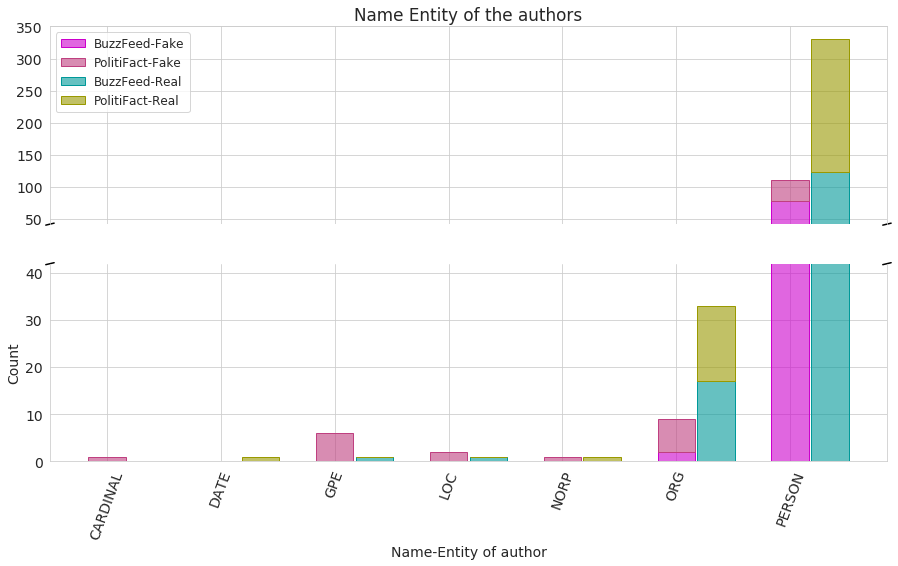

In [145]:
with sns.axes_style("whitegrid"):    
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))

    _p1 = ax1.bar(np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "fake") & (df_auth_ner_count["plt"] == "bf")]["count"], width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax1.bar(np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "fake") & (df_auth_ner_count["plt"] == "pf")]["count"], width, bottom=df_auth_ner_count[(df_auth_ner_count["news_type"] == "fake") & (df_auth_ner_count["plt"] == "bf")]["count"], color=color_pf_fk_9, edgecolor = color_pf_fk)

    _p3 = ax1.bar(0.35 + np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "real") & (df_auth_ner_count["plt"] == "bf")]["count"], width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax1.bar(0.35 + np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "real") & (df_auth_ner_count["plt"] == "pf")]["count"], width, bottom=df_auth_ner_count[(df_auth_ner_count["news_type"] == "real") & (df_auth_ner_count["plt"] == "bf")]["count"], color=color_pf_real_9, edgecolor = color_pf_real)
    
    
    
    
    _p1 = ax2.bar(np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "fake") & (df_auth_ner_count["plt"] == "bf")]["count"], width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax2.bar(np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "fake") & (df_auth_ner_count["plt"] == "pf")]["count"], width, bottom=df_auth_ner_count[(df_auth_ner_count["news_type"] == "fake") & (df_auth_ner_count["plt"] == "bf")]["count"], color=color_pf_fk_9, edgecolor = color_pf_fk)

    _p3 = ax2.bar(0.35 + np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "real") & (df_auth_ner_count["plt"] == "bf")]["count"], width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax2.bar(0.35 + np.arange(0,len(list_auth_ner)), df_auth_ner_count[(df_auth_ner_count["news_type"] == "real") & (df_auth_ner_count["plt"] == "pf")]["count"], width, bottom=df_auth_ner_count[(df_auth_ner_count["news_type"] == "real") & (df_auth_ner_count["plt"] == "bf")]["count"], color=color_pf_real_9, edgecolor = color_pf_real)

    ax1.set_ylim(0,42) # most of the data
    ax2.set_ylim(42, 350) # outliers only
    
    
    # hide the spines between ax and ax2
    ax1.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    ax1.set_xlabel("Name-Entity of author")
    ax1.set_ylabel("Count")
    ax2.set_title("Name Entity of the authors")
    
    plt.subplots_adjust(wspace=0.15)    
    
    xticks(-0.0+np.arange(len(list_auth_ner)), list_auth_ner, rotation=70)

    ax2.legend([_p1, _p2, _p3, _p4], ["BuzzFeed-Fake", "PolitiFact-Fake", "BuzzFeed-Real", "PolitiFact-Real"], loc='upper left', prop={'size':12})
    
    axs[0,1]
    
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal    

## Source

In [354]:
df_all_news

news_alph_id                                            top_img  \
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
2      BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
3      BuzzFeed_Fake_41  http://freedomdaily.com/wp-content/uploads/201...   
4      BuzzFeed_Fake_46  http://freedomdaily.com/wp-content/uploads/201...   
..                  ...                                                ...   
417  PolitiFact_Real_39  http://eaglerising.com/wp-content/uploads/2016...   
418  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
419  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
421  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text  \
0    A Daisy of a Rerun\n\nI am of an age which inc...   
1    I can’t wait for “Weekend at Chelsea’s” to hit...   
2    131.1k SHARES Facebook Twitter\n\nWell tell us...   
3    0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
4    4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
..                                                 ...   
417  Never has the “rights for me, but not for thee...   
418  Gov. Chris Christie greets residents at a gath...   
419  Donald Trump Jr., a son of the Republican pres...   
420  As Donald Trump courted African-American voter...   
421  McCain Criticized Trump for Arpaio’s Pardon… S...   

                             authors keywords  \
0       [View All Posts, Jim Bowman]       []   
1      [View All Posts, Matt Barber]       []   
2                                 []       []   
3                                 []       []   
4                                 []       []   
..                               ...      ...   
417  [Philip Hodges, View All Posts]       []   
418                  [Matt Friedman]       []   
419                       [Abc News]       []   
420         [More Candace, Abc News]       []   
421                               []       []   

                                             meta_data  \
0    {'description': 'Obama stated of Hillary, “She...   
1    {'description': 'Am I saying there’s no chance...   
2    {'googlebot': 'noimageindex', 'generator': 'Po...   
3    {'googlebot': 'noimageindex', 'generator': 'Po...   
4    {'googlebot': 'noimageindex', 'generator': 'Po...   
..                                                 ...   
417  {'description': '"I think they should disarm i...   
418  {'description': '<p>Gov. Chris Christie has th...   
419  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
420  {'fb_title': 'Trump Calls for Nationwide Stop-...   
421  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://eaglerising.com/37040/michelle-obama-at...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
2    http://freedomdaily.com/female-muslim-american...   
3    http://freedomdaily.com/former-haitian-senate-...   
4    http://freedomdaily.com/charlotte-thugs-leaves...   
..                                                 ...   
417  http://eaglerising.com/36873/trump-challenges-...   
418  http://www.politico.com/states/new-jersey/stor...   
419  http://abcnews.go.com/Politics/donald-trump-jr...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
421                                                      

                                                images  \
0    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
2    [https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...   
3    [http://constitution.com/wp-content/uploads/20...   
4    [http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...   
..                                            

In [355]:
df_all_news[df_all_news["news_type"] == "real"]["source"].value_counts().describe()

count    19.000000
mean     11.000000
std      18.556221
min       1.000000
25%       2.000000
50%       4.000000
75%      10.500000
max      75.000000
Name: source, dtype: float64

In [356]:
df_all_news[df_all_news["news_type"] == "fake"]["source"].value_counts().describe()

count    95.000000
mean      1.831579
std       2.541790
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      17.000000
Name: source, dtype: float64

>  🖊️ Too many scources for fake news!

In [357]:
vc_source_fake = df_all_news[(df_all_news["news_type"] == "fake")]["source"].value_counts()

In [358]:
valc_source_fake_bf = df_all_news[(df_all_news["news_type"] == "fake") & (df_all_news["plt"] == "bf")]\
    [df_all_news["source"].isin(vc_source_fake.keys())]["source"].value_counts()

In [359]:
valc_source_fake_pf = df_all_news[(df_all_news["news_type"] == "fake") & (df_all_news["plt"] == "pf")]\
    [df_all_news["source"].isin(vc_source_fake.keys())]["source"].value_counts()

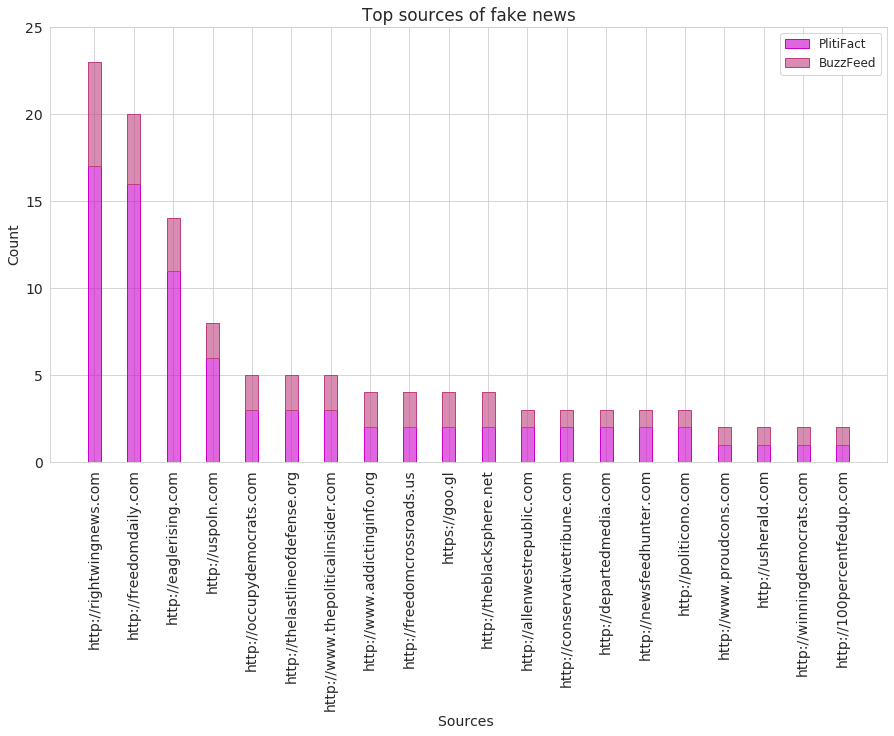

In [360]:
with sns.axes_style("whitegrid"):    
    fig, ax1 = plt.subplots(1,1, sharex=True, figsize=(15,8))
    _p1 = ax1.bar(np.arange(0,20),list(valc_source_fake_bf.values)[:20] , width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax1.bar(np.arange(0,20), list(valc_source_fake_pf.values)[:20], width, bottom=list(valc_source_fake_bf.values)[:20], color=color_pf_fk_9, edgecolor = color_pf_fk)
   
    ax1.set_ylim(0,25) # most of the data

     
    plt.subplots_adjust(wspace=0.15)    
    
    xticks(-0.0+np.arange(20), vc_source_fake.keys()[:20], rotation=90)

    ax1.set_xlabel("Sources ")
    ax1.set_ylabel("Count")
    ax1.set_title("Top sources of fake news")
    
    ax1.legend([_p1, _p2], ["PlitiFact", "BuzzFeed"], loc='upper right', prop={'size':12})
    
    

In [361]:
vc_source_real = df_all_news[(df_all_news["news_type"] == "real")]["source"].value_counts()

In [362]:
valc_source_real_bf = df_all_news[(df_all_news["news_type"] == "real") & (df_all_news["plt"] == "bf")]\
    [df_all_news["source"].isin(vc_source_real.keys())]["source"].value_counts()

In [363]:
valc_source_real_pf = df_all_news[(df_all_news["news_type"] == "real") & (df_all_news["plt"] == "pf")]\
    [df_all_news["source"].isin(vc_source_real.keys())]["source"].value_counts()

In [364]:
len(list(vc_source_real))

19

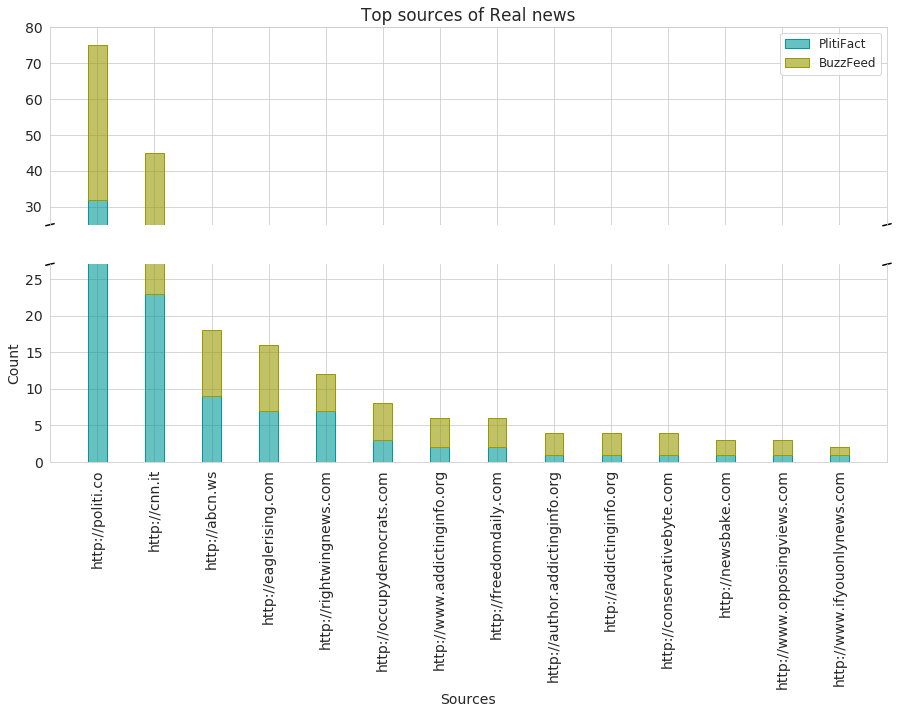

In [365]:
with sns.axes_style("whitegrid"):    
    fig, ( ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))
    _p1 = ax1.bar(np.arange(0,14),list(valc_source_real_bf.values)[:14] , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p2 = ax1.bar(np.arange(0,14), list(valc_source_real_pf.values)[:14], width, bottom=list(valc_source_real_bf.values)[:14], color=color_pf_real_9, edgecolor = color_pf_real)
  
    _p1 = ax2.bar(np.arange(0,14),list(valc_source_real_bf.values)[:14] , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p2 = ax2.bar(np.arange(0,14), list(valc_source_real_pf.values)[:14], width, bottom=list(valc_source_real_bf.values)[:14], color=color_pf_real_9, edgecolor = color_pf_real)
    
    plt.subplots_adjust(wspace=0.15)    
    

    ax1.set_ylim(0,27) # most of the data
    ax2.set_ylim(25, 80) # outliers only
    
    
    # hide the spines between ax and ax2
    ax1.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    
    xticks(-0.0+np.arange(14), vc_source_real.keys()[:14], rotation=90)
    ax1.set_xlabel("Sources")
    ax1.set_ylabel("Count")
    ax2.set_title("Top sources of Real news")

    ax2.legend([_p1, _p2], ["PlitiFact", "BuzzFeed"], loc='upper right', prop={'size':12})
    
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal    


### URL analysis

In [366]:
df_source = df_all_news[["news_alph_id", "news_type", "plt", "source"]]

In [367]:
def my_tldextract_extract(_url):
    #print(type(_url))
    if type(_url) == str:
        return tldextract.extract(_url)
    return "", "", ""

In [368]:
df_source['source_sub_domain'],  df_source['source_domain'], df_source['source_suffix'] = zip(*df_source["source"].apply(my_tldextract_extract))

In [369]:
df_source

news_alph_id news_type plt                       source  \
0      BuzzFeed_Fake_28      fake  bf       http://eaglerising.com   
1      BuzzFeed_Fake_17      fake  bf       http://eaglerising.com   
2      BuzzFeed_Fake_45      fake  bf      http://freedomdaily.com   
3      BuzzFeed_Fake_41      fake  bf      http://freedomdaily.com   
4      BuzzFeed_Fake_46      fake  bf      http://freedomdaily.com   
..                  ...       ...  ..                          ...   
417  PolitiFact_Real_39      real  pf       http://eaglerising.com   
418  PolitiFact_Real_20      real  pf             http://politi.co   
419  PolitiFact_Real_99      real  pf               http://abcn.ws   
420  PolitiFact_Real_30      real  pf               http://abcn.ws   
421  PolitiFact_Real_57      real  pf  http://conservativebyte.com   

    source_sub_domain     source_domain source_suffix  
0                           eaglerising           com  
1                           eaglerising           com  
2                          freedomdaily           com  
3                          freedomdaily           com  
4                          freedomdaily           com  
..                ...               ...           ...  
417                         eaglerising           com  
418                              politi            co  
419                                abcn            ws  
420                                abcn            ws  
421                    conservativebyte           com  

[422 rows x 7 columns]

In [370]:
df_source["source_suffix"].value_counts()

com      198
co        76
it        45
          39
org       27
ws        18
us         6
gl         3
net        3
in         2
world      2
news       1
me         1
site       1
Name: source_suffix, dtype: int64

In [371]:
df_source["source_domain"].value_counts()

politi                       75
cnn                          46
                             39
rightwingnews                28
eaglerising                  23
                             ..
alternativemediasyndicate     1
breakingtop                   1
floridasunpost                1
thesolexchange                1
amposts                       1
Name: source_domain, Length: 100, dtype: int64

In [372]:
list_source_suffix = list(set(df_source["source_suffix"]))
list_source_suffix.sort()

In [373]:
list_source_suffix

['',
 'co',
 'com',
 'gl',
 'in',
 'it',
 'me',
 'net',
 'news',
 'org',
 'site',
 'us',
 'world',
 'ws']

In [374]:
valc_source_fake_bf= {}
valc_source_fake_pf= {}
valc_source_real_bf= {}
valc_source_real_pf= {}
for _cur_item in list_source_suffix:
    valc_source_fake_bf[_cur_item] = list(df_source[(df_source["news_type"] == "fake") & \
                                                    (df_source["plt"] == "bf")]["source_suffix"].values).count(_cur_item)
    valc_source_fake_pf[_cur_item] = list(df_source[(df_source["news_type"] == "fake") & \
                                                    (df_source["plt"] == "pf")]["source_suffix"].values).count(_cur_item)
    valc_source_real_bf[_cur_item] = list(df_source[(df_source["news_type"] == "real") & \
                                                    (df_source["plt"] == "bf")]["source_suffix"].values).count(_cur_item)
    valc_source_real_pf[_cur_item] = list(df_source[(df_source["news_type"] == "real") & \
                                                    (df_source["plt"] == "pf")]["source_suffix"].values).count(_cur_item)

In [375]:
list(valc_source_fake_bf.values())

[8, 0, 73, 3, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0]

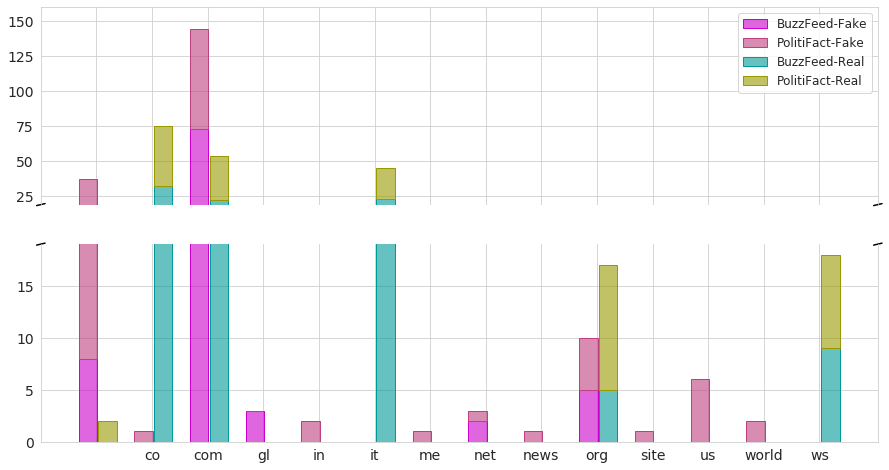

In [376]:
with sns.axes_style("whitegrid"):    
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))

    _p1 = ax1.bar(np.arange(0,len(list_source_suffix)), list(valc_source_fake_bf.values()), width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax1.bar(np.arange(0,len(list_source_suffix)), list(valc_source_fake_pf.values()), width, bottom=list(valc_source_fake_bf.values()), color=color_pf_fk_9, edgecolor = color_pf_fk)
    
    _p3 = ax1.bar(0.35 + np.arange(0,len(list_source_suffix)), list(valc_source_real_bf.values()) , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax1.bar(0.35 + np.arange(0,len(list_source_suffix)), list(valc_source_real_pf.values()), width, bottom=list(valc_source_real_bf.values()), color=color_pf_real_9, edgecolor = color_pf_real)
    
 
    _p1 = ax2.bar(np.arange(0,len(list_source_suffix)), list(valc_source_fake_bf.values()), width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax2.bar(np.arange(0,len(list_source_suffix)), list(valc_source_fake_pf.values()), width, bottom=list(valc_source_fake_bf.values()), color=color_pf_fk_9, edgecolor = color_pf_fk)
    
    _p3 = ax2.bar(0.35 + np.arange(0,len(list_source_suffix)), list(valc_source_real_bf.values()) , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax2.bar(0.35 + np.arange(0,len(list_source_suffix)), list(valc_source_real_pf.values()), width, bottom=list(valc_source_real_bf.values()), color=color_pf_real_9, edgecolor = color_pf_real)
    
    ax1.set_ylim(0,19) # most of the data
    ax2.set_ylim(19,160) # outliers only
    
    
    # hide the spines between ax and ax2
    ax1.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    
    plt.subplots_adjust(wspace=0.15)    
    
    xticks(.15+np.arange(len(list_source_suffix)), list_source_suffix, rotation=0)

    ax2.legend([_p1, _p2, _p3, _p4], ["BuzzFeed-Fake", "PolitiFact-Fake", "BuzzFeed-Real", "PolitiFact-Real"], loc='upper right', prop={'size':12})
    
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal    

Not that much data to analyze

### Alexa analysis

In [ ]:
def alexa_analysis(_url):
    #url = ""
    rank = np.nan
    reach_rank = np.nan
    reach_rank_delta = np.nan
    country_code = ""
    local_rank = np.nan
    owner = ""
    
    if(type(_url) == str):
        xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(_url)).read()
        #print(_url)
        result= xmltodict.parse(xml)

        data = json.dumps(result).replace("@","")
        data_tojson = json.loads(data)
        
        if "ALEXA" in data_tojson.keys():
            if "SD" in data_tojson["ALEXA"].keys():
                if type(data_tojson["ALEXA"]["SD"]) != dict :
                    if(len(data_tojson["ALEXA"]["SD"]) > 1):
                        if "POPULARITY" in data_tojson["ALEXA"]["SD"][1].keys():    
                            if "URL" in data_tojson["ALEXA"]["SD"][1]["POPULARITY"].keys():
                                url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
                            if "TEXT" in data_tojson["ALEXA"]["SD"][1]["POPULARITY"].keys():                
                                rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])

                        if "REACH" in data_tojson["ALEXA"]["SD"][1].keys(): 
                            if "RANK" in data_tojson["ALEXA"]["SD"][1]["REACH"].keys():
                                reach_rank = int(data_tojson["ALEXA"]["SD"][1]["REACH"]["RANK"])

                        if "RANK" in data_tojson["ALEXA"]["SD"][1].keys(): 
                            if "DELTA" in data_tojson["ALEXA"]["SD"][1]["RANK"].keys():
                                reach_rank_delta = int(data_tojson["ALEXA"]["SD"][1]["RANK"]["DELTA"])

                        if "COUNTRY" in data_tojson["ALEXA"]["SD"][1].keys(): 
                            if "CODE" in data_tojson["ALEXA"]["SD"][1]["COUNTRY"].keys():
                                country_code = data_tojson["ALEXA"]["SD"][1]["COUNTRY"]["CODE"]

                            if "RANK" in data_tojson["ALEXA"]["SD"][1]["COUNTRY"].keys():
                                local_rank = int(data_tojson["ALEXA"]["SD"][1]["COUNTRY"]["RANK"])


                    if "OWNER" in data_tojson["ALEXA"]["SD"][0].keys():
                        if "NAME" in data_tojson["ALEXA"]["SD"][0]["OWNER"]:
                            owner = data_tojson["ALEXA"]["SD"][0]["OWNER"]["NAME"]
                            
                            
    #print("  rank  " ,  rank, "  reach_rank  " , reach_rank, "  reach_rank_delta  ", reach_rank_delta, "  country_code  ", country_code, \
    #      "  local_rank  ", local_rank, "  local_rank  ", local_rank, "  owner  ", owner)
    return rank, reach_rank, reach_rank_delta, country_code, local_rank, owner
    #return{"rank" :  rank, "reach_rank" : reach_rank, "reach_rank_delta": reach_rank_delta, "country_code": country_code, "local_rank": local_rank, "local_rank": local_rank, "owner": owner}

In [ ]:
df_source

In [ ]:
df_source['rank'], df_source['reach_rank'], df_source['reach_rank_delta'], df_source['country_code'],\
    df_source['local_rank'], df_source["owner"] = \
    zip(*df_source["source"].map(alexa_analysis))

In [ ]:
df_source['owner'].value_counts()

In [ ]:
df_source['country_code'].value_counts()

Nothing interesting here!

Global ranks

In [ ]:
lst_source_rank_real_bf = df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "bf")]["rank"].values
lst_source_rank_real_pf = df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "pf")]["rank"].values
lst_source_rank_fake_bf = df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "bf")]["rank"].values
lst_source_rank_fake_pf = df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "pf")]["rank"].values

In [ ]:
with sns.axes_style("whitegrid"):    
    fig, ax = plt.subplots(1,1, sharex=True, figsize=(8,6))

    _p1 = ax.bar(np.arange(0,1), df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax.bar(np.arange(0,1), df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "bf")]["rank"].isna().sum(), width, bottom=df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), color=color_pf_fk_9, edgecolor = color_pf_fk)

    
    _p3 = ax.bar(np.arange(1,2), df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax.bar(np.arange(1,2), df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "bf")]["rank"].isna().sum(), width, bottom=df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), color=color_pf_real_9, edgecolor = color_pf_real)
    
    xticks(-0.0+np.arange(3), ["Fake", "Real"], rotation=0)
    yticks(np.arange(0,120,10))

    ax.legend([_p1, _p2, _p3, _p4], ["BuzzFeed-Fake", "PolitiFact-Fake", "BuzzFeed-Real", "PolitiFact-Real"], loc='upper right', prop={'size':12})

In [ ]:
len(lst_source_rank_real_pf)

In [ ]:
max_alexa_rating = max(df_source["rank"].values)+10000

In [ ]:
max_alexa_source_length = max(len(lst_source_rank_real_bf), len(lst_source_rank_real_pf), len(lst_source_rank_fake_bf), len(lst_source_rank_fake_pf))

In [ ]:
max_alexa_source_length

In [ ]:
lst_source_rank_real_bf.shape

In [ ]:
lst_source_rank_real_bf = np.pad(np.array(lst_source_rank_real_bf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_real_bf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

lst_source_rank_real_pf = np.pad(np.array(lst_source_rank_real_pf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_real_pf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

lst_source_rank_fake_bf = np.pad(np.array(lst_source_rank_fake_bf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_fake_bf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

lst_source_rank_fake_pf = np.pad(np.array(lst_source_rank_fake_pf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_fake_pf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

In [ ]:
with sns.axes_style("whitegrid"):    
    fig, axs = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(15,8))


    
    _p2 = axs.hist(np.concatenate((lst_source_rank_fake_bf,lst_source_rank_fake_pf), axis= 1), bins="auto", 
             histtype='stepfilled', color = [color_bf_fk_4, color_pf_fk_4], edgecolor = color_fk_9, stacked = True)
    _p2 = axs.hist(np.concatenate((lst_source_rank_real_bf,lst_source_rank_real_pf), axis= 1), bins="auto", 
             histtype='stepfilled', color = [color_bf_real_4, color_pf_real_4], edgecolor = color_real_9, stacked = True)    
  
    
  
    axs.set_xlim(6000,12000000) # most of the data
    axs.set_ylim(0,50) # most of the data
    

    
    #xticks(-0.0+np.arange(20), top_fake_authors[:20], rotation=90)

## Top Image

In [377]:
df_top_img = df_all_news[["news_alph_id", "news_type", "plt", "top_img"]]

In [378]:
df_all_news

news_alph_id                                            top_img  \
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
2      BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
3      BuzzFeed_Fake_41  http://freedomdaily.com/wp-content/uploads/201...   
4      BuzzFeed_Fake_46  http://freedomdaily.com/wp-content/uploads/201...   
..                  ...                                                ...   
417  PolitiFact_Real_39  http://eaglerising.com/wp-content/uploads/2016...   
418  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
419  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
421  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text  \
0    A Daisy of a Rerun\n\nI am of an age which inc...   
1    I can’t wait for “Weekend at Chelsea’s” to hit...   
2    131.1k SHARES Facebook Twitter\n\nWell tell us...   
3    0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
4    4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
..                                                 ...   
417  Never has the “rights for me, but not for thee...   
418  Gov. Chris Christie greets residents at a gath...   
419  Donald Trump Jr., a son of the Republican pres...   
420  As Donald Trump courted African-American voter...   
421  McCain Criticized Trump for Arpaio’s Pardon… S...   

                             authors keywords  \
0       [View All Posts, Jim Bowman]       []   
1      [View All Posts, Matt Barber]       []   
2                                 []       []   
3                                 []       []   
4                                 []       []   
..                               ...      ...   
417  [Philip Hodges, View All Posts]       []   
418                  [Matt Friedman]       []   
419                       [Abc News]       []   
420         [More Candace, Abc News]       []   
421                               []       []   

                                             meta_data  \
0    {'description': 'Obama stated of Hillary, “She...   
1    {'description': 'Am I saying there’s no chance...   
2    {'googlebot': 'noimageindex', 'generator': 'Po...   
3    {'googlebot': 'noimageindex', 'generator': 'Po...   
4    {'googlebot': 'noimageindex', 'generator': 'Po...   
..                                                 ...   
417  {'description': '"I think they should disarm i...   
418  {'description': '<p>Gov. Chris Christie has th...   
419  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
420  {'fb_title': 'Trump Calls for Nationwide Stop-...   
421  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://eaglerising.com/37040/michelle-obama-at...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
2    http://freedomdaily.com/female-muslim-american...   
3    http://freedomdaily.com/former-haitian-senate-...   
4    http://freedomdaily.com/charlotte-thugs-leaves...   
..                                                 ...   
417  http://eaglerising.com/36873/trump-challenges-...   
418  http://www.politico.com/states/new-jersey/stor...   
419  http://abcnews.go.com/Politics/donald-trump-jr...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
421                                                      

                                                images  \
0    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
2    [https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...   
3    [http://constitution.com/wp-content/uploads/20...   
4    [http://1csabj4ddrd61fgqez2e4nss.wpengine.netd...   
..                                            

In [379]:
df_all_news[df_all_news["news_type"] == "real"]["top_img"].value_counts().describe()

count    193.000000
mean       1.082902
std        0.386447
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: top_img, dtype: float64

In [380]:
df_all_news[df_all_news["news_type"] == "fake"]["top_img"].value_counts().describe()

count    169.000000
mean       1.029586
std        0.201956
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: top_img, dtype: float64

In [381]:
df_all_news[(df_all_news["news_type"] == "fake")]["top_img"].value_counts()

                                                                                                                                                              3
https://i1.wp.com/thelastlineofdefense.org/wp-content/uploads/2017/02/a1a.jpg?fit=1200%2C630                                                                  2
http://eaglerising.com/wp-content/uploads/2016/09/administration.jpg                                                                                          2
http://eaglerising.com/wp-content/uploads/2016/09/charity.jpg                                                                                                 2
http://rightwingnews.com/wp-content/uploads/2016/09/NYC-bomb.jpg                                                                                              1
                                                                                                                                                             ..
http://newsfeedpaper.press/wp-content/up

In [187]:
df_all_news[(df_all_news["news_type"] == "real")]["top_img"].value_counts()

http://static.politico.com/da/f5/44342c424c68b675719324b1106b/politico.jpg                                                       4
http://conservativetribune.com/wp-content/uploads/2017/08/arpaio-mccain-592x331.jpg                                              4
http://a.abcnews.com/assets/beta/assets/abcn_images/abc_logo_aluminum.png                                                        3
http://static.politico.com/2f/8c/e44158e84ee8a865e4ecedf0a1b9/160916-strauss-buchanan-loc.jpg                                    2
http://www.politico.eu/wp-content/uploads/2016/09/TrumpzillaRGB-1-1200x628.jpg                                                   2
                                                                                                                                ..
http://oppositionreport.com/wp-content/uploads/2016/09/Untitled-1-Recovered-Recovered-Recovered-Recovered-6.jpg                  1
http://static.politico.com/d5/6e/901134d741e4b43b4a28c843d638/160919-matteo-renzi-a

### URL analysis

In [101]:
df_url_top_img = df_all_news[["news_alph_id", "news_type", "plt", "top_img"]]

In [102]:
def my_tldextract_extract(_url):
    if type(_url) == str:
        return tldextract.extract(_url)
    return "", "", ""

In [103]:
df_url_top_img['top_img_sub_domain'],  df_url_top_img['top_img_domain'], df_url_top_img['top_img_suffix'] = zip(*df_url_top_img["top_img"].apply(my_tldextract_extract))

In [104]:
df_url_top_img

news_alph_id news_type plt  \
0      BuzzFeed_Fake_28      fake  bf   
1      BuzzFeed_Fake_17      fake  bf   
2      BuzzFeed_Fake_45      fake  bf   
3      BuzzFeed_Fake_41      fake  bf   
4      BuzzFeed_Fake_46      fake  bf   
..                  ...       ...  ..   
417  PolitiFact_Real_39      real  pf   
418  PolitiFact_Real_20      real  pf   
419  PolitiFact_Real_99      real  pf   
420  PolitiFact_Real_30      real  pf   
421  PolitiFact_Real_57      real  pf   

                                               top_img top_img_sub_domain  \
0    http://eaglerising.com/wp-content/uploads/2016...                      
1    http://eaglerising.com/wp-content/uploads/2016...                      
2    http://freedomdaily.com/wp-content/uploads/201...                      
3    http://freedomdaily.com/wp-content/uploads/201...                      
4    http://freedomdaily.com/wp-content/uploads/201...                      
..                                                 ...                ...   
417  http://eaglerising.com/wp-content/uploads/2016...                      
418  http://static.politico.com/c6/cd/2a88f055435fa...             static   
419  http://a.abcnews.com/images/Politics/AP_donald...                  a   
420  http://a.abcnews.com/images/Politics/RT_Trump_...                  a   
421  http://conservativetribune.com/wp-content/uplo...                      

          top_img_domain top_img_suffix  
0            eaglerising            com  
1            eaglerising            com  
2           freedomdaily            com  
3           freedomdaily            com  
4           freedomdaily            com  
..                   ...            ...  
417          eaglerising            com  
418             politico            com  
419              abcnews            com  
420              abcnews            com  
421  conservativetribune            com  

[422 rows x 7 columns]

In [105]:
df_url_top_img["top_img_suffix"].value_counts()

com      358
          42
org        6
eu         4
net        3
us         3
in         2
news       1
co         1
world      1
press      1
Name: top_img_suffix, dtype: int64

In [106]:
df_url_top_img["top_img_domain"].value_counts()

politico                     75
cnn                          43
                             42
rightwingnews                28
eaglerising                  23
                             ..
usadailytime                  1
hubspot                       1
alternativemediasyndicate     1
federalisttribune             1
empiresports                  1
Name: top_img_domain, Length: 89, dtype: int64

In [107]:
list_top_img_suffix = list(set(df_url_top_img["top_img_suffix"]))
list_top_img_suffix.sort()

In [108]:
list_top_img_suffix

['', 'co', 'com', 'eu', 'in', 'net', 'news', 'org', 'press', 'us', 'world']

In [109]:
valc_top_img_fake_bf= {}
valc_top_img_fake_pf= {}
valc_top_img_real_bf= {}
valc_top_img_real_pf= {}
for _cur_item in list_top_img_suffix:
    valc_top_img_fake_bf[_cur_item] = list(df_url_top_img[(df_url_top_img["news_type"] == "fake") & \
                                                    (df_url_top_img["plt"] == "bf")]["top_img_suffix"].values).count(_cur_item)
    valc_top_img_fake_pf[_cur_item] = list(df_url_top_img[(df_url_top_img["news_type"] == "fake") & \
                                                    (df_url_top_img["plt"] == "pf")]["top_img_suffix"].values).count(_cur_item)
    valc_top_img_real_bf[_cur_item] = list(df_url_top_img[(df_url_top_img["news_type"] == "real") & \
                                                    (df_url_top_img["plt"] == "bf")]["top_img_suffix"].values).count(_cur_item)
    valc_top_img_real_pf[_cur_item] = list(df_url_top_img[(df_url_top_img["news_type"] == "real") & \
                                                    (df_url_top_img["plt"] == "pf")]["top_img_suffix"].values).count(_cur_item)

In [110]:
list(valc_top_img_fake_bf.values())

[10, 0, 79, 0, 0, 2, 0, 0, 0, 0, 0]

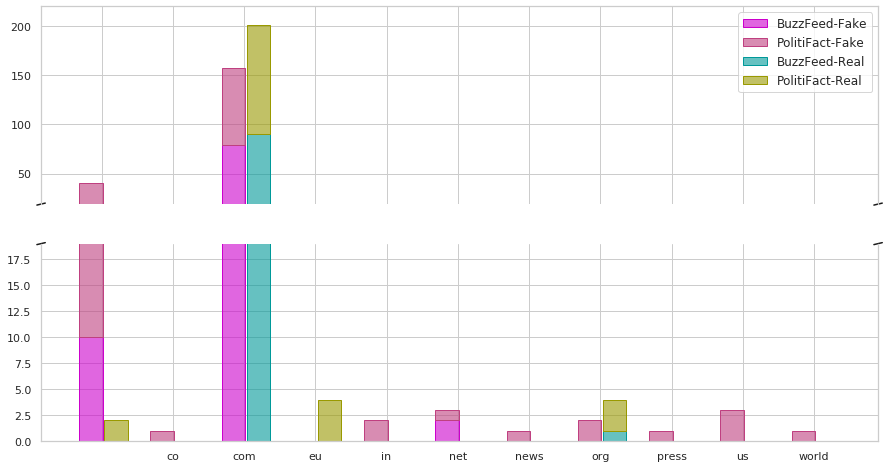

In [111]:
with sns.axes_style("whitegrid"):    
    fig,(ax2, ax1) = plt.subplots(2,1, sharex=True, figsize=(15,8))

    _p1 = ax1.bar(np.arange(0,len(list_top_img_suffix)), list(valc_top_img_fake_bf.values()), width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax1.bar(np.arange(0,len(list_top_img_suffix)), list(valc_top_img_fake_pf.values()), width, bottom=list(valc_top_img_fake_bf.values()), color=color_pf_fk_9, edgecolor = color_pf_fk)
    
    _p3 = ax1.bar(0.35 + np.arange(0,len(list_top_img_suffix)), list(valc_top_img_real_bf.values()) , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax1.bar(0.35 + np.arange(0,len(list_top_img_suffix)), list(valc_top_img_real_pf.values()), width, bottom=list(valc_top_img_real_bf.values()), color=color_pf_real_9, edgecolor = color_pf_real)
    
 
    _p1 = ax2.bar(np.arange(0,len(list_top_img_suffix)), list(valc_top_img_fake_bf.values()), width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax2.bar(np.arange(0,len(list_top_img_suffix)), list(valc_top_img_fake_pf.values()), width, bottom=list(valc_top_img_fake_bf.values()), color=color_pf_fk_9, edgecolor = color_pf_fk)
    
    _p3 = ax2.bar(0.35 + np.arange(0,len(list_top_img_suffix)), list(valc_top_img_real_bf.values()) , width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax2.bar(0.35 + np.arange(0,len(list_top_img_suffix)), list(valc_top_img_real_pf.values()), width, bottom=list(valc_top_img_real_bf.values()), color=color_pf_real_9, edgecolor = color_pf_real)
    
    ax1.set_ylim(0,19) # most of the data
    ax2.set_ylim(19,220) # outliers only
    
    
    # hide the spines between ax and ax2
    ax1.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)

    
    plt.subplots_adjust(wspace=0.15)    
    
    xticks(.15+np.arange(len(list_top_img_suffix)), list_top_img_suffix, rotation=0)

    ax2.legend([_p1, _p2, _p3, _p4], ["BuzzFeed-Fake", "PolitiFact-Fake", "BuzzFeed-Real", "PolitiFact-Real"], loc='upper right', prop={'size':12})
    
    d = .005  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
    ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
    ax1.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal    

In [112]:
df_url_top_img["top_img_domain"].value_counts()

politico                     75
cnn                          43
                             42
rightwingnews                28
eaglerising                  23
                             ..
usadailytime                  1
hubspot                       1
alternativemediasyndicate     1
federalisttribune             1
empiresports                  1
Name: top_img_domain, Length: 89, dtype: int64

In [113]:


fig = px.treemap(df_url_top_img, path=['top_img_suffix', 'top_img_domain', 'top_img_sub_domain'],
                  color='news_type')
fig.update_layout(treemapcolorway = ["green"])
fig.show()

#### Alexa analysis

In [ ]:
def alexa_analysis(_url):
    #url = ""
    rank = np.nan
    reach_rank = np.nan
    reach_rank_delta = np.nan
    country_code = ""
    local_rank = np.nan
    owner = ""
    
    if(type(_url) == str):
        xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(_url)).read()
        #print(_url)
        result= xmltodict.parse(xml)

        data = json.dumps(result).replace("@","")
        data_tojson = json.loads(data)
        
        if "ALEXA" in data_tojson.keys():
            if "SD" in data_tojson["ALEXA"].keys():
                if type(data_tojson["ALEXA"]["SD"]) != dict :
                    if(len(data_tojson["ALEXA"]["SD"]) > 1):
                        if "POPULARITY" in data_tojson["ALEXA"]["SD"][1].keys():    
                            if "URL" in data_tojson["ALEXA"]["SD"][1]["POPULARITY"].keys():
                                url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
                            if "TEXT" in data_tojson["ALEXA"]["SD"][1]["POPULARITY"].keys():                
                                rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])

                        if "REACH" in data_tojson["ALEXA"]["SD"][1].keys(): 
                            if "RANK" in data_tojson["ALEXA"]["SD"][1]["REACH"].keys():
                                reach_rank = int(data_tojson["ALEXA"]["SD"][1]["REACH"]["RANK"])

                        if "RANK" in data_tojson["ALEXA"]["SD"][1].keys(): 
                            if "DELTA" in data_tojson["ALEXA"]["SD"][1]["RANK"].keys():
                                reach_rank_delta = int(data_tojson["ALEXA"]["SD"][1]["RANK"]["DELTA"])

                        if "COUNTRY" in data_tojson["ALEXA"]["SD"][1].keys(): 
                            if "CODE" in data_tojson["ALEXA"]["SD"][1]["COUNTRY"].keys():
                                country_code = data_tojson["ALEXA"]["SD"][1]["COUNTRY"]["CODE"]

                            if "RANK" in data_tojson["ALEXA"]["SD"][1]["COUNTRY"].keys():
                                local_rank = int(data_tojson["ALEXA"]["SD"][1]["COUNTRY"]["RANK"])


                    if "OWNER" in data_tojson["ALEXA"]["SD"][0].keys():
                        if "NAME" in data_tojson["ALEXA"]["SD"][0]["OWNER"]:
                            owner = data_tojson["ALEXA"]["SD"][0]["OWNER"]["NAME"]
                            
                            
    #print("  rank  " ,  rank, "  reach_rank  " , reach_rank, "  reach_rank_delta  ", reach_rank_delta, "  country_code  ", country_code, \
    #      "  local_rank  ", local_rank, "  local_rank  ", local_rank, "  owner  ", owner)
    return rank, reach_rank, reach_rank_delta, country_code, local_rank, owner
    #return{"rank" :  rank, "reach_rank" : reach_rank, "reach_rank_delta": reach_rank_delta, "country_code": country_code, "local_rank": local_rank, "local_rank": local_rank, "owner": owner}

In [ ]:
df_source

In [ ]:
df_source['rank'], df_source['reach_rank'], df_source['reach_rank_delta'], df_source['country_code'],\
    df_source['local_rank'], df_source["owner"] = \
    zip(*df_source["source"].map(alexa_analysis))

In [ ]:
df_source['owner'].value_counts()

In [ ]:
df_source['country_code'].value_counts()

Nothing interesting here!

Global ranks

In [ ]:
lst_source_rank_real_bf = df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "bf")]["rank"].values
lst_source_rank_real_pf = df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "pf")]["rank"].values
lst_source_rank_fake_bf = df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "bf")]["rank"].values
lst_source_rank_fake_pf = df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "pf")]["rank"].values

In [ ]:
with sns.axes_style("whitegrid"):    
    fig, ax = plt.subplots(1,1, sharex=True, figsize=(8,6))

    _p1 = ax.bar(np.arange(0,1), df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax.bar(np.arange(0,1), df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "bf")]["rank"].isna().sum(), width, bottom=df_source[(df_source["news_type"] == "fake") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), color=color_pf_fk_9, edgecolor = color_pf_fk)

    
    _p3 = ax.bar(np.arange(1,2), df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax.bar(np.arange(1,2), df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "bf")]["rank"].isna().sum(), width, bottom=df_source[(df_source["news_type"] == "real") & \
                            (df_source["plt"] == "pf")]["rank"].isna().sum(), color=color_pf_real_9, edgecolor = color_pf_real)
    
    xticks(-0.0+np.arange(3), ["Fake", "Real"], rotation=0)
    yticks(np.arange(0,120,10))

    ax.legend([_p1, _p2, _p3, _p4], ["BuzzFeed-Fake", "PolitiFact-Fake", "BuzzFeed-Real", "PolitiFact-Real"], loc='upper right', prop={'size':12})

In [ ]:
len(lst_source_rank_real_pf)

In [ ]:
max_alexa_rating = max(df_source["rank"].values)+10000

In [ ]:
max_alexa_source_length = max(len(lst_source_rank_real_bf), len(lst_source_rank_real_pf), len(lst_source_rank_fake_bf), len(lst_source_rank_fake_pf))

In [ ]:
max_alexa_source_length

In [ ]:
lst_source_rank_real_bf.shape

In [ ]:
lst_source_rank_real_bf = np.pad(np.array(lst_source_rank_real_bf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_real_bf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

lst_source_rank_real_pf = np.pad(np.array(lst_source_rank_real_pf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_real_pf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

lst_source_rank_fake_bf = np.pad(np.array(lst_source_rank_fake_bf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_fake_bf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

lst_source_rank_fake_pf = np.pad(np.array(lst_source_rank_fake_pf).astype(float), (0,max_alexa_source_length-len(lst_source_rank_fake_pf)), 'constant', constant_values=np.nan).T.reshape(max_alexa_source_length,1)

In [ ]:
with sns.axes_style("whitegrid"):    
    fig, axs = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(15,8))


    
    _p2 = axs.hist(np.concatenate((lst_source_rank_fake_bf,lst_source_rank_fake_pf), axis= 1), bins="auto", 
             histtype='stepfilled', color = [color_bf_fk_4, color_pf_fk_4], edgecolor = color_fk_9, stacked = True)
    _p2 = axs.hist(np.concatenate((lst_source_rank_real_bf,lst_source_rank_real_pf), axis= 1), bins="auto", 
             histtype='stepfilled', color = [color_bf_real_4, color_pf_real_4], edgecolor = color_real_9, stacked = True)    
  
    
  
    axs.set_xlim(6000,12000000) # most of the data
    axs.set_ylim(0,50) # most of the data
    

    
    #xticks(-0.0+np.arange(20), top_fake_authors[:20], rotation=90)

In [ ]:
xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format("http://allenwestrepublic.com/wp-content/uploads/2016/09/Internet-Giveaway.jpg")).read()

In [ ]:
result= xmltodict.parse(xml)

data = json.dumps(result).replace("@","")
data_tojson = json.loads(data)

In [ ]:
data_tojson["ALEXA"].keys()

In [ ]:
data_tojson["ALEXA"]["SD"]

In [ ]:
def my_tldextract_extract(_url):
    if type(_url) == str:
        return tldextract.extract(_url)
    return "", "", ""

In [ ]:
df_top_img['top_img_sub_domain'],  df_top_img['top_img_domain'], df_top_img['top_img_suffix'] = zip(*df_all_news["top_img"].apply(my_tldextract_extract))

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News top image domain")
    sns.countplot(y="top_img_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["top_img_domain"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News top image domain")
    sns.countplot(y="top_img_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["top_img_domain"].value_counts().iloc[:20].index,\
                 color = "r")

In [ ]:
df_all_news_auth['top_img_sub_domain'].value_counts()

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News top image sub domain")
    sns.countplot(y="top_img_sub_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["top_img_sub_domain"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News top image sub domain")
    sns.countplot(y="top_img_sub_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["top_img_sub_domain"].value_counts().iloc[:20].index,\
                 color = "r")

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News top image url suffix")
    sns.countplot(y="top_img_suffix", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["top_img_suffix"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News top image url suffix")
    sns.countplot(y="top_img_suffix", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["top_img_suffix"].value_counts().iloc[:20].index,\
                 color = "r")

### Canonical Link

In [ ]:
df_all_news_auth['can_link_sub_domain'],  df_all_news_auth['can_link_domain'], df_all_news_auth['can_link_suffix'] = zip(*df_all_news_auth["canonical_link"].apply(my_tldextract_extract))

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News top Cannonical Link domain")
    sns.countplot(y="can_link_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["can_link_domain"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News top Cannonical Link domain")
    sns.countplot(y="can_link_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["can_link_domain"].value_counts().iloc[:20].index,\
                 color = "r")

In [ ]:
df_all_news_auth['can_link_sub_domain'].value_counts()

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News Cannonical Link sub domain")
    sns.countplot(y="can_link_sub_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["can_link_sub_domain"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News Cannonical Link sub domain")
    sns.countplot(y="can_link_sub_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["can_link_sub_domain"].value_counts().iloc[:20].index,\
                 color = "r")

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News Cannonical Link url suffix")
    sns.countplot(y="can_link_suffix", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["can_link_suffix"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News Cannonical Link url suffix")
    sns.countplot(y="can_link_suffix", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["can_link_suffix"].value_counts().iloc[:20].index,\
                 color = "r")

In [ ]:
df_all_news_auth[df_all_news_auth["news_type" == "fake"]]

### URL

In [ ]:
df_all_news_auth['url_sub_domain'],  df_all_news_auth['url_domain'], df_all_news_auth['url_suffix'] = zip(*df_all_news_auth["url"].apply(my_tldextract_extract))

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News URL domain")
    sns.countplot(y="url_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["url_domain"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News URL domain")
    sns.countplot(y="url_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["url_domain"].value_counts().iloc[:20].index,\
                 color = "r")

In [ ]:
df_all_news_auth['url_sub_domain'].value_counts()

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News URL sub domain")
    sns.countplot(y="url_sub_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["url_sub_domain"].value_counts().iloc[:20].index,\
                 color = "g")
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News URL sub domain")
    sns.countplot(y="url_sub_domain", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["url_sub_domain"].value_counts().iloc[:20].index,\
                 color = "r")

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News URL suffix")
    sns.countplot(y="url_suffix", data=df_all_news_auth[df_all_news_auth["news_type"] == "real"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "real"]["url_suffix"].value_counts().iloc[:20].index,\
                 color = "g", alpha=0.8)
    
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Fake News URL suffix")
    sns.countplot(y="url_suffix", data=df_all_news_auth[df_all_news_auth["news_type"] == "fake"], \
                  order=df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["url_suffix"].value_counts().iloc[:20].index,\
                 color = "r", alpha=0.8)

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    #plt.title("Count of Fake News URL suffix")
    sns.countplot(x="url_suffix", data=df_all_news_auth, \
                  order=df_all_news_auth["url_suffix"].value_counts().iloc[:20].index,\
                 hue = "news_type", alpha=0.7, palette=["r", "g"], edgecolor="0.9", linewidth=0,)
    plt.show()

In [ ]:
df_all_news_auth[df_all_news_auth["news_type"] == "fake"]["images"][2]

## Text

##### Sentiment analysis for news body

In [71]:
tqdm_notebook().pandas()

In [72]:
df_news_txt = df_all_news[["news_alph_id", "text", "plt", "news_type"]]

In [73]:
df_news_txt

news_alph_id                                               text  \
0      BuzzFeed_Fake_28  A Daisy of a Rerun\n\nI am of an age which inc...   
1      BuzzFeed_Fake_17  I can’t wait for “Weekend at Chelsea’s” to hit...   
2      BuzzFeed_Fake_45  131.1k SHARES Facebook Twitter\n\nWell tell us...   
3      BuzzFeed_Fake_41  0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
4      BuzzFeed_Fake_46  4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
..                  ...                                                ...   
417  PolitiFact_Real_39  Never has the “rights for me, but not for thee...   
418  PolitiFact_Real_20  Gov. Chris Christie greets residents at a gath...   
419  PolitiFact_Real_99  Donald Trump Jr., a son of the Republican pres...   
420  PolitiFact_Real_30  As Donald Trump courted African-American voter...   
421  PolitiFact_Real_57  McCain Criticized Trump for Arpaio’s Pardon… S...   

    plt news_type  
0    bf      fake  
1    bf      fake  
2    bf      fake  
3    bf      fake  
4    bf      fake  
..   ..       ...  
417  pf      real  
418  pf      real  
419  pf      real  
420  pf      real  
421  pf      real  

[422 rows x 4 columns]

In [74]:
df_news_txt["sentences"] = df_news_txt["text"].progress_map(sent_tokenize)

In [75]:
df_news_txt['tokens_sentences'] = df_news_txt['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])

In [76]:
df_news_txt['POS_tokens'] = df_news_txt['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])

Lemitization

In [77]:




def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [78]:
# Lemmatizing each word with its POS tag, in each sentence
df_news_txt['tokens_sentences_lemmatized'] = df_news_txt['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

Stop Words

In [79]:


stopwords_verbs = []
stopwords_other = ['de', 'en']
my_stopwords = stopwords.words("english") + stopwords_verbs + stopwords_other

In [80]:
 # to flatten list of sentences of tokens into list of tokens

In [81]:
df_news_txt['tokens'] = df_news_txt['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df_news_txt['tokens'] = df_news_txt['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

#### LDA

bi-grams and tri-grams

In [82]:
tokens = df_news_txt['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

In [83]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

In [86]:
from gensim import models
np.random.seed(37)
num_topics = 10
lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

#### LDA exploration

Topics

In [87]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)

0: 0.009*"obama" + 0.006*"would" + 0.006*"know" + 0.006*"country" + 0.005*"make" + 0.005*"us" + 0.005*"also" + 0.004*"get" + 0.004*"president" + 0.004*"want"
1: 0.010*"trump" + 0.010*"go" + 0.008*"people" + 0.006*"get" + 0.006*"would" + 0.005*"make" + 0.005*"time" + 0.005*"clinton" + 0.005*"want" + 0.005*"take"
2: 0.009*"people" + 0.007*"would" + 0.007*"take" + 0.007*"trump" + 0.006*"get" + 0.006*"go" + 0.006*"make" + 0.005*"time" + 0.005*"want" + 0.005*"donald_trump"
3: 0.024*"trump" + 0.008*"take" + 0.007*"clinton" + 0.005*"would" + 0.005*"also" + 0.005*"hillary_clinton" + 0.004*"make" + 0.004*"attack" + 0.004*"country" + 0.004*"report"
4: 0.022*"trump" + 0.008*"donald_trump" + 0.008*"people" + 0.008*"go" + 0.007*"clinton" + 0.007*"make" + 0.006*"think" + 0.006*"know" + 0.006*"would" + 0.005*"also"
5: 0.022*"trump" + 0.010*"clinton" + 0.008*"would" + 0.006*"also" + 0.005*"know" + 0.005*"page" + 0.005*"campaign" + 0.004*"come" + 0.004*"go" + 0.004*"take"
6: 0.010*"obama" + 0.009*"woul

In [88]:
len(corpus)

422

In [89]:
lda_model[corpus[8]]

[(4, 0.9976974)]

Assigning topic to docs

In [90]:
topics = [lda_model[corpus[i]] for i in range(len(df_news_txt))]

In [91]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [92]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [93]:
df_news_txt

news_alph_id                                               text  \
0      BuzzFeed_Fake_28  A Daisy of a Rerun\n\nI am of an age which inc...   
1      BuzzFeed_Fake_17  I can’t wait for “Weekend at Chelsea’s” to hit...   
2      BuzzFeed_Fake_45  131.1k SHARES Facebook Twitter\n\nWell tell us...   
3      BuzzFeed_Fake_41  0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
4      BuzzFeed_Fake_46  4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
..                  ...                                                ...   
417  PolitiFact_Real_39  Never has the “rights for me, but not for thee...   
418  PolitiFact_Real_20  Gov. Chris Christie greets residents at a gath...   
419  PolitiFact_Real_99  Donald Trump Jr., a son of the Republican pres...   
420  PolitiFact_Real_30  As Donald Trump courted African-American voter...   
421  PolitiFact_Real_57  McCain Criticized Trump for Arpaio’s Pardon… S...   

    plt news_type                                          sentences  \
0    bf      fake  [A Daisy of a Rerun\n\nI am of an age which in...   
1    bf      fake  [I can’t wait for “Weekend at Chelsea’s” to hi...   
2    bf      fake  [131.1k SHARES Facebook Twitter\n\nWell tell u...   
3    bf      fake  [0 SHARES Facebook Twitter\n\nBernard Sansaric...   
4    bf      fake  [4.3k SHARES Facebook Twitter\n\nCharlotte rio...   
..   ..       ...                                                ...   
417  pf      real  [Never has the “rights for me, but not for the...   
418  pf      real  [Gov., Chris Christie greets residents at a ga...   
419  pf      real  [Donald Trump Jr., a son of the Republican pre...   
420  pf      real  [As Donald Trump courted African-American vote...   
421  pf      real  [McCain Criticized Trump for Arpaio’s Pardon… ...   

                                      tokens_sentences  \
0    [[A, Daisy, of, a, Rerun, I, am, of, an, age, ...   
1    [[I, can, ’, t, wait, for, “, Weekend, at, Che...   
2    [[131.1k, SHARES, Facebook, Twitter, Well, tel...   
3    [[0, SHARES, Facebook, Twitter, Bernard, Sansa...   
4    [[4.3k, SHARES, Facebook, Twitter, Charlotte, ...   
..                                                 ...   
417  [[Never, has, the, “, rights, for, me, ,, but,...   
418  [[Gov, .], [Chris, Christie, greets, residents...   
419  [[Donald, Trump, Jr., ,, a, son, of, the, Repu...   
420  [[As, Donald, Trump, courted, African-American...   
421  [[McCain, Criticized, Trump, for, Arpaio, ’, s...   

                                            POS_tokens  \
0    [[(A, DT), (Daisy, NNP), (of, IN), (a, DT), (R...   
1    [[(I, PRP), (can, MD), (’, VB), (t, JJ), (wait...   
2    [[(131.1k, CD), (SHARES, NNP), (Facebook, NNP)...   
3    [[(0, CD), (SHARES, NNP), (Facebook, NNP), (Tw...   
4    [[(4.3k, CD), (SHARES, NNP), (Facebook, NNP), ...   
..                                                 ...   
417  [[(Never, RB), (has, VBZ), (the, DT), (“, NNP)...   
418  [[(Gov, NNP), (., .)], [(Chris, NNP), (Christi...   
419  [[(Donald, NNP), (Trump, NNP), (Jr., NNP), (,,...   
420  [[(As, IN), (Donald, NNP), (Trump, NNP), (cour...   
421  [[(McCain, NNP), (Criticized, NNP), (Trump, NN...   

                           tokens_sentences_lemmatized  \
0    [[A, Daisy, of, a, Rerun, I, be, of, an, age, ...   
1    [[I, can, ’, t, wait, for, “, Weekend, at, Che...   
2    [[131.1k, SHARES, Facebook, Twitter, Well, tel...   
3    [[0, SHARES, Facebook, Twitter, Bernard, Sansa...   
4    [[4.3k, SHARES, Facebook, Twitter, Charlotte, ...   
..                                                 ...   
417  [[Never, have, the, “, right, for, me, ,, but,...   
418  [[Gov, .], [Chris, Christie, greet, resident, ...   
419  [[Donald, Trump, Jr., ,, a, son, of, the, Repu...   
420  [[As, Donald, Trump, court, African-American, ...   
421  [[McCain, Criticized, Trump, for, Arpaio, ’, s...   

                                                tokens  
0    [daisy, rerun, age, include, probably, first, ...  
1   

In [94]:
pd.merge(df_news_txt["news_alph_id"], document_topic, left_index=True, right_index=True).to_csv("topic.csv", index = False)

In [95]:
document_topic.sort_values(2, ascending=False)[2].head(20)

289    0.999596
357    0.999471
141    0.999420
52     0.999412
42     0.999319
258    0.999303
5      0.999297
49     0.999292
146    0.999263
64     0.999218
160    0.999152
301    0.999135
222    0.999127
253    0.999110
212    0.999073
294    0.999073
377    0.999043
182    0.998930
300    0.998929
196    0.998917
Name: 2, dtype: float64

In [96]:
document_topic.loc[document_topic.idxmax(axis=1).sort_values().index]

0         1         2         3         4         5         6  \
86   0.997911  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
110  0.856150  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
291  0.613781  0.000000  0.056532  0.000000  0.021885  0.019664  0.021232   
292  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
100  0.547731  0.000000  0.000000  0.079412  0.000000  0.233432  0.139155   
..        ...       ...       ...       ...       ...       ...       ...   
200  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
201  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
208  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
372  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
0    0.000000  0.024577  0.000000  0.000000  0.000000  0.000000  0.000000   

            7         8         9  
86   0.000000  0.000000  0.000000  
110  0.000000  0.000000  0.143377  
291  0.014882  0.012172  0.239819  
292  0.100000  0.100000  0.100000  
100  0.000000  0.000000  0.000000  
..        ...       ...       ...  
200  0.000000  0.000000  0.999451  
201  0.000000  0.000000  0.998047  
208  0.000000  0.000000  0.998366  
372  0.000000  0.000000  0.999082  
0    0.000000  0.000000  0.975157  

[422 rows x 10 columns]

In [97]:
document_topic

0         1    2         3         4         5    6        7  \
0    0.000000  0.024577  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
1    0.000000  0.999720  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
2    0.000000  0.120889  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
3    0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.99889   
4    0.000000  0.000000  0.0  0.970722  0.028882  0.000000  0.0  0.00000   
..        ...       ...  ...       ...       ...       ...  ...      ...   
417  0.000000  0.000000  0.0  0.000000  0.999175  0.000000  0.0  0.00000   
418  0.999151  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
419  0.247727  0.000000  0.0  0.000000  0.162803  0.000000  0.0  0.00000   
420  0.000000  0.000000  0.0  0.000000  0.000000  0.999468  0.0  0.00000   
421  0.000000  0.000000  0.0  0.993616  0.000000  0.000000  0.0  0.00000   

            8         9  
0    0.000000  0.975157  
1    0.000000  0.000000  
2    0.000000  0.878342  
3    0.000000  0.000000  
4    0.000000  0.000000  
..        ...       ...  
417  0.000000  0.000000  
418  0.000000  0.000000  
419  0.588656  0.000000  
420  0.000000  0.000000  
421  0.000000  0.000000  

[422 rows x 10 columns]

Text(0.5, 1, 'News vs Topic weight')

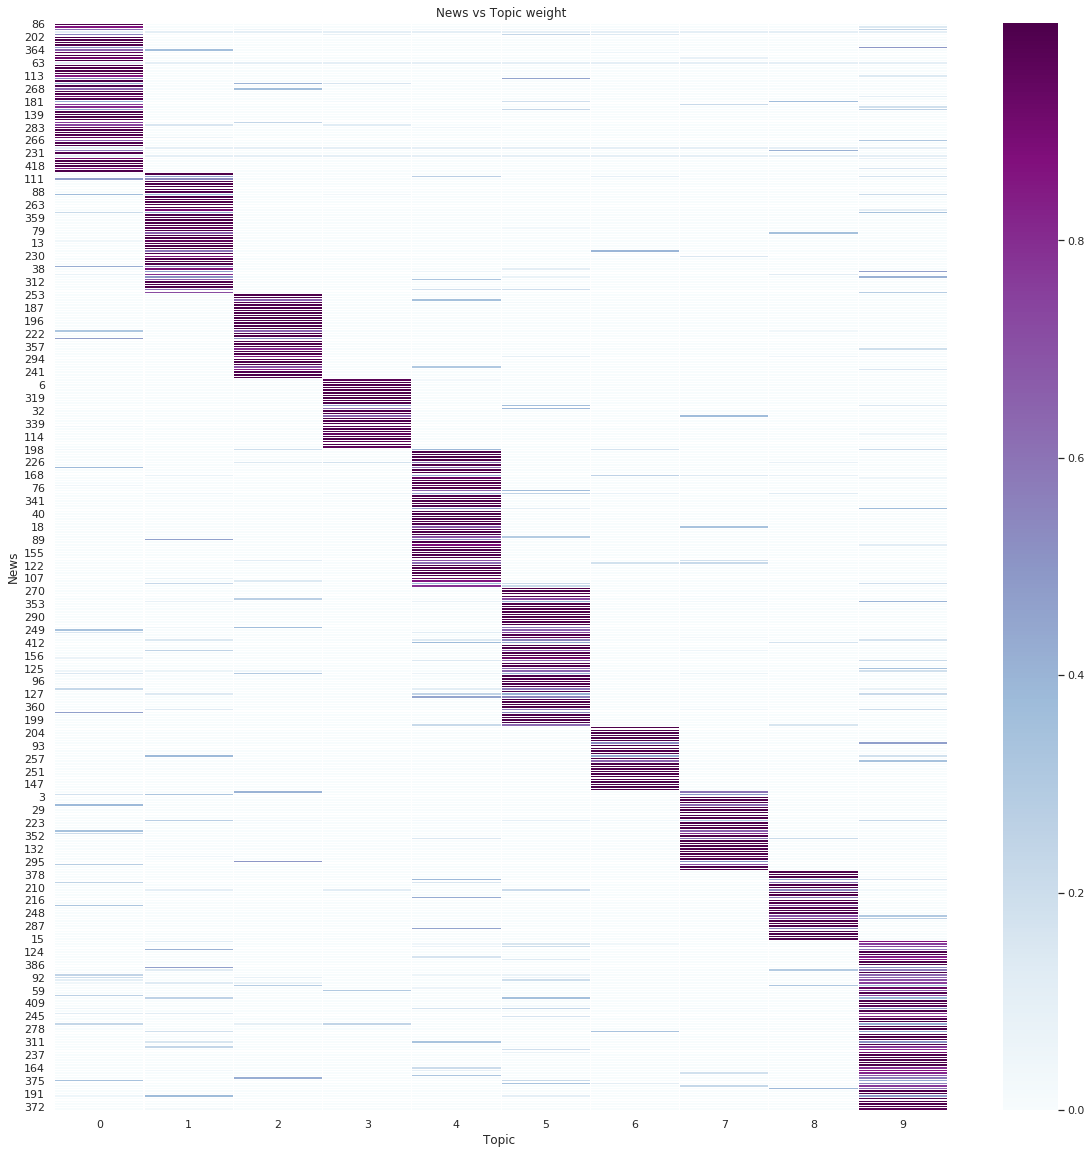

In [116]:

ax1 = sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index], cmap="BuPu", 
           linewidth=.1, cbar_kws={"shrink": 1})

ax1.set_xlabel("Topic ")
ax1.set_ylabel("News")
ax1.set_title("News vs Topic weight")


In [175]:
df_all_news.columns

Index(['news_alph_id', 'top_img', 'text', 'authors', 'keywords', 'meta_data',
       'canonical_link', 'images', 'title', 'url', 'summary', 'movies',
       'publish_date', 'source', 'plt', 'news_type', 'news_num_id',
       'news_id_real'],
      dtype='object')

In [179]:
df_emotion_lbl = pd.merge(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index], df_all_news[["news_id_real", "news_type"]], left_index=True, right_index=True)

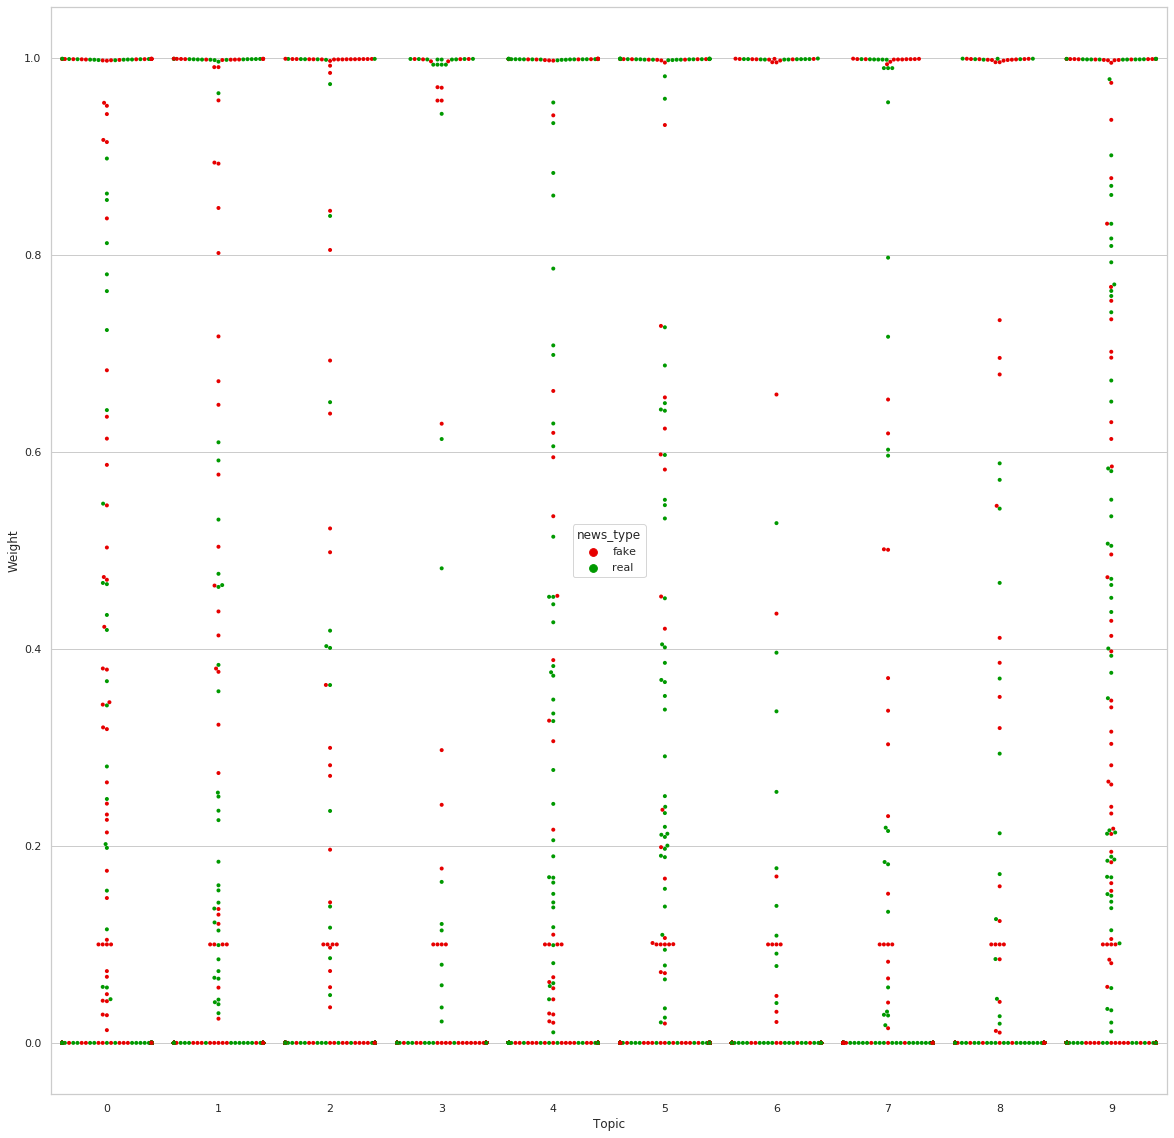

In [186]:
with sns.axes_style("whitegrid"):  
    sns.swarmplot(data=df_emotion_lbl.melt(['news_id_real', 'news_type'], var_name='Topic',  value_name='Weight'), 
                  x = "Topic", y="Weight", hue = "news_type", palette = sns.color_palette([color_fk_4, color_real_4]),  size=4)

In [184]:
df_emotion_lbl.melt(['news_id_real', 'news_type'], var_name='Topic',  value_name='Weight')

news_id_real news_type Topic    Weight
0       BuzzFeed_Fake_117      fake     0  0.997911
1        BuzzFeed_Real_11      real     0  0.856150
2     PolitiFact_Fake_205      fake     0  0.613781
3     PolitiFact_Fake_167      fake     0  0.100000
4        BuzzFeed_Real_82      real     0  0.547731
...                   ...       ...   ...       ...
4215  PolitiFact_Fake_128      fake     9  0.999451
4216  PolitiFact_Fake_210      fake     9  0.998047
4217  PolitiFact_Fake_139      fake     9  0.998366
4218    PolitiFact_Real_6      real     9  0.999082
4219    BuzzFeed_Fake_119      fake     9  0.975157

[4220 rows x 4 columns]

In [118]:
document_topic

0         1    2         3         4         5    6        7  \
0    0.000000  0.024577  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
1    0.000000  0.999720  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
2    0.000000  0.120889  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
3    0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.99889   
4    0.000000  0.000000  0.0  0.970722  0.028882  0.000000  0.0  0.00000   
..        ...       ...  ...       ...       ...       ...  ...      ...   
417  0.000000  0.000000  0.0  0.000000  0.999175  0.000000  0.0  0.00000   
418  0.999151  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.00000   
419  0.247727  0.000000  0.0  0.000000  0.162803  0.000000  0.0  0.00000   
420  0.000000  0.000000  0.0  0.000000  0.000000  0.999468  0.0  0.00000   
421  0.000000  0.000000  0.0  0.993616  0.000000  0.000000  0.0  0.00000   

            8         9  
0    0.000000  0.975157  
1    0.000000  0.000000  
2    0.000000  0.878342  
3    0.000000  0.000000  
4    0.000000  0.000000  
..        ...       ...  
417  0.000000  0.000000  
418  0.000000  0.000000  
419  0.588656  0.000000  
420  0.000000  0.000000  
421  0.000000  0.000000  

[422 rows x 10 columns]

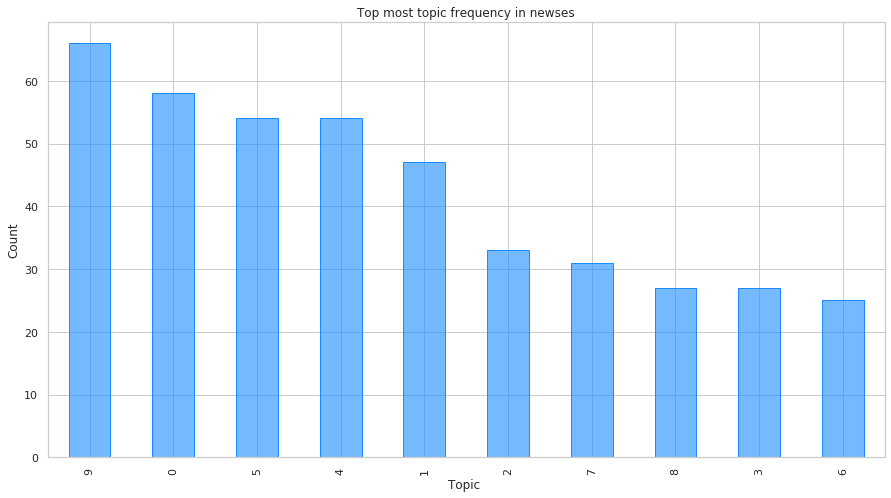

In [123]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    plt.title("Count of Real News Authors")
    ax1 = document_topic.idxmax(axis=1).value_counts().plot.bar(color=color_pf_9,edgecolor = color_pf)
    ax1.set_xlabel("Topic ")
    ax1.set_ylabel("Count")
    ax1.set_title("Top most topic frequency in newses")

In [473]:
document_topic.idxmax(axis=1)

0      9
1      1
2      9
3      7
4      3
      ..
417    4
418    0
419    8
420    5
421    3
Length: 422, dtype: int64

In [124]:
## topic vs words
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [477]:
[_word for _word in _sent for _sent in df_news_txt["tokens_sentences"][0]]

NameError: name '_sent' is not defined

In [125]:
def count_at(inp_str):
    count_ins = 0
    for _wrd in inp_str.split(" "):
        if(("@" in _wrd) & ("." not in _wrd)):
            #print(_wrd)
            #count_ins.append(_wrd)
            count_ins += 1
    return count_ins

df_news_txt["count_at"] = df_all_news["text"].apply(count_at).value_counts()                

In [126]:
df_news_txt[(df_news_txt["news_type"] == "fake") & \
                            (df_news_txt["plt"] == "pf")].replace(np.NaN, 0)["count_at"]

182    0.0
183    0.0
184    0.0
185    0.0
186    0.0
      ... 
297    0.0
298    0.0
299    0.0
300    0.0
301    0.0
Name: count_at, Length: 120, dtype: float64

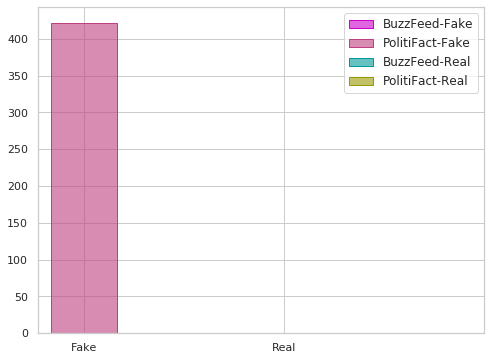

In [127]:
with sns.axes_style("whitegrid"):    
    fig, ax = plt.subplots(1,1, sharex=True, figsize=(8,6))

    _p1 = ax.bar(np.arange(0,1), df_news_txt[(df_news_txt["news_type"] == "fake") & \
                            (df_news_txt["plt"] == "pf")]["count_at"].sum(), width, color=color_bf_fk_9, edgecolor = color_bf_fk)
    _p2 = ax.bar(np.arange(0,1), df_news_txt[(df_news_txt["news_type"] == "fake") & \
                            (df_news_txt["plt"] == "bf")]["count_at"].sum(), width, bottom=df_news_txt[(df_news_txt["news_type"] == "fake") & \
                            (df_news_txt["plt"] == "pf")]["count_at"].sum(), color=color_pf_fk_9, edgecolor = color_pf_fk)

    
    _p3 = ax.bar(np.arange(1,2), df_news_txt[(df_news_txt["news_type"] == "real") & \
                            (df_news_txt["plt"] == "pf")]["count_at"].sum(), width, color=color_bf_real_9, edgecolor = color_bf_real)
    _p4 = ax.bar(np.arange(1,2), df_news_txt[(df_news_txt["news_type"] == "real") & \
                            (df_news_txt["plt"] == "bf")]["count_at"].sum(), width, bottom=df_news_txt[(df_news_txt["news_type"] == "real") & \
                            (df_news_txt["plt"] == "pf")]["count_at"].sum(), color=color_pf_real_9, edgecolor = color_pf_real)
    
    xticks(-0.0+np.arange(3), ["Fake", "Real"], rotation=0)
    #yticks(np.arange(0,12,1))

    ax.legend([_p1, _p2, _p3, _p4], ["BuzzFeed-Fake", "PolitiFact-Fake", "BuzzFeed-Real", "PolitiFact-Real"], loc='upper right', prop={'size':12})

In [128]:
df_news_txt

news_alph_id                                               text  \
0      BuzzFeed_Fake_28  A Daisy of a Rerun\n\nI am of an age which inc...   
1      BuzzFeed_Fake_17  I can’t wait for “Weekend at Chelsea’s” to hit...   
2      BuzzFeed_Fake_45  131.1k SHARES Facebook Twitter\n\nWell tell us...   
3      BuzzFeed_Fake_41  0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
4      BuzzFeed_Fake_46  4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
..                  ...                                                ...   
417  PolitiFact_Real_39  Never has the “rights for me, but not for thee...   
418  PolitiFact_Real_20  Gov. Chris Christie greets residents at a gath...   
419  PolitiFact_Real_99  Donald Trump Jr., a son of the Republican pres...   
420  PolitiFact_Real_30  As Donald Trump courted African-American voter...   
421  PolitiFact_Real_57  McCain Criticized Trump for Arpaio’s Pardon… S...   

    plt news_type                                          sentences  \
0    bf      fake  [A Daisy of a Rerun\n\nI am of an age which in...   
1    bf      fake  [I can’t wait for “Weekend at Chelsea’s” to hi...   
2    bf      fake  [131.1k SHARES Facebook Twitter\n\nWell tell u...   
3    bf      fake  [0 SHARES Facebook Twitter\n\nBernard Sansaric...   
4    bf      fake  [4.3k SHARES Facebook Twitter\n\nCharlotte rio...   
..   ..       ...                                                ...   
417  pf      real  [Never has the “rights for me, but not for the...   
418  pf      real  [Gov., Chris Christie greets residents at a ga...   
419  pf      real  [Donald Trump Jr., a son of the Republican pre...   
420  pf      real  [As Donald Trump courted African-American vote...   
421  pf      real  [McCain Criticized Trump for Arpaio’s Pardon… ...   

                                      tokens_sentences  \
0    [[A, Daisy, of, a, Rerun, I, am, of, an, age, ...   
1    [[I, can, ’, t, wait, for, “, Weekend, at, Che...   
2    [[131.1k, SHARES, Facebook, Twitter, Well, tel...   
3    [[0, SHARES, Facebook, Twitter, Bernard, Sansa...   
4    [[4.3k, SHARES, Facebook, Twitter, Charlotte, ...   
..                                                 ...   
417  [[Never, has, the, “, rights, for, me, ,, but,...   
418  [[Gov, .], [Chris, Christie, greets, residents...   
419  [[Donald, Trump, Jr., ,, a, son, of, the, Repu...   
420  [[As, Donald, Trump, courted, African-American...   
421  [[McCain, Criticized, Trump, for, Arpaio, ’, s...   

                                            POS_tokens  \
0    [[(A, DT), (Daisy, NNP), (of, IN), (a, DT), (R...   
1    [[(I, PRP), (can, MD), (’, VB), (t, JJ), (wait...   
2    [[(131.1k, CD), (SHARES, NNP), (Facebook, NNP)...   
3    [[(0, CD), (SHARES, NNP), (Facebook, NNP), (Tw...   
4    [[(4.3k, CD), (SHARES, NNP), (Facebook, NNP), ...   
..                                                 ...   
417  [[(Never, RB), (has, VBZ), (the, DT), (“, NNP)...   
418  [[(Gov, NNP), (., .)], [(Chris, NNP), (Christi...   
419  [[(Donald, NNP), (Trump, NNP), (Jr., NNP), (,,...   
420  [[(As, IN), (Donald, NNP), (Trump, NNP), (cour...   
421  [[(McCain, NNP), (Criticized, NNP), (Trump, NN...   

                           tokens_sentences_lemmatized  \
0    [[A, Daisy, of, a, Rerun, I, be, of, an, age, ...   
1    [[I, can, ’, t, wait, for, “, Weekend, at, Che...   
2    [[131.1k, SHARES, Facebook, Twitter, Well, tel...   
3    [[0, SHARES, Facebook, Twitter, Bernard, Sansa...   
4    [[4.3k, SHARES, Facebook, Twitter, Charlotte, ...   
..                                                 ...   
417  [[Never, have, the, “, right, for, me, ,, but,...   
418  [[Gov, .], [Chris, Christie, greet, resident, ...   
419  [[Donald, Trump, Jr., ,, a, son, of, the, Repu...   
420  [[As, Donald, Trump, court, African-American, ...   
421  [[McCain, Criticized, Trump, for, Arpaio, ’, s...   

                                                tokens  count_at  
0    [daisy, rerun, age, include, probably, first, 

In [129]:



def text_emotion(df, column):
    '''
    Takes a DataFrame and a specified column of text and adds 10 columns to the
    DataFrame for each of the 10 emotions in the NRC Emotion Lexicon, with each
    column containing the value of the text in that emotions
    INPUT: DataFrame, string
    OUTPUT: the original DataFrame with ten new columns
    '''

    new_df = df.copy()

    filepath = ("/home/qudratealahyratu/BSU_COURSE/social_mining/HW3/fake_new_detection/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt")
    emolex_df = pd.read_csv(filepath, names=["word", "emotion", "association"],sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)

    stemmer = SnowballStemmer("english")

   
    #with tqdm(total=len(list(new_df.iterrows()))) as pbar:
    for i, row in tqdm_notebook(new_df.iterrows(), total= new_df.shape[0]):
        document = new_df.loc[i][column]
        #print(document)
        for word in tqdm_notebook(document):
            word = stemmer.stem(word.lower())
            emo_score = emolex_words[emolex_words.word == word]
            if not emo_score.empty:
                for emotion in list(emotions):
                    emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

In [130]:
df_emotion = text_emotion(df_news_txt, "tokens")

In [131]:
df_emotion

news_alph_id                                               text  \
0      BuzzFeed_Fake_28  A Daisy of a Rerun\n\nI am of an age which inc...   
1      BuzzFeed_Fake_17  I can’t wait for “Weekend at Chelsea’s” to hit...   
2      BuzzFeed_Fake_45  131.1k SHARES Facebook Twitter\n\nWell tell us...   
3      BuzzFeed_Fake_41  0 SHARES Facebook Twitter\n\nBernard Sansaricq...   
4      BuzzFeed_Fake_46  4.3k SHARES Facebook Twitter\n\nCharlotte riot...   
..                  ...                                                ...   
417  PolitiFact_Real_39  Never has the “rights for me, but not for thee...   
418  PolitiFact_Real_20  Gov. Chris Christie greets residents at a gath...   
419  PolitiFact_Real_99  Donald Trump Jr., a son of the Republican pres...   
420  PolitiFact_Real_30  As Donald Trump courted African-American voter...   
421  PolitiFact_Real_57  McCain Criticized Trump for Arpaio’s Pardon… S...   

    plt news_type                                          sentences  \
0    bf      fake  [A Daisy of a Rerun\n\nI am of an age which in...   
1    bf      fake  [I can’t wait for “Weekend at Chelsea’s” to hi...   
2    bf      fake  [131.1k SHARES Facebook Twitter\n\nWell tell u...   
3    bf      fake  [0 SHARES Facebook Twitter\n\nBernard Sansaric...   
4    bf      fake  [4.3k SHARES Facebook Twitter\n\nCharlotte rio...   
..   ..       ...                                                ...   
417  pf      real  [Never has the “rights for me, but not for the...   
418  pf      real  [Gov., Chris Christie greets residents at a ga...   
419  pf      real  [Donald Trump Jr., a son of the Republican pre...   
420  pf      real  [As Donald Trump courted African-American vote...   
421  pf      real  [McCain Criticized Trump for Arpaio’s Pardon… ...   

                                      tokens_sentences  \
0    [[A, Daisy, of, a, Rerun, I, am, of, an, age, ...   
1    [[I, can, ’, t, wait, for, “, Weekend, at, Che...   
2    [[131.1k, SHARES, Facebook, Twitter, Well, tel...   
3    [[0, SHARES, Facebook, Twitter, Bernard, Sansa...   
4    [[4.3k, SHARES, Facebook, Twitter, Charlotte, ...   
..                                                 ...   
417  [[Never, has, the, “, rights, for, me, ,, but,...   
418  [[Gov, .], [Chris, Christie, greets, residents...   
419  [[Donald, Trump, Jr., ,, a, son, of, the, Repu...   
420  [[As, Donald, Trump, courted, African-American...   
421  [[McCain, Criticized, Trump, for, Arpaio, ’, s...   

                                            POS_tokens  \
0    [[(A, DT), (Daisy, NNP), (of, IN), (a, DT), (R...   
1    [[(I, PRP), (can, MD), (’, VB), (t, JJ), (wait...   
2    [[(131.1k, CD), (SHARES, NNP), (Facebook, NNP)...   
3    [[(0, CD), (SHARES, NNP), (Facebook, NNP), (Tw...   
4    [[(4.3k, CD), (SHARES, NNP), (Facebook, NNP), ...   
..                                                 ...   
417  [[(Never, RB), (has, VBZ), (the, DT), (“, NNP)...   
418  [[(Gov, NNP), (., .)], [(Chris, NNP), (Christi...   
419  [[(Donald, NNP), (Trump, NNP), (Jr., NNP), (,,...   
420  [[(As, IN), (Donald, NNP), (Trump, NNP), (cour...   
421  [[(McCain, NNP), (Criticized, NNP), (Trump, NN...   

                           tokens_sentences_lemmatized  \
0    [[A, Daisy, of, a, Rerun, I, be, of, an, age, ...   
1    [[I, can, ’, t, wait, for, “, Weekend, at, Che...   
2    [[131.1k, SHARES, Facebook, Twitter, Well, tel...   
3    [[0, SHARES, Facebook, Twitter, Bernard, Sansa...   
4    [[4.3k, SHARES, Facebook, Twitter, Charlotte, ...   
..                                                 ...   
417  [[Never, have, the, “, right, for, me, ,, but,...   
418  [[Gov, .], [Chris, Christie, greet, resident, ...   
419  [[Donald, Trump, Jr., ,, a, son, of, the, Repu...   
420  [[As, Donald, Trump, court, African-American, ...   
421  [[McCain, Criticized, Trump, for, Arpaio, ’, s...   

                                                tokens  count_at  anger  \
0    [daisy, rerun, age, include, probably,

In [132]:
def count_tkn(token):
    return len(token)
df_emotion["count_token"] =  df_emotion["tokens"].apply(count_tkn)

In [133]:
for _col in ['anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']:
    df_emotion[_col] = df_emotion[_col] / df_emotion["count_token"]

In [134]:
df_emotion[df_emotion[['news_alph_id', 'anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']].isnull().any(axis=1)]

news_alph_id text plt news_type sentences tokens_sentences  \
238  PolitiFact_Fake_24       pf      fake        []               []   
292  PolitiFact_Fake_47       pf      fake        []               []   

    POS_tokens tokens_sentences_lemmatized tokens  count_at  ...  \
238         []                          []     []       NaN  ...   
292         []                          []     []       NaN  ...   

     anticipation  disgust  fear  joy  negative  positive  sadness  surprise  \
238           NaN      NaN   NaN  NaN       NaN       NaN      NaN       NaN   
292           NaN      NaN   NaN  NaN       NaN       NaN      NaN       NaN   

     trust  count_token  
238    NaN            0  
292    NaN            0  

[2 rows x 21 columns]

In [135]:
df_all_news["text"][292]

''

In [136]:
df_emotion[['news_alph_id', 'count_at', 'anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']].to_csv("emotion.csv", index=False)

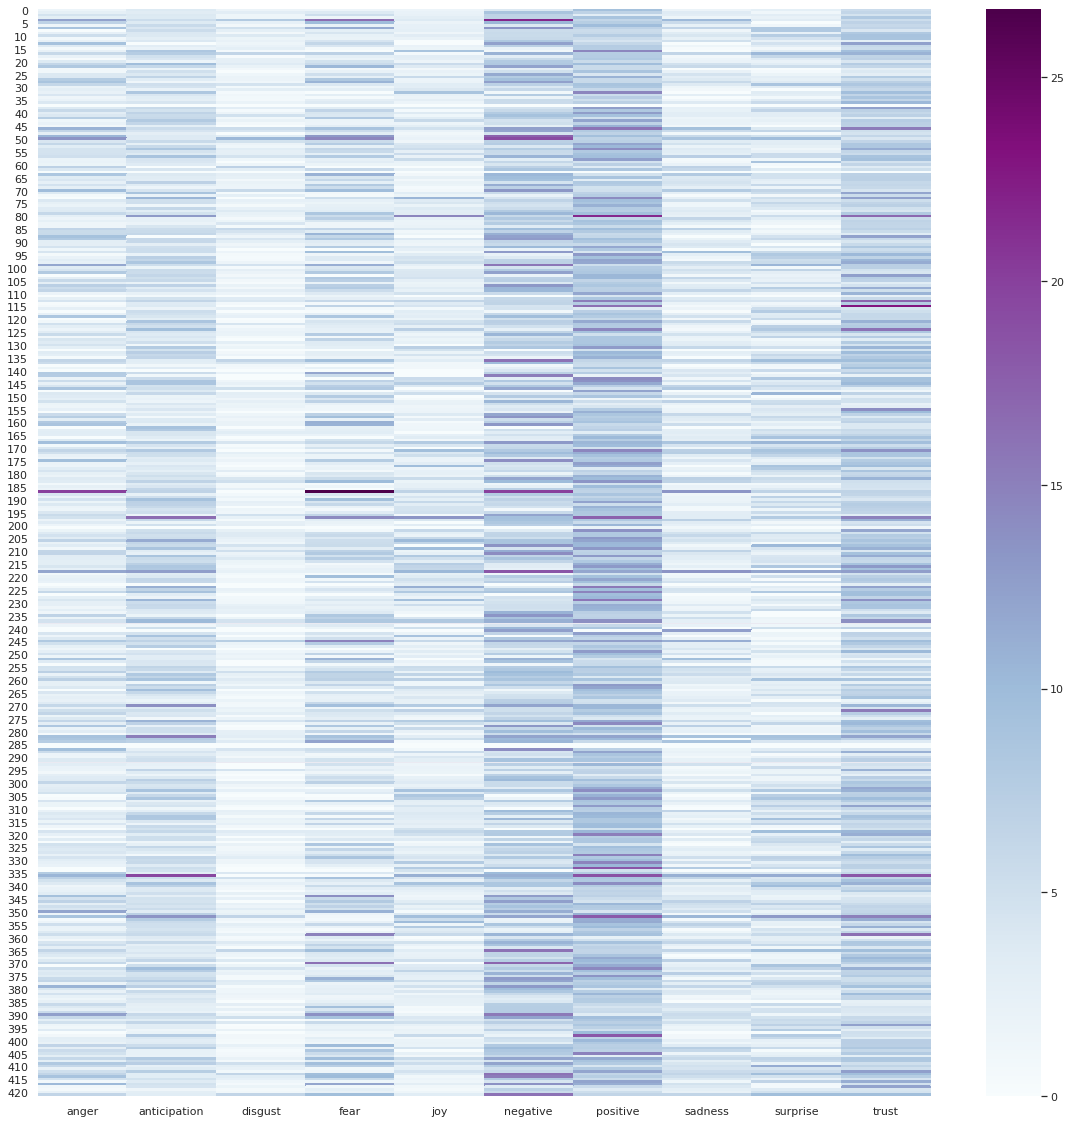

In [137]:
sns.heatmap(df_emotion[['anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust']]*100, cmap="BuPu")

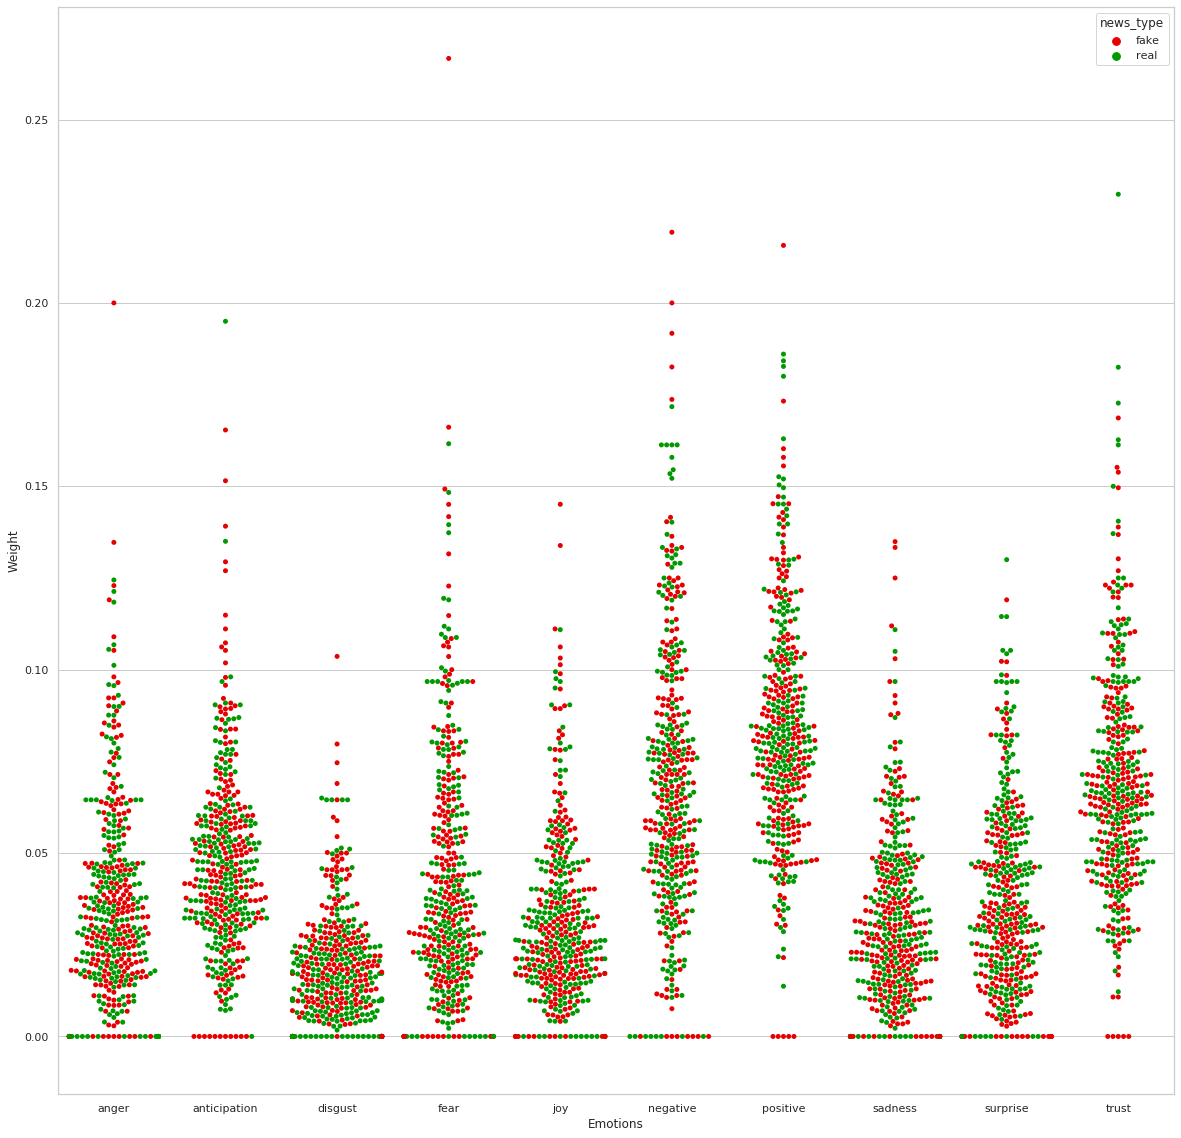

In [187]:
with sns.axes_style("whitegrid"):  
    sns.swarmplot(data=df_emotion[['news_alph_id','anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust', 'news_type']]\
                  .melt(['news_alph_id', 'news_type'], var_name='Emotions',  value_name='Weight'), 
                  x = "Emotions", y="Weight", hue = "news_type", palette = sns.color_palette([color_fk_4, color_real_4]))

In [147]:
df_emotion.columns

Index(['news_alph_id', 'text', 'plt', 'news_type', 'sentences',
       'tokens_sentences', 'POS_tokens', 'tokens_sentences_lemmatized',
       'tokens', 'count_at', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'negative', 'positive', 'sadness', 'surprise', 'trust', 'count_token'],
      dtype='object')

In [149]:
df_emotion[['news_alph_id','anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust', 'news_type']].melt('news_alph_id', var_name='cols',  value_name='vals')

news_alph_id   cols      vals
0       BuzzFeed_Fake_28  anger  0.016279
1       BuzzFeed_Fake_17  anger  0.026531
2       BuzzFeed_Fake_45  anger  0.045455
3       BuzzFeed_Fake_41  anger  0.029851
4       BuzzFeed_Fake_46  anger  0.122924
...                  ...    ...       ...
4215  PolitiFact_Real_39  trust  0.047619
4216  PolitiFact_Real_20  trust  0.122222
4217  PolitiFact_Real_99  trust  0.041958
4218  PolitiFact_Real_30  trust  0.045113
4219  PolitiFact_Real_57  trust  0.096774

[4220 rows x 3 columns]

In [163]:
df_emotion[['news_alph_id','anger', 'anticipation', 'disgust', 'fear', 'joy','negative', 'positive', 'sadness', 'surprise', 'trust', 'news_type']]\
                  .melt(['news_alph_id', 'news_type'], var_name='Emotions',  value_name='Weight')

news_alph_id news_type Emotions    Weight
0       BuzzFeed_Fake_28      fake    anger  0.016279
1       BuzzFeed_Fake_17      fake    anger  0.026531
2       BuzzFeed_Fake_45      fake    anger  0.045455
3       BuzzFeed_Fake_41      fake    anger  0.029851
4       BuzzFeed_Fake_46      fake    anger  0.122924
...                  ...       ...      ...       ...
4215  PolitiFact_Real_39      real    trust  0.047619
4216  PolitiFact_Real_20      real    trust  0.122222
4217  PolitiFact_Real_99      real    trust  0.041958
4218  PolitiFact_Real_30      real    trust  0.045113
4219  PolitiFact_Real_57      real    trust  0.096774

[4220 rows x 4 columns]

### Meta

### Keyword

In [ ]:
def my_dag_prob(_url):
    #print(_url)
    if type(_url) == str:
        return get_prob(_url[:81])*100
    return np.NaN

In [ ]:
df_all_news_auth['url_source_conf'] = df_all_news_auth["source"].apply(my_dag_prob)

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    sns.displot(df_all_news_auth, x="url_source_conf", hue="news_type", kind="kde", fill=True, palette=["r", "g"])

In [ ]:
df_all_news_auth['url_top_img_conf'] = df_all_news_auth["top_img"].apply(my_dag_prob)

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    sns.displot(df_all_news_auth, x="url_top_img_conf", hue="news_type", kind="kde", fill=True, palette=["r", "g"])

In [ ]:
df_all_news_auth['url_canonical_link_conf'] = df_all_news_auth["canonical_link"].apply(my_dag_prob)

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    sns.displot(df_all_news_auth, x="url_canonical_link_conf", hue="news_type", kind="kde", fill=True, palette=["r", "g"])

In [ ]:
df_all_news_auth['url_conf'] = df_all_news_auth["url"].apply(my_dag_prob)

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    sns.displot(df_all_news_auth, x="url_conf", hue="news_type", kind="kde", fill=True, palette=["r", "g"])

### Word Cloud

In [ ]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 )
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:



text = df_all_news[df_all_news["news_type"] == "fake"].values


wordcloud = WordCloud(background_color="white", width=1600, height=800, color_func=random_color_func).generate(np.array_str(text.flatten()))


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear', alpha = 0.7)
plt.axis("off")
plt.show()

In [ ]:
## Real
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(100.0 )
    s = int(100.0)
    l = int(70.0 * float(random_state.randint(30, 100)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [ ]:


text = df_all_news[df_all_news["news_type"] == "real"].values


wordcloud = WordCloud(background_color="white", width=1600, height=800, color_func=random_color_func).generate(np.array_str(text.flatten()))


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear', alpha = 0.7)
plt.axis("off")
plt.show()

# Vectorization

## Author

In [203]:
df_all_news_auth["authors"].value_counts()

**NoName             163
Jack Shafer           65
Abc News              18
Brett Bose            16
Natalie Dickinson     16
                    ... 
Emily Shapiro          1
Fishertown Pa          1
Ashley Killough        1
Dale Summitt           1
Red Dawn               1
Name: authors, Length: 244, dtype: int64

In [214]:
df_all_news_auth_melt = df_all_news.explode("authors")

In [215]:
df_all_news_auth_melt["author"] = df_all_news_auth_melt["authors"].replace("View All Posts", "").fillna("")
#df_all_news_auth_melt.dropna(inplace = True)
#df_all_news_auth_melt.reset_index(drop=True, inplace = True)

In [216]:
## Debug
print(df_all_news_auth_melt["author"].value_counts())
print(len(set(df_all_news_auth_melt["news_alph_id"].values)))

                     163
Jack Shafer           65
Abc News              18
Brett Bose            16
Natalie Dickinson     16
                    ... 
More Stephanie         1
Betsy Klein            1
Mason Adams            1
More Ryan              1
Max Jackson            1
Name: author, Length: 244, dtype: int64
422


In [217]:
df_all_news_auth_melt

news_alph_id                                            top_img  \
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
2      BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
..                  ...                                                ...   
418  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
419  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
421  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text         authors  \
0    A Daisy of a Rerun\n\nI am of an age which inc...  View All Posts   
0    A Daisy of a Rerun\n\nI am of an age which inc...      Jim Bowman   
1    I can’t wait for “Weekend at Chelsea’s” to hit...  View All Posts   
1    I can’t wait for “Weekend at Chelsea’s” to hit...     Matt Barber   
2    131.1k SHARES Facebook Twitter\n\nWell tell us...             NaN   
..                                                 ...             ...   
418  Gov. Chris Christie greets residents at a gath...   Matt Friedman   
419  Donald Trump Jr., a son of the Republican pres...        Abc News   
420  As Donald Trump courted African-American voter...    More Candace   
420  As Donald Trump courted African-American voter...        Abc News   
421  McCain Criticized Trump for Arpaio’s Pardon… S...             NaN   

    keywords                                          meta_data  \
0         []  {'description': 'Obama stated of Hillary, “She...   
0         []  {'description': 'Obama stated of Hillary, “She...   
1         []  {'description': 'Am I saying there’s no chance...   
1         []  {'description': 'Am I saying there’s no chance...   
2         []  {'googlebot': 'noimageindex', 'generator': 'Po...   
..       ...                                                ...   
418       []  {'description': '<p>Gov. Chris Christie has th...   
419       []  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
421       []  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://eaglerising.com/37040/michelle-obama-at...   
0    http://eaglerising.com/37040/michelle-obama-at...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
2    http://freedomdaily.com/female-muslim-american...   
..                                                 ...   
418  http://www.politico.com/states/new-jersey/stor...   
419  http://abcnews.go.com/Politics/donald-trump-jr...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
421                                                      

                                                images  \
0    [http://constitution.com/wp-content/uploads/20...   
0    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
2    [https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...   
..                                                 ...   
418  [https://static.politico.com/dims4/default/d09...   
419  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
421  [http://static.westernjournalism.com/wp-

In [218]:
df_all_news_auth_melt["auth_name_len"] = df_all_news_auth_melt["author"].apply(len)

In [219]:
def get_ner(inp_str):
    auth_name = nlp(inp_str)
    for x in auth_name.ents:
        return x.label_
        

In [220]:
df_all_news_auth_melt["auth_ner"] = df_all_news_auth_melt["author"].apply(get_ner)

In [221]:
df_all_news_auth_melt

news_alph_id                                            top_img  \
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
0      BuzzFeed_Fake_28  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
1      BuzzFeed_Fake_17  http://eaglerising.com/wp-content/uploads/2016...   
2      BuzzFeed_Fake_45  http://freedomdaily.com/wp-content/uploads/201...   
..                  ...                                                ...   
418  PolitiFact_Real_20  http://static.politico.com/c6/cd/2a88f055435fa...   
419  PolitiFact_Real_99  http://a.abcnews.com/images/Politics/AP_donald...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
420  PolitiFact_Real_30  http://a.abcnews.com/images/Politics/RT_Trump_...   
421  PolitiFact_Real_57  http://conservativetribune.com/wp-content/uplo...   

                                                  text         authors  \
0    A Daisy of a Rerun\n\nI am of an age which inc...  View All Posts   
0    A Daisy of a Rerun\n\nI am of an age which inc...      Jim Bowman   
1    I can’t wait for “Weekend at Chelsea’s” to hit...  View All Posts   
1    I can’t wait for “Weekend at Chelsea’s” to hit...     Matt Barber   
2    131.1k SHARES Facebook Twitter\n\nWell tell us...             NaN   
..                                                 ...             ...   
418  Gov. Chris Christie greets residents at a gath...   Matt Friedman   
419  Donald Trump Jr., a son of the Republican pres...        Abc News   
420  As Donald Trump courted African-American voter...    More Candace   
420  As Donald Trump courted African-American voter...        Abc News   
421  McCain Criticized Trump for Arpaio’s Pardon… S...             NaN   

    keywords                                          meta_data  \
0         []  {'description': 'Obama stated of Hillary, “She...   
0         []  {'description': 'Obama stated of Hillary, “She...   
1         []  {'description': 'Am I saying there’s no chance...   
1         []  {'description': 'Am I saying there’s no chance...   
2         []  {'googlebot': 'noimageindex', 'generator': 'Po...   
..       ...                                                ...   
418       []  {'description': '<p>Gov. Chris Christie has th...   
419       []  {'fb_title': 'Trump Jr. Compares Syrian Refuge...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
420       []  {'fb_title': 'Trump Calls for Nationwide Stop-...   
421       []  {'viewport': 'width=device-width, initial-scal...   

                                        canonical_link  \
0    http://eaglerising.com/37040/michelle-obama-at...   
0    http://eaglerising.com/37040/michelle-obama-at...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
1    http://eaglerising.com/36912/is-it-the-beginni...   
2    http://freedomdaily.com/female-muslim-american...   
..                                                 ...   
418  http://www.politico.com/states/new-jersey/stor...   
419  http://abcnews.go.com/Politics/donald-trump-jr...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
420  http://abcnews.go.com/Politics/donald-trump-ca...   
421                                                      

                                                images  \
0    [http://constitution.com/wp-content/uploads/20...   
0    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
1    [http://constitution.com/wp-content/uploads/20...   
2    [https://pbs.twimg.com/media/CpYwwqIUIAMtCLQ.j...   
..                                                 ...   
418  [https://static.politico.com/dims4/default/d09...   
419  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
420  [http://www.googleadservices.com/pagead/conver...   
421  [http://static.westernjournalism.com/wp-

## Keywords

In [222]:
df_all_news["keywords"].values

array([list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), nan, list([]), list([]), list([]), nan, list([]),
       list([]), list([]), list([]), nan, list([]), list([]), list([]),
       list([]), list([]), nan, list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), nan, list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), nan, list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), nan, nan, list([]),
       list([]), list([]), list([]), list(

>  🖊️  Nothing there! Just need to drop it from the original dataset

## Images

In [ ]:
df_all_news["images"]

In [ ]:

_id_vars = ["news_alph_id"]


df_all_news_img_melt = df_all_news[["news_alph_id", "images"]]["images"].apply(pd.Series)\
    .merge(df_all_news[["news_alph_id", "images"]], left_index = True, right_index = True) \
    .drop(["images"], axis = 1) \
    .melt(id_vars = _id_vars, value_name = "image") \
    .drop("variable", axis = 1)\
    


In [ ]:
df_all_news_img_melt.dropna(inplace = True)
df_all_news_img_melt.reset_index(drop=True, inplace = True)

df_allnews

In [ ]:
df_all_news_img_melt.set_index('news_alph_id')

In [ ]:
df_all_news_img_melt[["image"]].isna().sum()

In [ ]:
df_vec = pd.merge(df_all_news_img_melt, df_all_news_auth_melt, on='news_alph_id', how='outer')

In [ ]:
df_vec.columns

In [ ]:
df_vec[["image", 'author', 'auth_name_len', 'auth_ner']].isna().sum()

append links

top image

In [ ]:
df_all_news.columns

In [ ]:
df_vec = pd.merge(df_vec, df_all_news[["news_alph_id", "top_img", "canonical_link", "url", "source"]], on='news_alph_id', how='outer')

In [ ]:
df_vec

In [ ]:
df_all_news[df_all_news["news_alph_id"] == "PolitiFact_Real_49"]

## Links

In [413]:
df_vec = df_all_news.copy()

In [414]:
df_vec['source_sub_domain'],  df_vec['source_domain'], df_vec['source_suffix'] = zip(*df_vec["source"].apply(my_tldextract_extract))

In [415]:
df_vec['url_sub_domain'],  df_vec['url_domain'], df_vec['url_suffix'] = zip(*df_vec["url"].apply(my_tldextract_extract))

In [416]:
df_vec['can_link_sub_domain'],  df_vec['can_link_domain'], df_vec['can_link_suffix'] = zip(*df_vec["canonical_link"].apply(my_tldextract_extract))

In [417]:
df_vec['top_img_sub_domain'],  df_vec['top_img_domain'], df_vec['top_img_suffix'] = zip(*df_vec["top_img"].apply(my_tldextract_extract))

In [418]:
df_vec[['source_suffix', 'url_suffix', 'can_link_suffix', 'top_img_suffix']]

source_suffix url_suffix can_link_suffix top_img_suffix
0             com        com             com            com
1             com        com             com            com
2             com        com             com            com
3             com        com             com            com
4             com        com             com            com
..            ...        ...             ...            ...
417           com        com             com            com
418            co         co             com            com
419            ws         ws             com            com
420            ws         ws             com            com
421           com        com                            com

[422 rows x 4 columns]

In [419]:
df_vec["source_reg_url"] = df_vec["source_domain"] + "." +df_vec["source_suffix"]

In [420]:
df_vec["url_reg_url"] = df_vec["url_domain"]  + "." + df_vec["url_suffix"]

In [421]:
df_vec["can_link_reg_url"] = df_vec["can_link_domain"]  + "." + df_vec["can_link_suffix"]

In [422]:
df_vec["top_img_reg_url"] = df_vec["top_img_domain"]  + "." + df_vec["top_img_suffix"]

In [423]:
df_vec[['news_id_real','source_reg_url', 'url_reg_url', 'can_link_reg_url', 'top_img_reg_url', "news_type", "plt"]]

news_id_real        source_reg_url           url_reg_url  \
0     BuzzFeed_Fake_119       eaglerising.com       eaglerising.com   
1     BuzzFeed_Fake_108       eaglerising.com       eaglerising.com   
2     BuzzFeed_Fake_136      freedomdaily.com      freedomdaily.com   
3     BuzzFeed_Fake_132      freedomdaily.com      freedomdaily.com   
4     BuzzFeed_Fake_137      freedomdaily.com      freedomdaily.com   
..                  ...                   ...                   ...   
417  PolitiFact_Real_39       eaglerising.com       eaglerising.com   
418  PolitiFact_Real_20             politi.co             politi.co   
419  PolitiFact_Real_99               abcn.ws               abcn.ws   
420  PolitiFact_Real_30               abcn.ws               abcn.ws   
421  PolitiFact_Real_57  conservativebyte.com  conservativebyte.com   

     can_link_reg_url          top_img_reg_url news_type plt  
0     eaglerising.com          eaglerising.com      fake  bf  
1     eaglerising.com          eaglerising.com      fake  bf  
2    freedomdaily.com         freedomdaily.com      fake  bf  
3    freedomdaily.com         freedomdaily.com      fake  bf  
4    freedomdaily.com         freedomdaily.com      fake  bf  
..                ...                      ...       ...  ..  
417   eaglerising.com          eaglerising.com      real  pf  
418      politico.com             politico.com      real  pf  
419            go.com              abcnews.com      real  pf  
420            go.com              abcnews.com      real  pf  
421                 .  conservativetribune.com      real  pf  

[422 rows x 7 columns]

In [424]:
df_lbl_enc_reg_link = df_vec[['news_id_real','source_reg_url', 'url_reg_url', 'can_link_reg_url', 'top_img_reg_url', "news_type", "plt"]]

In [425]:
df_lbl_enc_reg_link = df_lbl_enc_reg_link.sort_values('news_type')

In [426]:
le_reg_link = LabelEncoder()

In [427]:
df_lbl_enc_reg_link[['source_reg_url', 'url_reg_url', 'can_link_reg_url', 'top_img_reg_url']] = df_vec[['source_reg_url', 'url_reg_url', 'can_link_reg_url', 'top_img_reg_url']].apply(le_reg_link.fit_transform)

In [428]:
df_lbl_enc_reg_link

news_id_real  source_reg_url  url_reg_url  can_link_reg_url  \
0      BuzzFeed_Fake_119              26           26                20   
215  PolitiFact_Fake_129              58           58                53   
216  PolitiFact_Fake_130              87           87                82   
217  PolitiFact_Fake_121              53           53                46   
218  PolitiFact_Fake_123              22           22                17   
..                   ...             ...          ...               ...   
106     BuzzFeed_Real_55              56           56                51   
105     BuzzFeed_Real_48              16           16                13   
104     BuzzFeed_Real_47              26           26                20   
102     BuzzFeed_Real_16               2            2                28   
421   PolitiFact_Real_57              20           20                 0   

     top_img_reg_url news_type plt  
0                 20      fake  bf  
215               50      fake  pf  
216               76      fake  pf  
217               44      fake  pf  
218               17      fake  pf  
..               ...       ...  ..  
106               48      real  bf  
105               14      real  bf  
104               20      real  bf  
102                2      real  bf  
421               16      real  pf  

[422 rows x 7 columns]

In [429]:
corr = df_lbl_enc_reg_link.corr()

In [430]:
corr

source_reg_url  url_reg_url  can_link_reg_url  \
source_reg_url          1.000000     1.000000          0.903051   
url_reg_url             1.000000     1.000000          0.903051   
can_link_reg_url        0.903051     0.903051          1.000000   
top_img_reg_url         0.793014     0.793014          0.823520   

                  top_img_reg_url  
source_reg_url           0.793014  
url_reg_url              0.793014  
can_link_reg_url         0.823520  
top_img_reg_url          1.000000

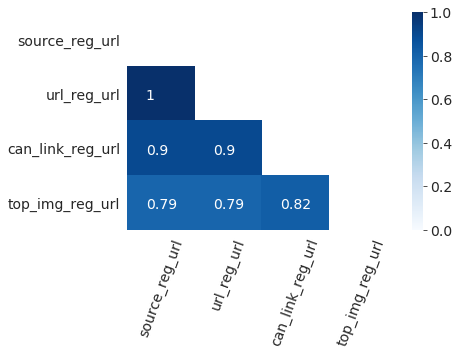

In [431]:
with sns.axes_style("whitegrid"):    
    akws = {"ha": "left","va": "top"}

    mask = np.zeros(corr.shape, dtype=bool)
    mask[np.triu_indices(len(mask))] = True

    ax = sns.heatmap(corr, annot=True, annot_kws=akws, mask = mask,vmin = 0, vmax = 1, cmap = "Blues")
    
    for p in ax.texts:
        myTrans = p.get_transform()
        offset = matplotlib.transforms.ScaledTranslation(-15, 5, matplotlib.transforms.IdentityTransform())
        p.set_transform(myTrans + offset)
    
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 70)
    #ax.invert_yaxis()
    plt.show()    

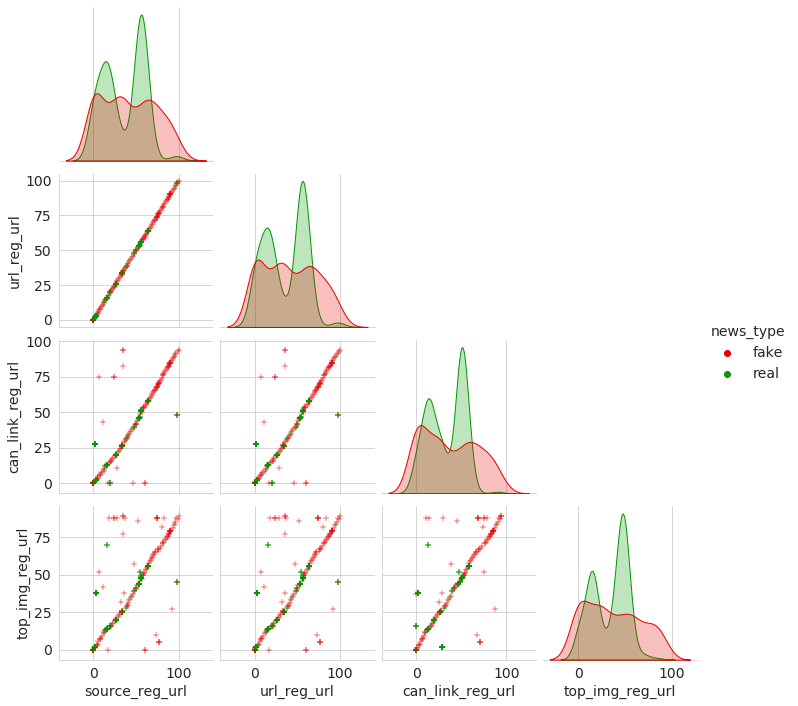

In [275]:
with sns.axes_style("whitegrid"):    
    #fig, ax1 = plt.subplots(1,1, sharex=True, figsize=(15,8))
    _p1 = sns.pairplot(data = df_lbl_enc_reg_link, hue = "news_type", 
                       palette = sns.color_palette([color_fk_4, color_real_4]), markers= "+",
                      corner = True)

considering features :  links
LR: 0.163123 (0.086920)
LDA: 0.163123 (0.086920)
KNN: 0.819712 (0.097947)
CART: 0.776855 (0.149875)
NB: 0.265282 (0.117875)
SVM: 0.647785 (0.114170)


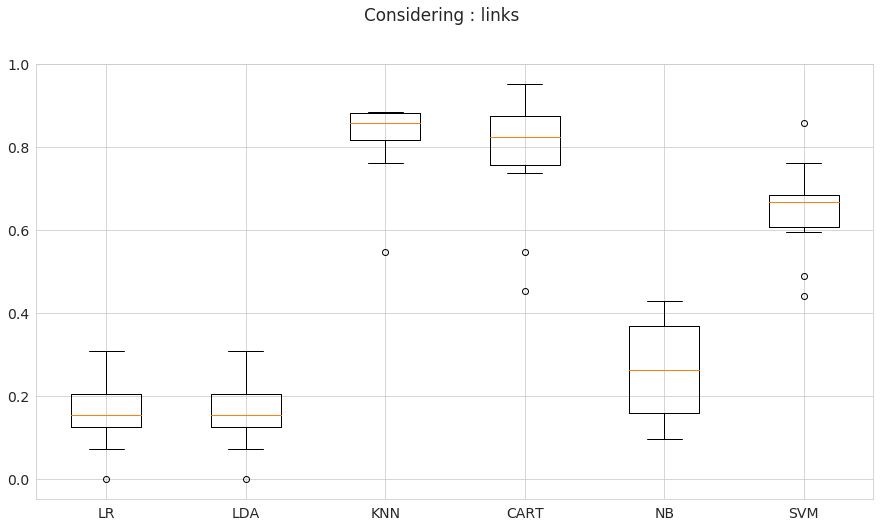

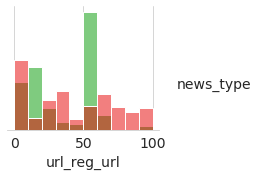

In [432]:
applyml(df_lbl_enc_reg_link[["url_reg_url"]], df_lbl_enc_reg_link[["news_type"]].apply(le_reg_link.fit_transform), "links")

In [433]:
df_lbl_enc_reg_link.to_csv("_f_url_labeled.csv", index = False)

In [ ]:
df_vec.columns

Drop original link columns

In [ ]:
df_vec.drop(columns=["image", "top_img", "canonical_link", "url", "source"], inplace = True)

In [ ]:
df_vec.columns

Missing values

In [ ]:
df_vec[['author', 'auth_name_len', 'auth_ner',
       'source_sub_domain', 'source_domain', 'source_suffix', 'url_sub_domain',
       'url_domain', 'urll_suffix', 'image_sub_domain', 'image_domain',
       'image_suffix', 'can_link_sub_domain', 'can_link_domain',
       'can_link_suffix', 'top_img_sub_domain', 'top_img_domain',
       'top_img_suffix']].isna().sum()

In [ ]:


msno.matrix(df_vec) 

Label encoding

author name

In [ ]:
df_vec['author'].fillna("").values

In [ ]:

lenc_auth_name = LabelEncoder()
lenc_auth_name.fit(df_vec[['author']].fillna("").stack().unique())

df_vec['author'] = lenc_auth_name.transform(df_vec[['author']].fillna(""))


In [ ]:
df_vec["auth_name_len"] = df_vec["auth_name_len"].fillna(0)

In [ ]:

lenc_auth_ner = LabelEncoder()
lenc_auth_ner.fit(df_vec[['auth_ner']].fillna("").stack().unique())

df_vec['auth_ner'] = lenc_auth_ner.transform(df_vec[['auth_ner']].fillna(""))

In [ ]:
df_vec.columns

In [ ]:


lenc_sfx = LabelEncoder()
lenc_sfx.fit(df_vec[["source_suffix", "urll_suffix", "image_suffix", "can_link_suffix", "top_img_suffix"]].fillna("").stack().unique())

df_vec["source_suffix"] = lenc_sfx.transform(df_vec["source_suffix"].fillna(""))
df_vec["urll_suffix"] = lenc_sfx.transform(df_vec["urll_suffix"].fillna(""))
df_vec["image_suffix"] = lenc_sfx.transform(df_vec["image_suffix"].fillna(""))
df_vec["can_link_suffix"] = lenc_sfx.transform(df_vec["can_link_suffix"].fillna(""))
df_vec["top_img_suffix"] = lenc_sfx.transform(df_vec["top_img_suffix"].fillna(""))

In [ ]:

lenc_dom = LabelEncoder()
lenc_dom.fit(df_vec[["source_domain", "url_domain", "image_domain", "can_link_domain", "top_img_domain"]].fillna("").stack().unique())


In [ ]:
df_vec["source_domain"] = lenc_dom.transform(df_vec["source_domain"].fillna(""))
df_vec["url_domain"] = lenc_dom.transform(df_vec["url_domain"].fillna(""))
df_vec["image_domain"] = lenc_dom.transform(df_vec["image_domain"].fillna(""))
df_vec["can_link_domain"] = lenc_dom.transform(df_vec["can_link_domain"].fillna(""))
df_vec["top_img_domain"] = lenc_dom.transform(df_vec["top_img_domain"].fillna(""))

In [ ]:

lenc_sub_dom = LabelEncoder()
lenc_sub_dom.fit(df_vec[["source_sub_domain", "url_sub_domain", "image_sub_domain", "can_link_sub_domain", "top_img_sub_domain"]].fillna("").stack().unique())


In [ ]:
df_vec["source_sub_domain"] = lenc_sub_dom.transform(df_vec["source_sub_domain"].fillna(""))
df_vec["url_sub_domain"] = lenc_sub_dom.transform(df_vec["url_sub_domain"].fillna(""))
df_vec["image_sub_domain"] = lenc_sub_dom.transform(df_vec["image_sub_domain"].fillna(""))
df_vec["can_link_sub_domain"] = lenc_sub_dom.transform(df_vec["can_link_sub_domain"].fillna(""))
df_vec["top_img_sub_domain"] = lenc_sub_dom.transform(df_vec["top_img_sub_domain"].fillna(""))

In [ ]:
df_vec.head()

In [ ]:
df_vec.to_csv("link_author.csv", index = False)

Save in csv

In [ ]:
df_vec.dropna(subset = ['auth_name_len', 'auth_ner',
       'top_img', 'canonical_link', 'url', 'source', 'source_sub_domain',
       'source_domain', 'source_suffix', 'url_sub_domain', 'url_domain',
       'urll_suffix', 'image_sub_domain', 'image_domain', 'image_suffix',
       'can_link_sub_domain', 'can_link_domain', 'can_link_suffix',
       'top_img_sub_domain', 'top_img_domain', 'top_img_suffix']).to_csv("link_author.csv", index = False)

In [ ]:
df_vec.columns

In [ ]:
pd.merge(df_vec, df_all_news[["news_alph_id", "news_type", "plt"]], on = "news_alph_id")

In [ ]:
df_vec_with_label = pd.merge(df_vec, df_all_news[["news_alph_id", "news_type", "plt"]], on = "news_alph_id")

In [ ]:
df_vec_with_label[df_vec_with_label["news_type"] == "real"].shape

In [ ]:
df_vec_with_label[(df_vec_with_label["news_type"] == "fake") & (df_vec_with_label["plt"] == "bf")].shape[0]
df_vec_with_label[(df_vec_with_label["news_type"] == "fake") & (df_vec_with_label["plt"] == "pf")].shape[0]

In [ ]:
(6768/(6768+4164)) * 100

In [ ]:
_len_fk_bf  = (df_vec_with_label[(df_vec_with_label["news_type"] == "fake") & 
                                 (df_vec_with_label["plt"] == "bf")].shape[0] / df_vec_with_label.shape[0]) * 100
_len_fk_pf  = (df_vec_with_label[(df_vec_with_label["news_type"] == "fake") & 
                                 (df_vec_with_label["plt"] == "pf")].shape[0] / df_vec_with_label.shape[0]) * 100
_len_real_bf  = (df_vec_with_label[(df_vec_with_label["news_type"] == "real") & 
                                   (df_vec_with_label["plt"] == "bf")].shape[0] / df_vec_with_label.shape[0]) * 100
_len_real_pf  = (df_vec_with_label[(df_vec_with_label["news_type"] == "real") & 
                                   (df_vec_with_label["plt"] == "pf")].shape[0] / df_vec_with_label.shape[0]) * 100


chart = ctc.Pie("% Real vs Fake Data")
chart.set_options(
 labels= ["1", "2","3", "4"], 
    colors = [color_bf_fk_4, ]
 )
chart.add_series([_len_fk_bf, _len_fk_pf, _len_real_bf, _len_real_pf]) 
chart.render_notebook()

In [ ]:
df_vec_with_label

#### Treatment for NaN value

# Machine Learning

## ML

In [133]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [350]:
def applyml(X, Y, feature_considered):
    print("considering features : " , feature_considered)
    seed = 7
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    
    with sns.axes_style("whitegrid"):
        fig = plt.figure(figsize=(15,8))
        fig.suptitle('Considering : '+ feature_considered)
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()
    
    check_pairplot(pd.merge(X, Y, left_index=True, right_index=True))

In [351]:
def check_pairplot(df_all):
    with sns.axes_style("whitegrid"):
        sns.pairplot(df_all, hue = "news_type", diag_kind="hist", palette = sns.color_palette([color_fk_4, color_real_4]), markers= "+",
                      corner = True)

## Create graph

### BuzzFeed

#### User User

In [ ]:
df_bf_user_user.columns

In [ ]:
g_b_user_user = nx.from_pandas_edgelist(df_bf_user_user,source='follower_num_id',
                                   target='user_num_id',edge_attr=None,
                                   create_using=nx.DiGraph())

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_b_user_user))
print("# of edges = ", nx.number_of_edges(g_b_user_user))

In [ ]:

pos = nx.spring_layout(g_b_user_user)

# larger figure size
plt.figure(3,figsize=(20,20)) 
nx.draw(g_b_user_user,pos)
plt.show()


#### User News

In [ ]:
df_bf_news_user

In [ ]:
g_bi_user_news_bf = nx.Graph()
g_bi_user_news_bf.add_nodes_from(df_bf_news_user['user_num_id'], bipartite=0)
g_bi_user_news_bf.add_nodes_from(df_bf_news_user['news_num_id'], bipartite=1)
g_bi_user_news_bf.add_weighted_edges_from(
    [(row['news_num_id'], row['user_num_id'], 1) for idx, row in df_bf_news_user.iterrows()], 
    weight='weight')

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_bi_user_news_bf))
print("# of edges = ", nx.number_of_edges(g_bi_user_news_bf))

### Politifact

In [ ]:
df_poli_user_user

In [ ]:
g_p_user_user = nx.from_pandas_edgelist(df_poli_user_user,source='follower_num_id',
                                   target='user_num_id',edge_attr=None,
                                   create_using=nx.DiGraph())

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_p_user_user))
print("# of edges = ", nx.number_of_edges(g_p_user_user))

In [ ]:
'''
pos = nx.spring_layout(g_p_user_user)

# larger figure size
plt.figure(3,figsize=(20,20)) 
nx.draw(g_p_user_user,pos)
plt.show()
'''

#### User News

In [ ]:
df_poli_news_user

In [ ]:
g_bi_user_news_poli = nx.Graph()
g_bi_user_news_poli.add_nodes_from(df_poli_news_user['user_num_id'], bipartite=0)
g_bi_user_news_poli.add_nodes_from(df_poli_news_user['news_num_id'], bipartite=1)
g_bi_user_news_poli.add_weighted_edges_from(
    [(row['news_num_id'], row['user_num_id'], 1) for idx, row in df_poli_news_user.iterrows()], 
    weight='weight')

In [ ]:
print("# of nodes = ", nx.number_of_nodes(g_bi_user_news_poli))
print("# of edges = ", nx.number_of_edges(g_bi_user_news_poli))

## Debug

In [ ]:
spacy
graph-tool

nltk

### Common users

In [ ]:
print(len(set(df_bf_user["user_alph_id"])), len(set(df_poli_user["user_alph_id"])))

In [ ]:
common_user_alph_ids = set(df_bf_user["user_alph_id"]).intersection(set(df_poli_user["user_alph_id"]))

In [ ]:
list(common_user_alph_ids)

In [ ]:
df_bf_user[df_bf_user["user_alph_id"].isin(list(common_user_alph_ids))]

In [ ]:
df_poli_user[df_poli_user["user_alph_id"].isin(list(common_user_alph_ids))]

### Merge two news-users

In [ ]:
df_all_news_user = df_bf_news_user.append(df_poli_news_user, ignore_index=True)

In [ ]:
df_all_news_user

In [ ]:
df_all_news[["news_num_id", "news_type"]]

In [ ]:
df_all_news_user_stat = pd.merge(df_all_news_user, df_all_news[["news_num_id", "news_type"]], on="news_num_id")

In [ ]:
df_all_news_user_stat

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 8))
    sns.displot(df_all_news_user_stat, x="times", hue="news_type", kind="kde", fill=True, palette=["r", "g"])
    plt.show()

In [ ]:
G_nx = nx.DiGraph()

In [ ]:
G_nx = nx.from_pandas_edgelist(df_all_news_user_stat, source = "news_num_id", target = "user_num_id")

In [ ]:

"""
pos = nx.spring_layout(G_nx)

# larger figure size
plt.figure(3,figsize=(50,50)) 
nx.draw(G_nx,pos)
plt.show()
"""

In [ ]:
fig = ig.plot(G_nx)
fig.show()

In [ ]:
_g_tuples = [tuple(x) for x in df_all_news_user_stat[["news_num_id","user_num_id"]].values]


In [ ]:
Gm = igraph.Graph.TupleList(_g_tuples, directed = True, edge_attrs = ['weight'])

In [ ]:
layout = Gm.layout("lgl")

In [ ]:
ig.drawing.Plot(Gm, layout)

In [ ]:
df_all_news_user_stat.to_csv("news_user_stat_time.csv",index=False)

In [ ]:
igraph.Graph.save(self, f = Gm)

In [ ]:

df = px.data.tips()
fig = px.sunburst(df_all_news_auth, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/home/qudratealahyratu/Research/keys/news-nlp-641f26e6e2c6.json'


client = language_v1.LanguageServiceClient()

In [ ]:
!python -m spacy download en

In [ ]:
!pip install xmltodict --user

In [ ]:
import urllib.request

def check_url(url):
    print(url)
    result = 0
    try:
        req = urllib.request.Request(
            url, 
            data=None, 
            headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
                 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
                 'Referer': 'https://cssspritegenerator.com',
                 'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
                 'Accept-Encoding': 'none',
                 'Accept-Language': 'en-US,en;q=0.8',
                 'Connection': 'keep-alive'}
        )

        result = urllib.request.urlopen(req)
    except urllib.error.HTTPError as e:
        # Need to check its an 404, 503, 500, 403 etc.
        result = e.code
    except urllib.error.URLError as er:
        result = 2
    print(result)
    return result

In [ ]:
df_vec["image"].apply(check_url)

In [ ]:

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3"}
reg_url = "https://cdn.pixabay.com/photo/2020/05/12/17/04/wind-turbine-5163993_960_720.jpg"
req = Request(url=reg_url, headers=headers) 
html = urlopen(req).read() 
print(html) 

In [ ]:


def check_url(url):
    result = 0
    try:
        req = urllib.request.Request(
            url, 
            data=None, 
            headers={'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
                 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
                 'Referer': 'https://cssspritegenerator.com',
                 'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
                 'Accept-Encoding': 'none',
                 'Accept-Language': 'en-US,en;q=0.8',
                 'Connection': 'keep-alive'}
        )

        result = urllib.request.urlopen(req)
    except urllib.error.HTTPError as e:
        # Need to check its an 404, 503, 500, 403 etc.
        result = e.code
    print(result)
    return result

check_url("http://eaglerising.com/wp-content/uploads/2016/09/hillary-6.jpg")

In [ ]:
!pip install gensim --user

In [ ]:
nltk.download('punkt')

In [ ]:
df_all_news[df_all_news["news_type"] == "fake"][["news_alph_id", "news_num_id"]]

In [434]:
import emoji

In [ ]:
df_lbl_enc_reg_link,
